In [5]:
#Importación de las librerías

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [6]:
df_Airbnb_listings = pd.read_csv(r"C:\Users\usuari\Desktop\UPGRADE\Trabajo_Airbnb\listings.csv")

#### Visualización dataset listings, df_Airbnb_listings

In [7]:
df_Airbnb_listings.shape

(12816, 75)

In [8]:
df_Airbnb_listings.head()


id                          listing_url       scrape_id last_scraped  \
0   59311   https://www.airbnb.com/rooms/59311  20240625175633   2024-06-26   
1   69534   https://www.airbnb.com/rooms/69534  20240625175633   2024-06-26   
2   88185   https://www.airbnb.com/rooms/88185  20240625175633   2024-06-26   
3  119422  https://www.airbnb.com/rooms/119422  20240625175633   2024-06-26   
4  141083  https://www.airbnb.com/rooms/141083  20240625175633   2024-06-26   

            source                                               name  \
0      city scrape                        family home in canning vale   
1  previous scrape                           Palms BB (Warwick Perth)   
2      city scrape                                Palmerston Paradise   
3      city scrape  Executive Large Single Rm - very comfortable/c...   
4  previous scrape                 Private Room, ensuite & sep lounge   

                                         description  \
0                                                NaN   
1  Palms Bed and Breakfast is ideally located 11 ...   
2                                                NaN   
3  Large single bedroom located on upper floor of...   
4                                                NaN   

                               neighborhood_overview  \
0                                                NaN   
1  5 minutes walk to shopping center, cinema, eat...   
2  Situated in the heart of Northbridge, close to...   
3  You name it and most likely you will find it i...   
4                                                NaN   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/359726/4f5915...   284743  ...   
1  https://a0.muscache.com/pictures/miso/Hosting-...   348191  ...   
2  https://a0.muscache.com/pictures/5890122/0d4bc...   474393  ...   
3  https://a0.muscache.com/pictures/106621470/bf7...   602975  ...   
4  https://a0.muscache.com/pictures/990977/d402ca...   686529  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.43                   4.29                4.29   
1                        4.92                   4.69                4.77   
2                        5.00                   4.94                4.96   
3                        4.95                   4.95                4.95   
4                         NaN                    NaN                 NaN   

  license instant_bookable calculated_host_listings_count  \
0     NaN                t                              1   
1     NaN                f                              1   
2     NaN                f                              2   
3     NaN                f                              2   
4     NaN                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   
2                                            2   
3                                            2   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.05  
1                                           0              0.16  
2                                           0              1.46  
3                                           0              0.25  
4                                           0               NaN  

[5 rows x 75 columns]

In [9]:
df_Airbnb_listings.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [10]:
#Ver que tipo de variables tengo
print(df_Airbnb_listings.dtypes.to_frame().transpose())


      id listing_url scrape_id last_scraped  source    name description  \
0  int64      object     int64       object  object  object      object   

  neighborhood_overview picture_url host_id  ... review_scores_communication  \
0                object      object   int64  ...                     float64   

  review_scores_location review_scores_value  license instant_bookable  \
0                float64             float64  float64           object   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                          int64                                       int64   

  calculated_host_listings_count_private_rooms  \
0                                        int64   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                       int64           float64  

[1 rows x 75 columns]


In [11]:
#¿Hay duplicados?
df_Airbnb_listings.duplicated().sum()

0

In [12]:
#Nulos del dataset listings
ordenacion_nulos = df_Airbnb_listings.isnull().sum().sort_values(ascending = False)
filtracion_nulos = ordenacion_nulos[ordenacion_nulos > 0]
print(filtracion_nulos)

neighbourhood_group_cleansed    12816
license                         12816
calendar_updated                12816
host_neighbourhood              12786
host_about                       5672
neighbourhood                    5619
neighborhood_overview            5619
host_location                    2708
host_response_rate               1519
host_response_time               1519
price                            1360
beds                             1330
bathrooms                        1322
review_scores_cleanliness        1235
review_scores_checkin            1235
review_scores_communication      1235
review_scores_location           1235
review_scores_value              1235
review_scores_accuracy           1235
reviews_per_month                1227
last_review                      1227
review_scores_rating             1227
first_review                     1227
host_acceptance_rate              835
host_is_superhost                 233
bedrooms                          226
description 

##### Se observa que las primeras 4 columnas tienen casi el 100% de nulos, así que esas se elminan. Las siguientes 3 con más de 5000 nulos habría que ver si se eliminan dada la relevancia que representan para la investigación. Tienen cerca del 50% de nulos. Las demás es recomendable tratar los nulos con un método u otro dependiendo la categoría de la variable. 

In [13]:
#Nulos del dataset listings porcentajes
ordenacion_nulos_porcentaje = df_Airbnb_listings.isnull().mean()*100
filtracion_nulos_porcentaje = ordenacion_nulos_porcentaje[ordenacion_nulos_porcentaje > 0].sort_values(ascending = False)
print(filtracion_nulos_porcentaje.round(2))

neighbourhood_group_cleansed    100.00
license                         100.00
calendar_updated                100.00
host_neighbourhood               99.77
host_about                       44.26
neighborhood_overview            43.84
neighbourhood                    43.84
host_location                    21.13
host_response_time               11.85
host_response_rate               11.85
price                            10.61
beds                             10.38
bathrooms                        10.32
review_scores_location            9.64
review_scores_communication       9.64
review_scores_value               9.64
review_scores_checkin             9.64
review_scores_cleanliness         9.64
review_scores_accuracy            9.64
review_scores_rating              9.57
reviews_per_month                 9.57
last_review                       9.57
first_review                      9.57
host_acceptance_rate              6.52
host_is_superhost                 1.82
bedrooms                 

## ¿Qué información tiene cada columna y como está distribuida?

In [14]:
df_Airbnb_listings['neighborhood_overview'].value_counts()


neighborhood_overview
Margaret River is the perfect place for a break from the rat race. Base yourself within the CBD and you’ll have access to all the region has to offer. From award-winning wineries and restaurants to empty beaches, tall-timber forests, world-class surf breaks and ancient caves. For any tours and discounted tickets check out our Concierge page on our website.<br /><br />Farmers markets on a Saturday morning, lunch at one of the many fine restaurants followed by a swim at a secluded beach. What more could you want?<br /><br />Located just meters back from the main street, you couldn't get a better location for a Margaret River getaway where you want to immerse yourself in the vibe of the Margaret River main street.                                                                                                                                                                                                                                                                  

In [15]:
df_Airbnb_listings['name'].value_counts()


name
Budget Single Room                                 9
The Beach House                                    8
Diggers & Dealers: Accommodation                   5
Home away from home                                5
Guesthouse in Yallingup Margaret River             5
                                                  ..
Fremantle Boutique Villa (South Freo)              1
Opposite Kardinya Shopping Centre, @ Kardinya B    1
Opposite Kardinya Shopping Centre @ Kardinya C     1
33A Queen Spa Room (no kitchen/living area)        1
Marina Vista                                       1
Name: count, Length: 12619, dtype: int64

In [16]:
df_Airbnb_listings['host_name'].value_counts()


host_name
Michael           155
Hometime Group    126
Sarah             115
Phoebe            107
Michelle          106
                 ... 
Nimmi               1
Silke               1
Bee                 1
Cullen              1
Rudy And Lina       1
Name: count, Length: 2924, dtype: int64

In [17]:
df_Airbnb_listings['host_location'].value_counts()


host_location
Perth, Australia                2255
Western Australia, Australia     681
Dunsborough, Australia           578
Margaret River, Australia        483
Fremantle, Australia             385
                                ... 
Adelaide, Australia                1
Lower King, Australia              1
Hillman, Australia                 1
West Toodyay, Australia            1
Alice Springs, Australia           1
Name: count, Length: 651, dtype: int64

In [18]:
df_Airbnb_listings['host_location'].value_counts().head(20)


host_location
Perth, Australia                2255
Western Australia, Australia     681
Dunsborough, Australia           578
Margaret River, Australia        483
Fremantle, Australia             385
Busselton, Australia             370
Australia                        227
Albany, Australia                216
Broome, Australia                136
Scarborough, Australia           125
Mandurah, Australia              125
Yallingup, Australia             118
Kalbarri, Australia              116
Exmouth, Australia               115
Bassendean, Australia            111
Geraldton, Australia             109
Stirling, Australia              103
Denmark, Australia                92
Bunbury, Australia                75
Jurien Bay, Australia             71
Name: count, dtype: int64

In [19]:
df_Airbnb_listings['host_about'].value_counts()


host_about
WA's largest portfolio of luxury holiday homes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [20]:
#categorizarlo de alta, etc con encoder
df_Airbnb_listings['host_acceptance_rate'].value_counts()

host_acceptance_rate
100%    4324
99%     1177
98%      939
97%      585
96%      546
        ... 
34%        1
4%         1
5%         1
19%        1
24%        1
Name: count, Length: 95, dtype: int64

In [21]:
df_Airbnb_listings['host_is_superhost'].value_counts()


host_is_superhost
f    6959
t    5624
Name: count, dtype: int64

In [22]:
df_Airbnb_listings['host_has_profile_pic'].value_counts()


host_has_profile_pic
t    12440
f      376
Name: count, dtype: int64

In [23]:
df_Airbnb_listings['host_identity_verified'].value_counts()


host_identity_verified
t    12056
f      760
Name: count, dtype: int64

In [24]:
df_Airbnb_listings['property_type'].value_counts() 

property_type
Entire home                   4783
Entire rental unit            2455
Private room in home          1351
Entire guesthouse              598
Entire guest suite             460
                              ... 
Castle                           1
Shared room in guest suite       1
Hut                              1
Religious building               1
Lighthouse                       1
Name: count, Length: 83, dtype: int64

In [25]:
df_Airbnb_listings['room_type'].value_counts() 

room_type
Entire home/apt    10419
Private room        2300
Hotel room            49
Shared room           48
Name: count, dtype: int64

In [26]:
df_Airbnb_listings['accommodates'].value_counts()  

accommodates
2     3769
4     2463
6     2267
8     1289
5      671
1      596
10     492
3      408
7      342
12     180
9      177
16      50
11      50
14      31
13      24
15       7
Name: count, dtype: int64

In [27]:
df_Airbnb_listings['bathrooms'].value_counts() 

bathrooms
1.0     6460
2.0     2759
1.5      882
2.5      616
3.0      385
3.5      140
0.5       70
4.0       63
0.0       58
4.5       27
5.0       13
6.0        8
10.0       4
5.5        3
7.0        3
6.5        2
8.5        1
Name: count, dtype: int64

In [28]:
df_Airbnb_listings['bedrooms'].value_counts() 

bedrooms
1.0     4404
2.0     2978
3.0     2764
4.0     1676
5.0      421
0.0      211
6.0       88
7.0       18
8.0       13
10.0       6
12.0       3
9.0        3
13.0       1
50.0       1
49.0       1
11.0       1
17.0       1
Name: count, dtype: int64

In [29]:
df_Airbnb_listings['beds'].value_counts() 

beds
1.0     3294
3.0     1825
2.0     1739
4.0     1660
5.0      979
0.0      740
6.0      580
7.0      310
8.0      180
9.0       80
10.0      48
11.0      25
14.0       5
12.0       5
15.0       4
19.0       3
16.0       3
13.0       3
29.0       1
60.0       1
17.0       1
Name: count, dtype: int64

In [30]:
df_Airbnb_listings['amenities'].value_counts() 

amenities
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [31]:
df_Airbnb_listings['price'].value_counts() 

price
$200.00      243
$250.00      239
$150.00      229
$300.00      161
$160.00      141
            ... 
$1,295.00      1
$1,097.00      1
$830.00        1
$683.00        1
$819.00        1
Name: count, Length: 893, dtype: int64

In [32]:
df_Airbnb_listings['has_availability'].value_counts() 

has_availability
t    12706
f        4
Name: count, dtype: int64

In [33]:
df_Airbnb_listings['first_review'].value_counts() 

first_review
2023-04-10    50
2023-09-25    48
2024-06-03    46
2024-03-04    43
2024-04-01    40
              ..
2017-01-27     1
2016-11-17     1
2016-12-21     1
2016-11-06     1
2010-12-22     1
Name: count, Length: 3059, dtype: int64

In [34]:
df_Airbnb_listings['last_review'].value_counts() 

last_review
2024-06-03    783
2024-06-23    415
2024-06-09    361
2024-06-16    324
2024-06-17    249
             ... 
2021-11-01      1
2023-06-10      1
2023-11-02      1
2021-10-28      1
2023-12-21      1
Name: count, Length: 989, dtype: int64

In [35]:
df_Airbnb_listings['review_scores_rating'].value_counts() 

review_scores_rating
5.00    2348
4.88     346
4.94     303
4.92     299
4.86     295
        ... 
3.82       1
3.73       1
3.63       1
4.12       1
2.75       1
Name: count, Length: 134, dtype: int64

In [36]:
df_Airbnb_listings['review_scores_accuracy'].value_counts() 

review_scores_accuracy
5.00    2415
4.88     394
4.94     390
4.92     378
4.89     362
        ... 
4.24       1
3.95       1
3.69       1
3.63       1
2.75       1
Name: count, Length: 125, dtype: int64

In [37]:
df_Airbnb_listings['review_scores_cleanliness'].value_counts() 

review_scores_cleanliness
5.00    2358
4.88     305
4.93     288
4.67     274
4.86     265
        ... 
2.33       1
4.02       1
3.64       1
3.95       1
3.56       1
Name: count, Length: 156, dtype: int64

In [38]:
df_Airbnb_listings['review_scores_checkin'].value_counts() 

review_scores_checkin
5.00    3398
4.96     523
4.97     521
4.94     502
4.95     482
        ... 
4.12       1
4.09       1
4.21       1
3.70       1
2.75       1
Name: count, Length: 110, dtype: int64

In [39]:
df_Airbnb_listings['review_scores_communication'].value_counts() 

review_scores_communication
5.00    3455
4.97     509
4.96     478
4.95     462
4.98     448
        ... 
3.92       1
3.60       1
3.83       1
2.67       1
3.20       1
Name: count, Length: 111, dtype: int64

In [40]:
df_Airbnb_listings['review_scores_location'].value_counts() 

review_scores_location
5.00    2608
4.94     424
4.88     420
4.91     413
4.93     400
        ... 
3.74       1
3.99       1
4.07       1
4.28       1
3.80       1
Name: count, Length: 111, dtype: int64

In [41]:
df_Airbnb_listings['review_scores_value'].value_counts() 

review_scores_value
5.00    1442
4.67     391
4.50     357
4.75     346
4.80     306
        ... 
3.38       1
3.43       1
3.20       1
3.36       1
3.95       1
Name: count, Length: 151, dtype: int64

In [42]:
df_Airbnb_listings['instant_bookable'].value_counts() 

instant_bookable
f    8645
t    4171
Name: count, dtype: int64

In [43]:
df_Airbnb_listings['reviews_per_month'].value_counts() 

reviews_per_month
1.00    193
0.33     87
0.11     78
0.17     77
2.00     75
       ... 
7.89      1
7.26      1
5.91      1
7.40      1
9.73      1
Name: count, Length: 753, dtype: int64

In [44]:
df_Airbnb_listings.describe().round(2)
#pd.set_option('display.max_columns', None)
#df_Airbnb_listings.describe().round(2)

id     scrape_id       host_id  host_listings_count  \
count  1.281600e+04  1.281600e+04  1.281600e+04             12816.00   
mean   4.525726e+17  2.024063e+13  1.698899e+08                14.27   
std    4.764706e+17  0.000000e+00  1.659441e+08                31.48   
min    5.931100e+04  2.024063e+13  4.168700e+04                 1.00   
25%    3.015823e+07  2.024063e+13  3.593350e+07                 1.00   
50%    5.387550e+07  2.024063e+13  1.069741e+08                 2.00   
75%    9.288536e+17  2.024063e+13  2.605442e+08                10.00   
max    1.186539e+18  2.024063e+13  5.849751e+08               872.00   

       host_total_listings_count  neighbourhood_group_cleansed  latitude  \
count                   12816.00                           0.0  12816.00   
mean                       20.40                           NaN    -32.04   
std                        47.56                           NaN      2.81   
min                         1.00                           NaN    -35.09   
25%                         1.00                           NaN    -33.64   
50%                         3.00                           NaN    -32.05   
75%                        13.00                           NaN    -31.90   
max                      1064.00                           NaN    -15.71   

       longitude  accommodates  bathrooms  ...  review_scores_checkin  \
count   12816.00      12816.00   11494.00  ...               11581.00   
mean      116.06          4.66       1.49  ...                   4.88   
std         1.59          2.76       0.72  ...                   0.22   
min       113.46          1.00       0.00  ...                   1.00   
25%       115.33          2.00       1.00  ...                   4.86   
50%       115.77          4.00       1.00  ...                   4.94   
75%       115.91          6.00       2.00  ...                   5.00   
max       128.77         16.00      10.00  ...                   5.00   

       review_scores_communication  review_scores_location  \
count                     11581.00                11581.00   
mean                          4.87                    4.85   
std                           0.22                    0.21   
min                           1.00                    1.00   
25%                           4.84                    4.80   
50%                           4.94                    4.90   
75%                           5.00                    4.98   
max                           5.00                    5.00   

       review_scores_value  license  calculated_host_listings_count  \
count             11581.00      0.0                        12816.00   
mean                  4.68      NaN                           12.75   
std                   0.33      NaN                           24.77   
min                   1.00      NaN                            1.00   
25%                   4.58      NaN                            1.00   
50%                   4.75      NaN                            2.00   
75%                   4.88      NaN                            9.00   
max                   5.00      NaN                          126.00   

       calculated_host_listings_count_entire_homes  \
count                                     12816.00   
mean                                         12.02   
std                                          24.90   
min                                           0.00   
25%                                           1.00   
50%                                           1.00   
75%                                           7.00   
max                                         126.00   

       calculated_host_listings_count_private_rooms  \
count                                      12816.00   
mean                                           0.67   
std                                            1.78   
min                                            0.00   
25%                                            0.00   
50%      

In [45]:
df_Airbnb_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12816 entries, 0 to 12815
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            12816 non-null  int64  
 1   listing_url                                   12816 non-null  object 
 2   scrape_id                                     12816 non-null  int64  
 3   last_scraped                                  12816 non-null  object 
 4   source                                        12816 non-null  object 
 5   name                                          12816 non-null  object 
 6   description                                   12595 non-null  object 
 7   neighborhood_overview                         7197 non-null   object 
 8   picture_url                                   12816 non-null  object 
 9   host_id                                       12816 non-null 

## Tratamiento de nulos

#### Eliminacion de nulos con dropna

In [46]:
#eliminacion de nulos de 'host_is_superhost'
df_Airbnb_listings.dropna(subset = ['host_is_superhost'], inplace = True)

In [47]:
#eliminacion de nulos de 'has_availability'
df_Airbnb_listings.dropna(subset = ['has_availability'], inplace = True)

In [48]:
#Quiero modificar la variable 'host_accpetance_rate', para ello quiero ver la cantidad de nulos
df_Airbnb_listings['host_acceptance_rate'].isnull().sum()

753

In [49]:
#Decido eliminar nulos de 'host_acceptance_rate' porqué no sé como tratarlos
df_Airbnb_listings.dropna(subset = ['host_acceptance_rate'], inplace = True)

In [50]:
#comprobacion del DF despues de eliminar nulos de host_acceptance_rate, host_is_superhost, has_availability
df_Airbnb_listings.shape

(11725, 75)

#### Tratamiento de nulos con media

In [51]:
#Aplicare la media a las siguientes columnas por tal de imputar lo nulos

columnas_reparacion_media = ['bathrooms', 'bedrooms', 'beds', 
    'review_scores_rating', 'review_scores_accuracy', 
    'review_scores_cleanliness', 'review_scores_checkin', 
    'review_scores_communication', 'review_scores_location', 
    'review_scores_value','reviews_per_month']

#Reemplazo los valores nulos por la media de cada columnas
for column in columnas_reparacion_media:
    if column in df_Airbnb_listings.columns:
        mean_value = df_Airbnb_listings[column].mean() #calculo de la media de la columna
        df_Airbnb_listings[column].fillna(mean_value, inplace = True)  #relleno los nulos con la media

print(df_Airbnb_listings[columnas_reparacion_media].isnull().sum())

bathrooms                      0
bedrooms                       0
beds                           0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64


C:\Users\usuari\AppData\Local\Temp\ipykernel_18188\1579599350.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Airbnb_listings[column].fillna(mean_value, inplace = True)  #relleno los nulos con la media


##### Decido usar la mediana para imputar los nulos de la columna 'price' ya que es un valor que no se ve tan afectado por los outliers

In [52]:
#Correccion de valores de la columna 'price'. Da error porque una vez se ha ejecutado el código ya elimnina los valores de str por lo tanto no los puede volver a eliminar

# Limpiar: eliminar '$' y las comas ',' solo en valores no nulos originales
df_Airbnb_listings['price'] = df_Airbnb_listings['price'].str.replace(r'[^\d.]', '', regex=True)

# Convertir los valores de la columna 'price' a tipo float
df_Airbnb_listings['price'] = pd.to_numeric(df_Airbnb_listings['price'], errors='coerce')


In [53]:
#Aplicacion de la mediana para la correccion
mediana_price = df_Airbnb_listings['price'].median()
df_Airbnb_listings['price'].fillna(mediana_price, inplace = True)

C:\Users\usuari\AppData\Local\Temp\ipykernel_18188\2509565286.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Airbnb_listings['price'].fillna(mediana_price, inplace = True)


In [54]:
#Visualizacion nulos
df_Airbnb_listings['price'].isnull().sum()

0

In [55]:
#Visualcizacion para variable cuantitativa
df_Airbnb_listings['price'].describe()

count    11725.000000
mean       260.910533
std        218.467682
min         23.000000
25%        150.000000
50%        210.000000
75%        300.000000
max       8713.000000
Name: price, dtype: float64

#### Categorizacion de las variables host_acceptance_rate y neighbourhood_cleansed

In [56]:
#quito los % para convertir a float los valores del 100%, 99%, etc

df_Airbnb_listings['host_acceptance_rate'] = df_Airbnb_listings['host_acceptance_rate'].str.replace('%', '').astype(float)

#se crea una funcion para poder categorizar los porcentajes y se crearan 4 nuevas columnas

def categorizar_porcentajes_har(pct):
    if pct >= 75:
        return '75%-100%'
    elif 50 <= pct < 75:
        return '50%-74%'
    elif 25 <= pct < 50:
        return '25%-49%'
    else:
        return '0%-24%'
    
df_Airbnb_listings['host_acceptance_rate_CAT'] = df_Airbnb_listings['host_acceptance_rate'].apply(categorizar_porcentajes_har)



In [57]:
df_Airbnb_listings['host_acceptance_rate_CAT'].value_counts()

host_acceptance_rate_CAT
75%-100%    10459
50%-74%       711
0%-24%        307
25%-49%       248
Name: count, dtype: int64

##### Se han creado 4 nuevas columnas en las cuales se encuentran los grupos de 100% a 75%, etc. 

In [58]:
#Visualizacion nueva/s columna/s hechas a traves de OHE para host_acceptance_rate
#df_Airbnb_listings_one_hot.head()
#pd.set_option('display.max_columns', None)
#df_Airbnb_listings_one_hot.head()

In [59]:
#Visualizacion de las columnas de df_Airbnb_listings con la nueva variable
df_Airbnb_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [60]:
#Visualizacion de neighbourhood_cleansed por valores
df_Airbnb_listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
BUSSELTON                 1630
AUGUSTA-MARGARET RIVER     874
STIRLING                   713
FREMANTLE                  564
MANDURAH                   491
                          ... 
WYALKATCHEM                  1
GOOMALLING                   1
DUNDAS                       1
YILGARN                      1
WANDERING                    1
Name: count, Length: 111, dtype: int64

In [61]:
#Porcentaje de veces que sale cada region
(df_Airbnb_listings['neighbourhood_cleansed'].value_counts(normalize = True)*100).round(2).head(30)

neighbourhood_cleansed
BUSSELTON                 13.90
AUGUSTA-MARGARET RIVER     7.45
STIRLING                   6.08
FREMANTLE                  4.81
MANDURAH                   4.19
PERTH                      4.18
ALBANY                     3.06
JOONDALUP                  2.83
WANNEROO                   2.10
DENMARK                    2.09
BELMONT                    2.01
VINCENT                    2.00
COCKBURN                   1.94
GINGIN                     1.93
MELVILLE                   1.79
BROOME                     1.76
ROCKINGHAM                 1.59
NORTHAMPTON                1.59
SWAN                       1.57
CANNING                    1.57
VICTORIA PARK              1.53
GREATER GERALDTON          1.50
BAYSWATER                  1.47
MANJIMUP                   1.42
ESPERANCE                  1.42
COTTESLOE                  1.35
SUBIACO                    1.30
EXMOUTH                    1.30
KALGOORLIE-BOULDER         1.24
GOSNELLS                   1.24
Name: proportion,

In [62]:
#Creacion de columnas con valores absolutos y porcentajes:
#Conteo de valores por columna
contar_valores_NC = df_Airbnb_listings['neighbourhood_cleansed'].value_counts()

#Operacion porcentajes
porcentaje_valores_NC = df_Airbnb_listings['neighbourhood_cleansed'].value_counts(normalize = True)*100

conteo_acumulativo_NC = contar_valores_NC.cumsum()

porcentaje_acumulativo_NC = porcentaje_valores_NC.cumsum()

#Creacion de las variables con filas y columnas
columnas_visual_NC = pd.concat([contar_valores_NC, porcentaje_valores_NC, conteo_acumulativo_NC, porcentaje_acumulativo_NC], axis = 1)

print(columnas_visual_NC.round(2))


                        count  proportion  count  proportion
neighbourhood_cleansed                                      
BUSSELTON                1630       13.90   1630       13.90
AUGUSTA-MARGARET RIVER    874        7.45   2504       21.36
STIRLING                  713        6.08   3217       27.44
FREMANTLE                 564        4.81   3781       32.25
MANDURAH                  491        4.19   4272       36.43
...                       ...         ...    ...         ...
WYALKATCHEM                 1        0.01  11721       99.97
GOOMALLING                  1        0.01  11722       99.97
DUNDAS                      1        0.01  11723       99.98
YILGARN                     1        0.01  11724       99.99
WANDERING                   1        0.01  11725      100.00

[111 rows x 4 columns]


In [63]:

print(columnas_visual_NC.head(111).round(2))


                        count  proportion  count  proportion
neighbourhood_cleansed                                      
BUSSELTON                1630       13.90   1630       13.90
AUGUSTA-MARGARET RIVER    874        7.45   2504       21.36
STIRLING                  713        6.08   3217       27.44
FREMANTLE                 564        4.81   3781       32.25
MANDURAH                  491        4.19   4272       36.43
...                       ...         ...    ...         ...
WYALKATCHEM                 1        0.01  11721       99.97
GOOMALLING                  1        0.01  11722       99.97
DUNDAS                      1        0.01  11723       99.98
YILGARN                     1        0.01  11724       99.99
WANDERING                   1        0.01  11725      100.00

[111 rows x 4 columns]


In [60]:
#Realizar el OHE para pasar las ubicaciones a grupos segun el porcentaje
#Calculo de la frecuencia relativa
frecuencia_relativa_NC = df_Airbnb_listings['neighbourhood_cleansed'].value_counts(normalize = True)*100

#Asignación de franjas
def categorizar_porcentajes_NC(pct):
    if pct >= 10:
        return '10% to 100%'
    elif 5 <= pct < 10:
        return '5% to 9.99%'
    elif 2 <= pct < 5:
        return '2% to 4.99%'
    elif 1 <= pct < 2:
        return '1% to 1.99%'
    else:
        return '0.01% to 0.99%'

categorias_NC = frecuencia_relativa_NC.apply(categorizar_porcentajes_NC)

#Crear una nueva columna categórica en el DF original
df_Airbnb_listings['neighbourhood_cleansed_OHE'] = df_Airbnb_listings['neighbourhood_cleansed'].map(categorias_NC)



In [61]:
df_Airbnb_listings['neighbourhood_cleansed'].value_counts().head(20)

neighbourhood_cleansed
BUSSELTON                 1630
AUGUSTA-MARGARET RIVER     874
STIRLING                   713
FREMANTLE                  564
MANDURAH                   491
PERTH                      490
ALBANY                     359
JOONDALUP                  332
WANNEROO                   246
DENMARK                    245
BELMONT                    236
VINCENT                    234
COCKBURN                   227
GINGIN                     226
MELVILLE                   210
BROOME                     206
ROCKINGHAM                 187
NORTHAMPTON                186
CANNING                    184
SWAN                       184
Name: count, dtype: int64

In [62]:
#Visualizacion de la nueva variable neighbourhood_cleansed_OHE
df_Airbnb_listings['neighbourhood_cleansed_OHE'].value_counts()

neighbourhood_cleansed_OHE
1% to 1.99%       3603
2% to 4.99%       2963
0.01% to 0.99%    1942
10% to 100%       1630
5% to 9.99%       1587
Name: count, dtype: int64

In [63]:
#Comprobar que no haya pasado nada raro
df_Airbnb_listings['neighbourhood_cleansed'].shape

(11725,)

In [64]:
#Ordenamiento de la variable 'neighbourhood_cleansed_OHE
df_Airbnb_listings['neighbourhood_cleansed_OHE'] = pd.Categorical(df_Airbnb_listings['neighbourhood_cleansed_OHE'], 
                                                                  categories=['0.01% to 0.99%', '1% to 1.99%', '2% to 4.99%', '5% to 9.99%', '10% to 100%'],
                                                                  ordered = True)

#### Creación de las variables price_sinout, price_log y review_media, bedrooms_sinout

In [65]:
# Quiero visualizar bien la gráfica de price sin outliers asi que creo una variable price sin outliers
# Calcular los percentiles Q1 y Q3
Q1 = df_Airbnb_listings['price'].quantile(0.25)
Q3 = df_Airbnb_listings['price'].quantile(0.75)

# Calcular el IQR (Rango Intercuartílico)
IQR = Q3 - Q1

# Establecer los límites inferior y superior para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Crear una copia de la columna 'price' para crear 'price_sinout'
df_Airbnb_listings['price_sinout'] = df_Airbnb_listings['price']

# Ajustar los valores fuera de los límites
df_Airbnb_listings['price_sinout'] = df_Airbnb_listings['price_sinout'].apply(
    lambda x: limite_inferior if x < limite_inferior else (
        limite_superior if x > limite_superior else x)
)

In [66]:
#Visualizacion para variable cuantitativa
df_Airbnb_listings['price_sinout'].describe()

count    11725.000000
mean       239.740640
std        125.997568
min         23.000000
25%        150.000000
50%        210.000000
75%        300.000000
max        525.000000
Name: price_sinout, dtype: float64

In [67]:
#Cambio de la variable price a logaritmica para los outliers
# Calcular los cuartiles y el IQR para la columna en cuestion
Q1 = df_Airbnb_listings['price'].quantile(0.25)
Q3 = df_Airbnb_listings['price'].quantile(0.75)
IQR = Q3 - Q1

#Definir los limites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identificar los outliers

outliers = (df_Airbnb_listings['price'] < lower_bound) | (df_Airbnb_listings['price'] > upper_bound)

#Creacion de la nueva columna 'price_log' con los mismo valores que price inicialmente
df_Airbnb_listings['price_log'] = df_Airbnb_listings['price']

#Aplicar la transformacion logaritmica solo a los outliers
df_Airbnb_listings.loc[outliers, 'price_log'] = np.log1p(df_Airbnb_listings.loc[outliers, 'price'])

In [68]:
#Creo la variable reviews_media
media_filas_reviews = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                 'review_scores_communication', 'review_scores_location', 'review_scores_value']
df_Airbnb_listings['reviews_media'] = df_Airbnb_listings[media_filas_reviews].mean(axis=1)
print(df_Airbnb_listings[['reviews_media']].head())

   reviews_media
0       4.382857
1       4.812857
2       4.962857
3       4.932857
5       4.892857


In [69]:
#Visualizacion para variable cuantitativa
df_Airbnb_listings['reviews_media'].describe()

count    11725.000000
mean         4.804967
std          0.212857
min          1.000000
25%          4.765714
50%          4.847143
75%          4.925714
max          5.000000
Name: reviews_media, dtype: float64

In [70]:
# Quiero visualizar bien la gráfica de bedrooms sin outliers así que creo una variable bedrooms sin outliers
# Calcular los percentiles Q1 y Q3
Q1 = df_Airbnb_listings['bedrooms'].quantile(0.25)
Q3 = df_Airbnb_listings['bedrooms'].quantile(0.75)

# Calcular el IQR (Rango Intercuartílico)
IQR = Q3 - Q1

# Establecer los límites inferior y superior para los outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Crear una copia de la columna 'price' para crear 'price_sinout'
df_Airbnb_listings['bedrooms_sinout'] = df_Airbnb_listings['bedrooms']

# Ajustar los valores fuera de los límites
df_Airbnb_listings['bedrooms_sinout'] = df_Airbnb_listings['bedrooms_sinout'].apply(
    lambda x: limite_inferior if x < limite_inferior else (
        limite_superior if x > limite_superior else x)
)

In [71]:
df_Airbnb_listings['bedrooms_sinout'].value_counts().round(2)

bedrooms_sinout
1.000000    4077
2.000000    2732
3.000000    2529
4.000000    1551
5.000000     386
0.000000     195
2.255908     131
6.000000     124
Name: count, dtype: int64

In [72]:
df_Airbnb_listings['bedrooms'].value_counts()

bedrooms
1.000000     4077
2.000000     2732
3.000000     2529
4.000000     1551
5.000000      386
0.000000      195
2.255908      131
6.000000       80
7.000000       18
8.000000       12
10.000000       5
9.000000        3
12.000000       2
13.000000       1
49.000000       1
11.000000       1
17.000000       1
Name: count, dtype: int64

#### Algunas visualizaciones

In [73]:
#Visualizacion de property_tipe acumuati
#pd.set_option('display.max_rows', None)
print(df_Airbnb_listings['property_type'].value_counts())

property_type
Entire home                   4373
Entire rental unit            2264
Private room in home          1203
Entire guesthouse              562
Entire guest suite             424
                              ... 
Shared room in rental unit       1
Shepherd’s hut                   1
Shared room in lighthouse        1
Shared room in townhouse         1
Lighthouse                       1
Name: count, Length: 80, dtype: int64


In [74]:
#Creacion de una variable que me permite ver la media del precio segun el tipo de 'propiedad'
property_media_por_price = df_Airbnb_listings.groupby('property_type').agg(
    cantidad = ('property_type', 'count'),
    media_precio = ('price', 'mean')
)
property_media_por_price = property_media_por_price.sort_values(by = 'cantidad', ascending = False)
print(property_media_por_price.round(2))

                            cantidad  media_precio
property_type                                     
Entire home                     4373        356.60
Entire rental unit              2264        212.32
Private room in home            1203        109.30
Entire guesthouse                562        184.60
Entire guest suite               424        163.92
...                              ...           ...
Shared room in lighthouse          1        220.00
Shared room in townhouse           1        127.00
Shared room in rental unit         1        200.00
Shepherd’s hut                     1        185.00
Yurt                               1        160.00

[80 rows x 2 columns]


In [75]:
#Observacion de host junto al precio medio que manejan
precio_segun_host = df_Airbnb_listings.groupby('host_name').agg(
    cantidad = ('host_name', 'count'),
    media_precio = ('price', 'mean')
)

precio_segun_host = precio_segun_host.sort_values(by='cantidad', ascending=False)

print(precio_segun_host.round(2))

                         cantidad  media_precio
host_name                                      
Michael                       146        265.94
Hometime Group                126        659.48
Sarah                         114        218.32
Phoebe                        107        195.07
Geographe Holiday Homes       100        170.41
...                           ...           ...
Abdi                            1         60.00
Abdul Hameed Ur Rahim           1         60.00
Abdullah                        1         99.00
Abraham                         1        222.00
Aby And Aidan                   1        150.00

[2677 rows x 2 columns]


In [76]:
df_Airbnb_listings['room_type'].value_counts()

room_type
Entire home/apt    9607
Private room       2030
Hotel room           49
Shared room          39
Name: count, dtype: int64

In [77]:
#Creacion del nuevo DF para seguir con el analisis. No perder de vista el DF creado con OHE.
df_prueba_uno = df_Airbnb_listings[['name','host_name','host_location','host_acceptance_rate','host_is_superhost','host_has_profile_pic','host_identity_verified',
                                   'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 
                                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                                   'review_scores_value','instant_bookable', 'reviews_per_month','price','reviews_media','price_sinout']]

In [78]:
df_seleccion_correlacion = df_Airbnb_listings[['host_acceptance_rate_CAT','bedrooms','price','reviews_media','neighbourhood_cleansed_OHE','reviews_per_month']]

#### Esquema de correlaciones

<Axes: >

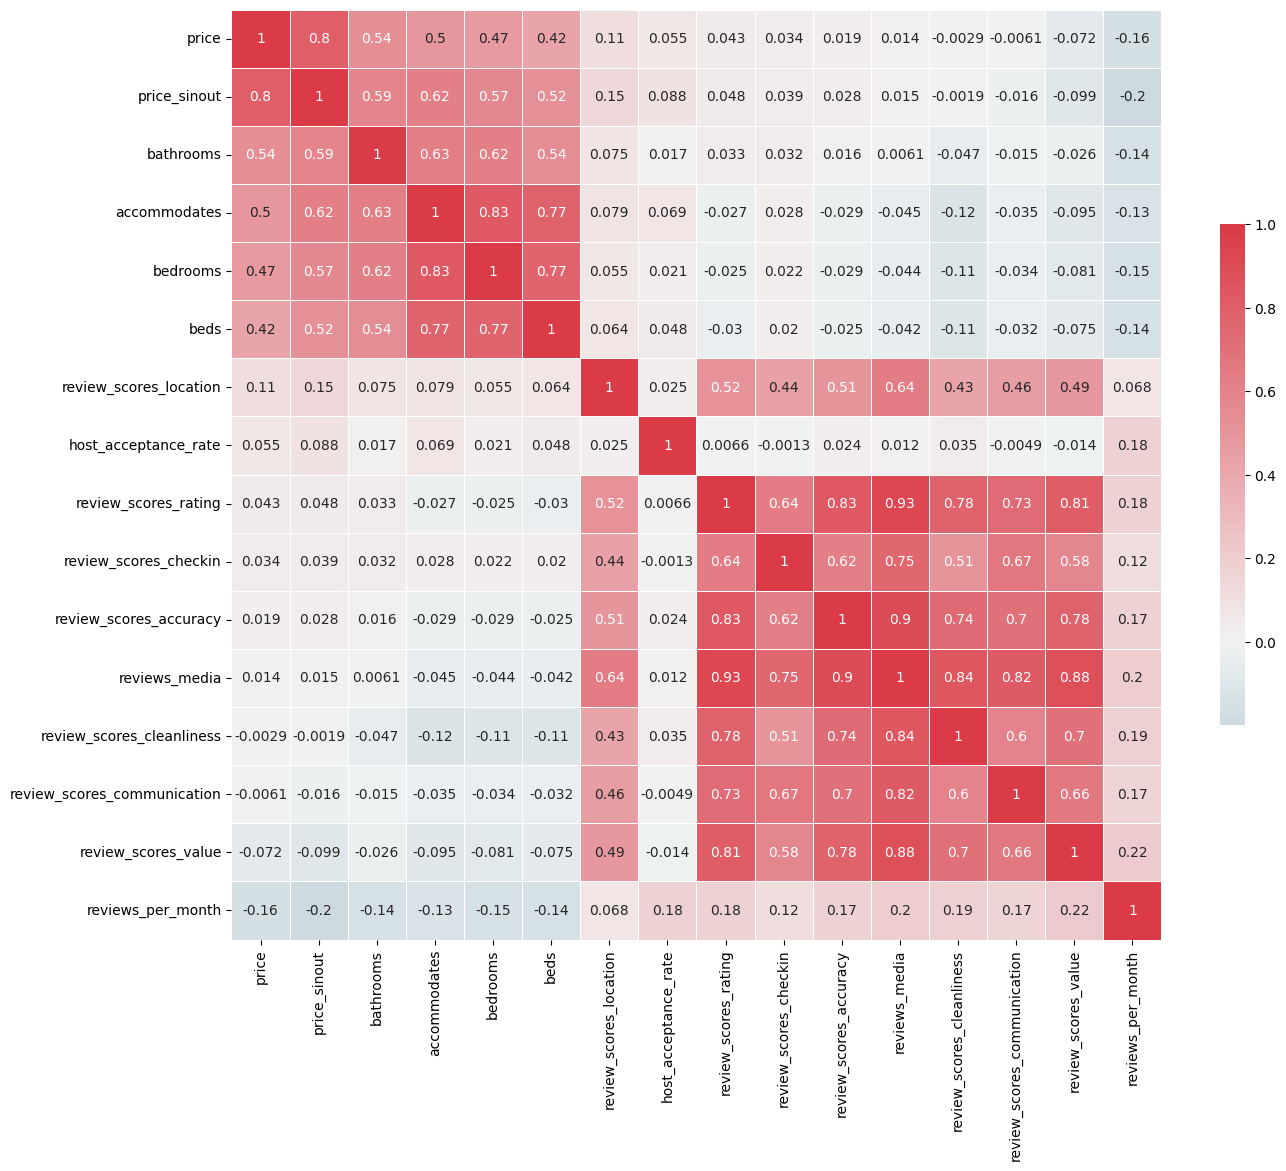

In [79]:

import matplotlib.pyplot as plt
corr = df_prueba_uno.corr(method = 'pearson', numeric_only=True).sort_values(by = 'price', axis = 0, ascending = False).sort_values(by = 'price', axis = 1, ascending = False)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:37,0:37], cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot =True)

<Axes: >

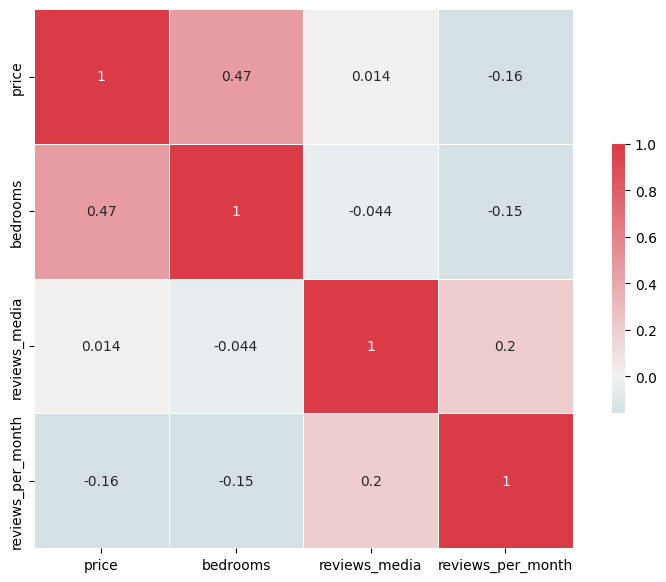

In [80]:
corr = df_seleccion_correlacion.corr(method = 'pearson', numeric_only=True).sort_values(by = 'price', axis = 0, ascending = False).sort_values(by = 'price', axis = 1, ascending = False)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,7))
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:37,0:37], cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot =True)

#### Visualizacion de Outliers

In [81]:
#Outliers de las columnas reviews en porcentajes
def calcular_porcentaje_outliers(dataframe, columnas):
    """
    Calcula el porcentaje de outliers para cada columna en una lista de columnas seleccionadas
    usando la regla del IQR.
    
    Parámetros:
        dataframe (pd.DataFrame): El dataframe que contiene los datos.
        columnas (list): Lista de columnas en las que se calcularán los outliers.
    
    Retorna:
        dict: Un diccionario donde las claves son las columnas y los valores son el porcentaje de outliers.
    """
    porcentaje_outliers = {}
    for columna in columnas:
        # Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)

        Q1 = df_Airbnb_listings[columna].quantile(0.25)
        Q3 = df_Airbnb_listings[columna].quantile(0.75)

        IQR = Q3 - Q1
        
        # Determinar los límites para detectar outliers

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Identificar outliers
        outliers = df_Airbnb_listings[(df_Airbnb_listings[columna] < limite_inferior) | (df_Airbnb_listings[columna] > limite_superior)]

        # Calcular el porcentaje de outliers
        porcentaje = (len(outliers) / len(df_Airbnb_listings)) * 100
        porcentaje_outliers[columna] = porcentaje

    return porcentaje_outliers

columnas = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
            'review_scores_location', 'review_scores_value']
ouliers_ptj_reviews = calcular_porcentaje_outliers(df_Airbnb_listings, columnas)
print(ouliers_ptj_reviews)

{'review_scores_rating': 6.106609808102345, 'review_scores_accuracy': 6.1236673773987205, 'review_scores_cleanliness': 5.825159914712154, 'review_scores_checkin': 8.272921108742004, 'review_scores_communication': 7.462686567164178, 'review_scores_location': 6.174840085287847, 'review_scores_value': 5.6716417910447765}


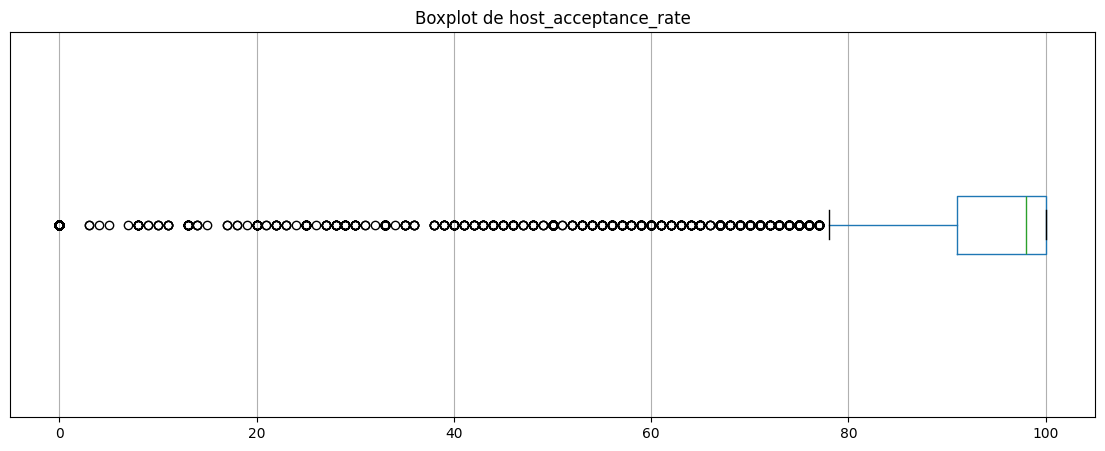

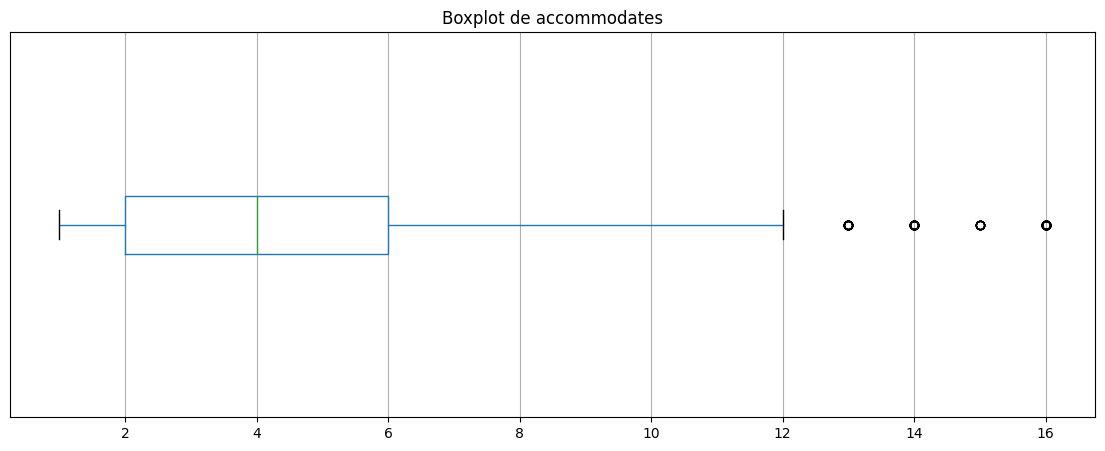

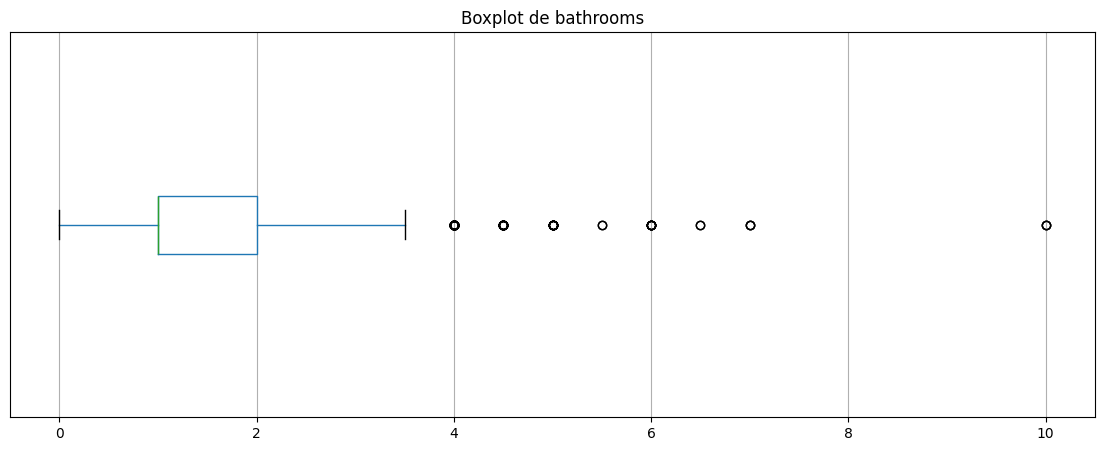

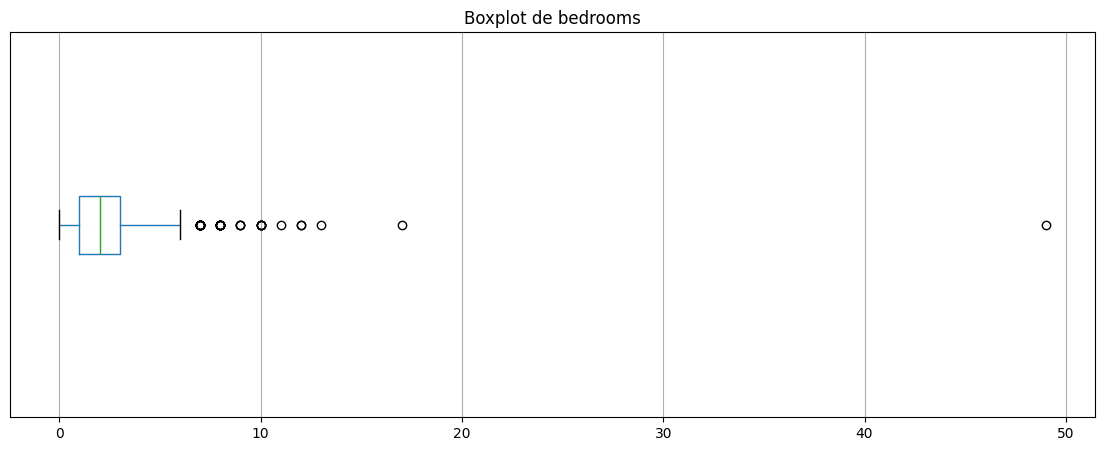

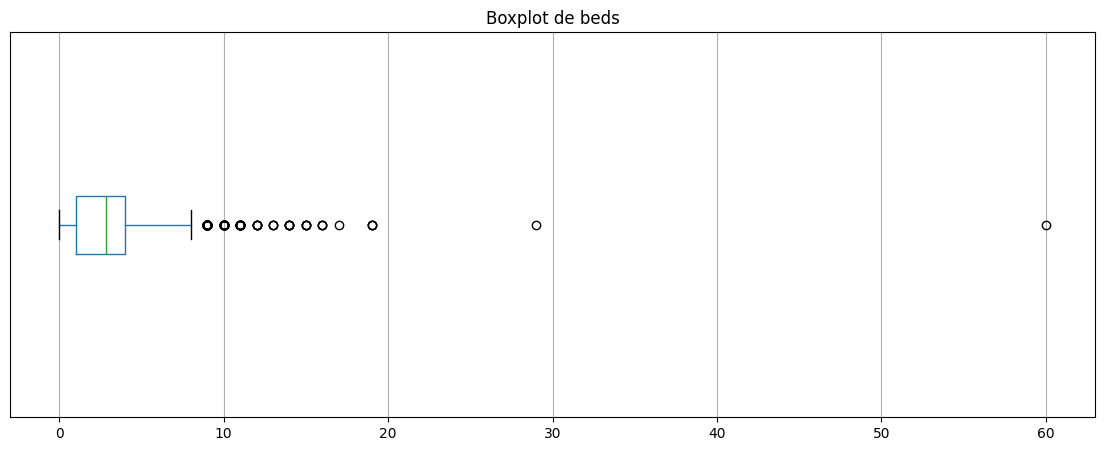

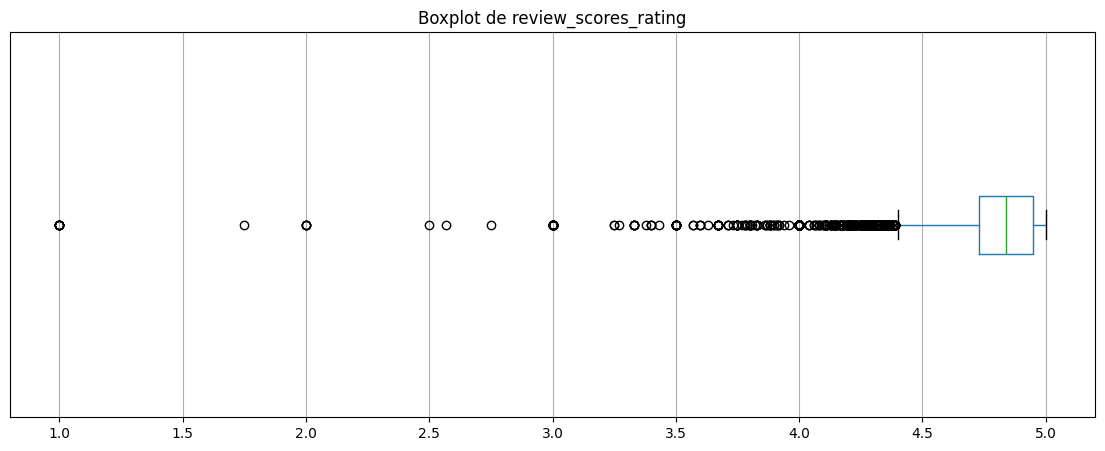

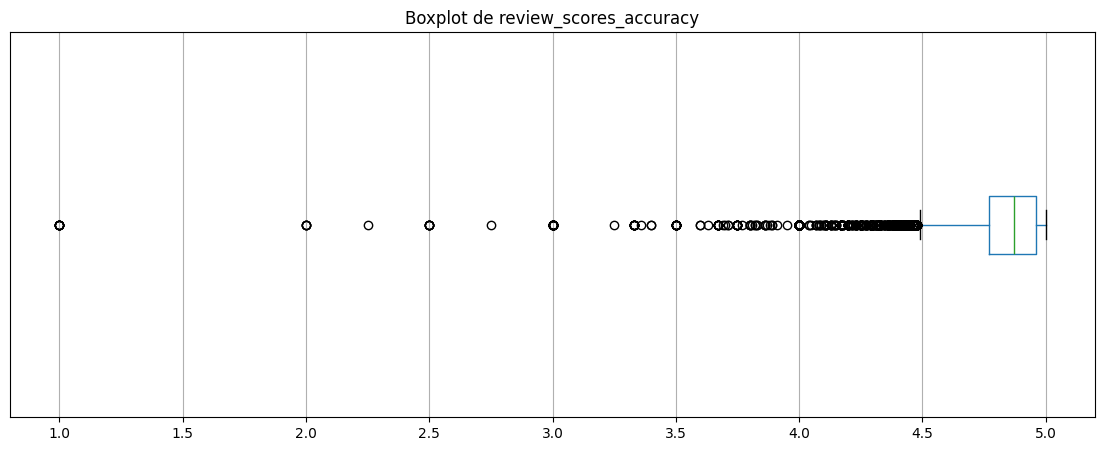

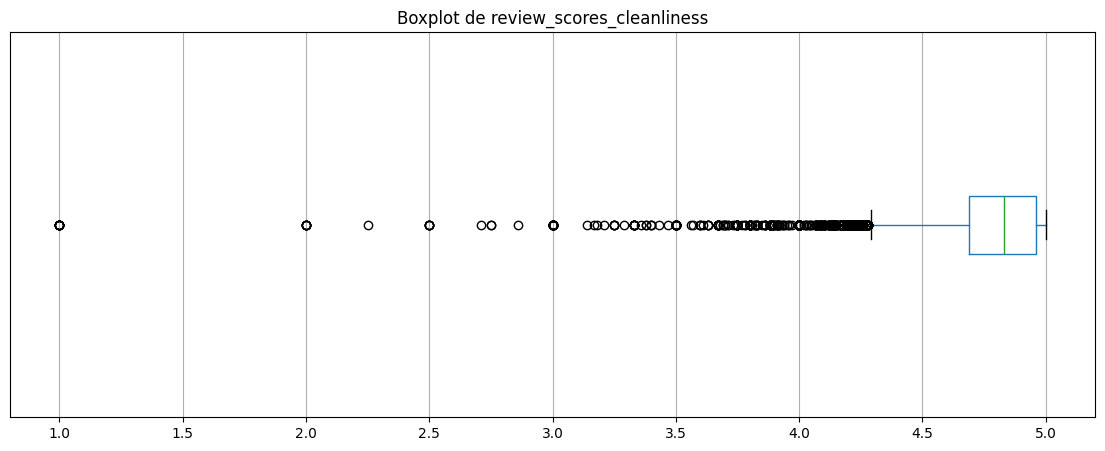

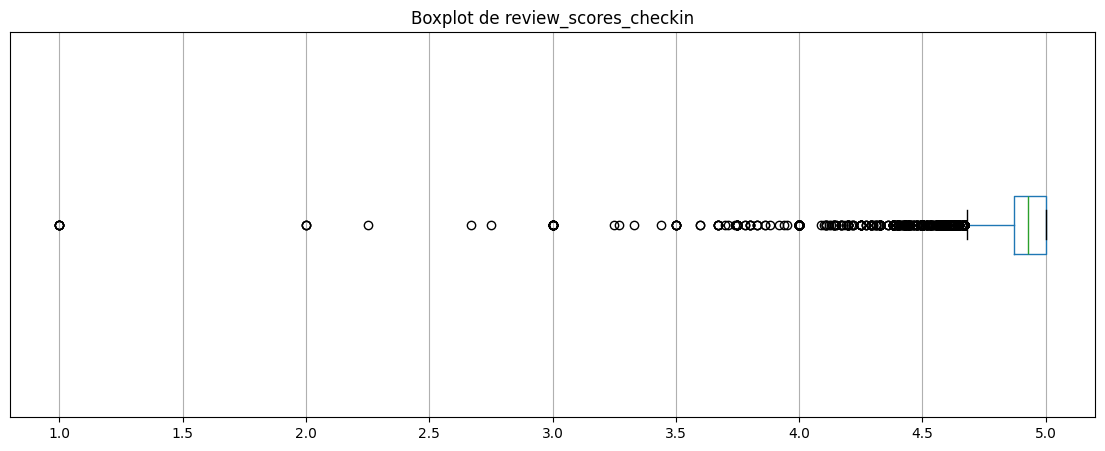

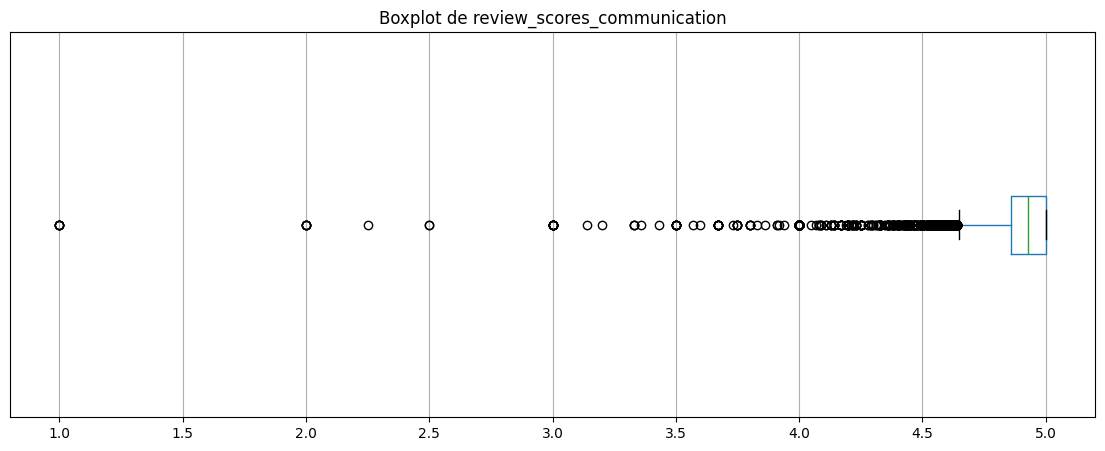

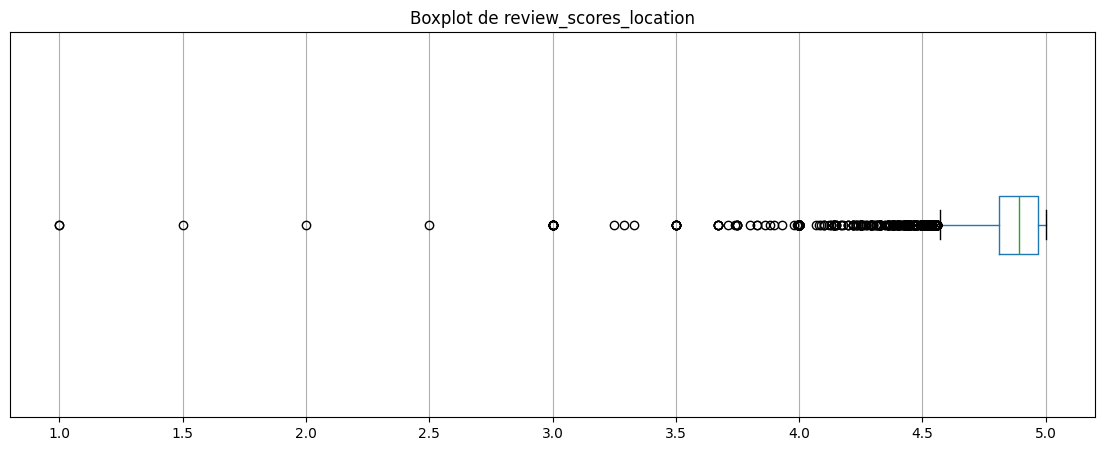

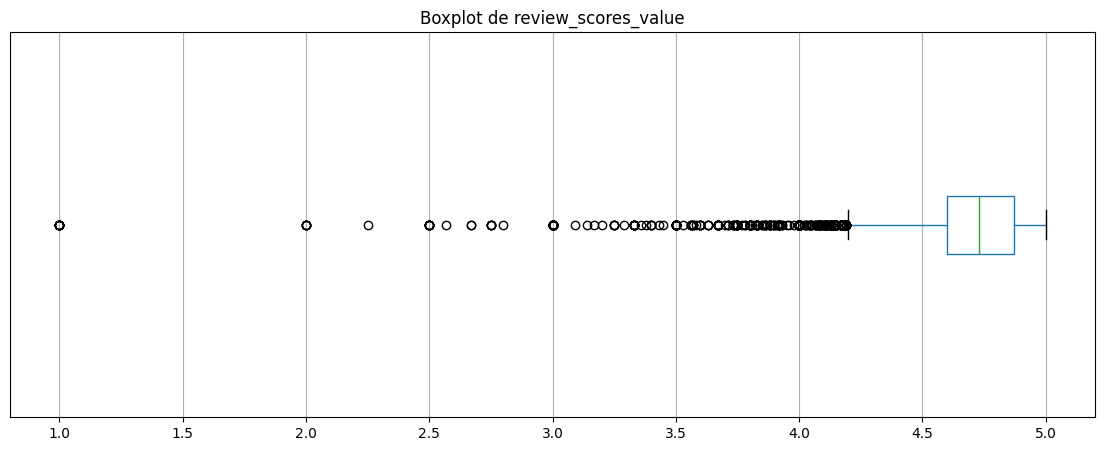

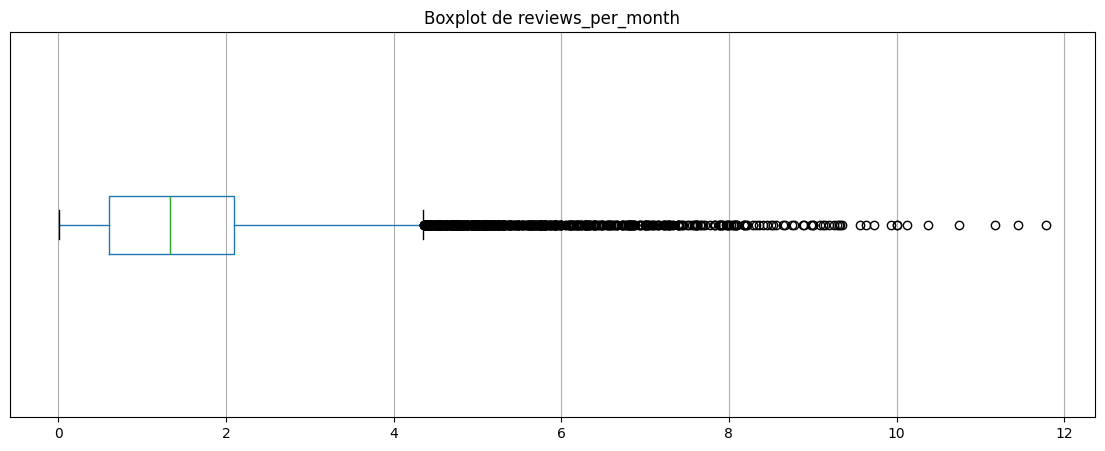

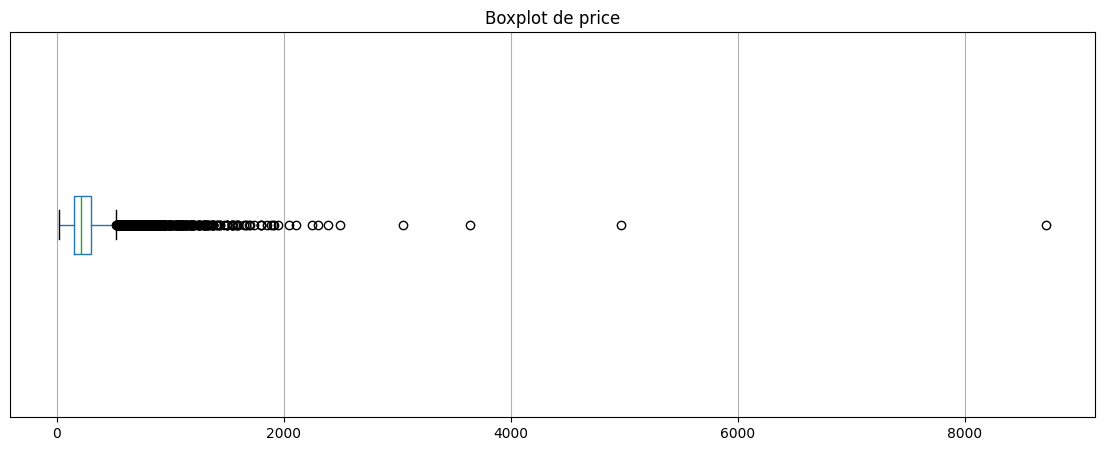

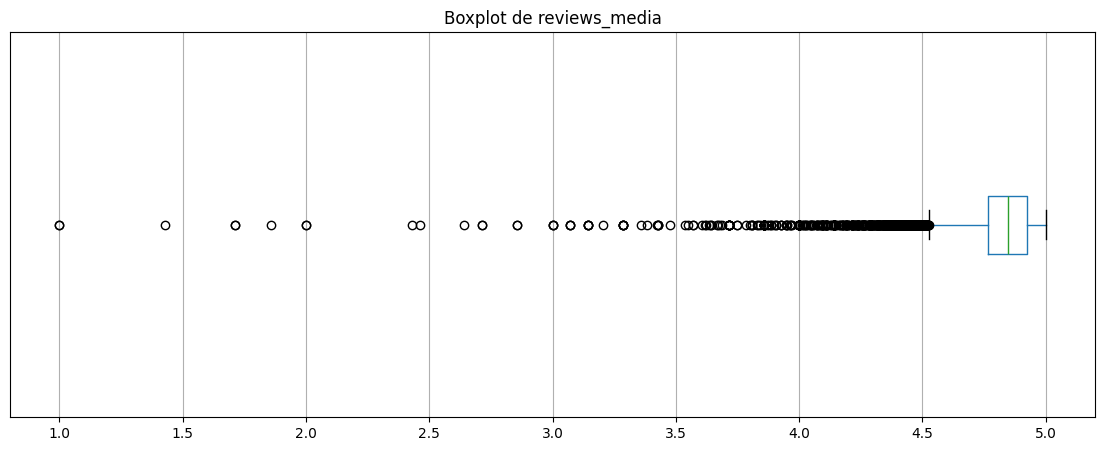

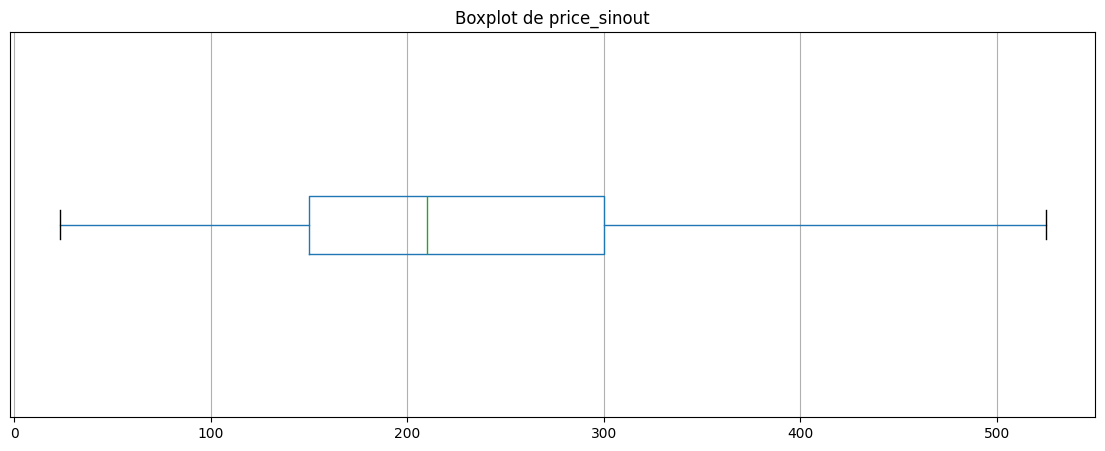

In [82]:
#Visualizacion de graficos boxplot para tener una idea visual de los outliers

import matplotlib.pyplot as plt

def detect_outliers_iqr(df):
    outlier_info = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_info[column] = outliers[column]
    return outlier_info

for column in df_prueba_uno.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(14, 5))
    df_prueba_uno.boxplot(column = column, vert = False)
    plt.title(f'Boxplot de {column}')
    plt.ylabel('')
    plt.gca().get_yaxis().set_ticks([])
    plt.grid(True)
    plt.show()

### Análisis Gráfico

#### Análisis Bivariado, numérica - numérica

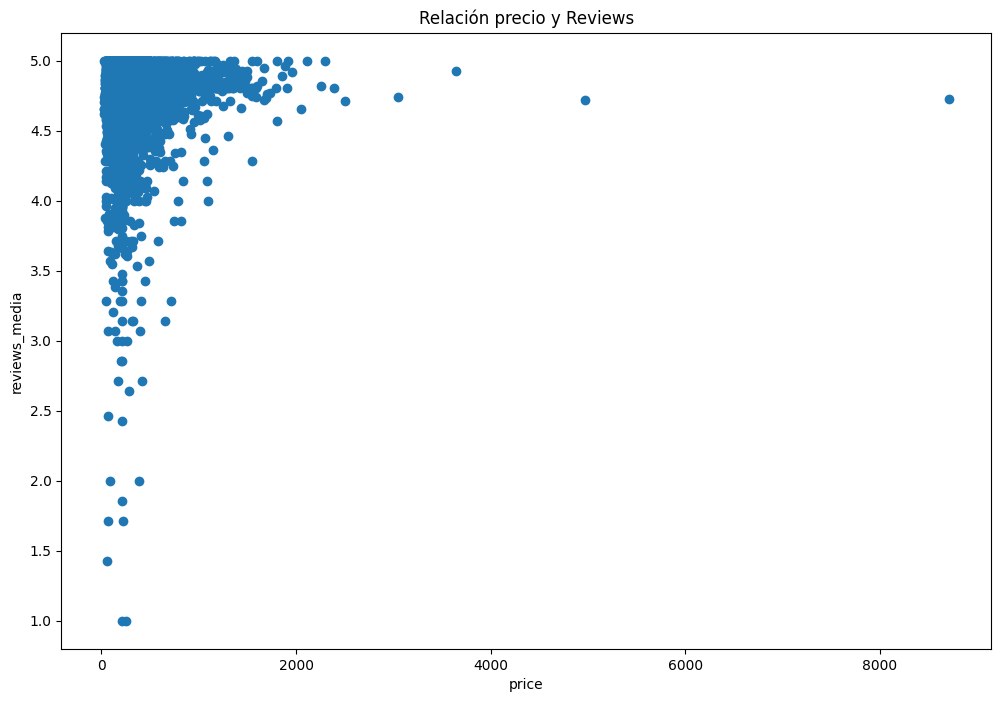

In [83]:
plt.figure(figsize=(12,8))
plt.scatter(df_Airbnb_listings['price'], df_Airbnb_listings['reviews_media'])
plt.title('Relación precio y Reviews')
plt.xlabel('price')
plt.ylabel('reviews_media')
plt.show()

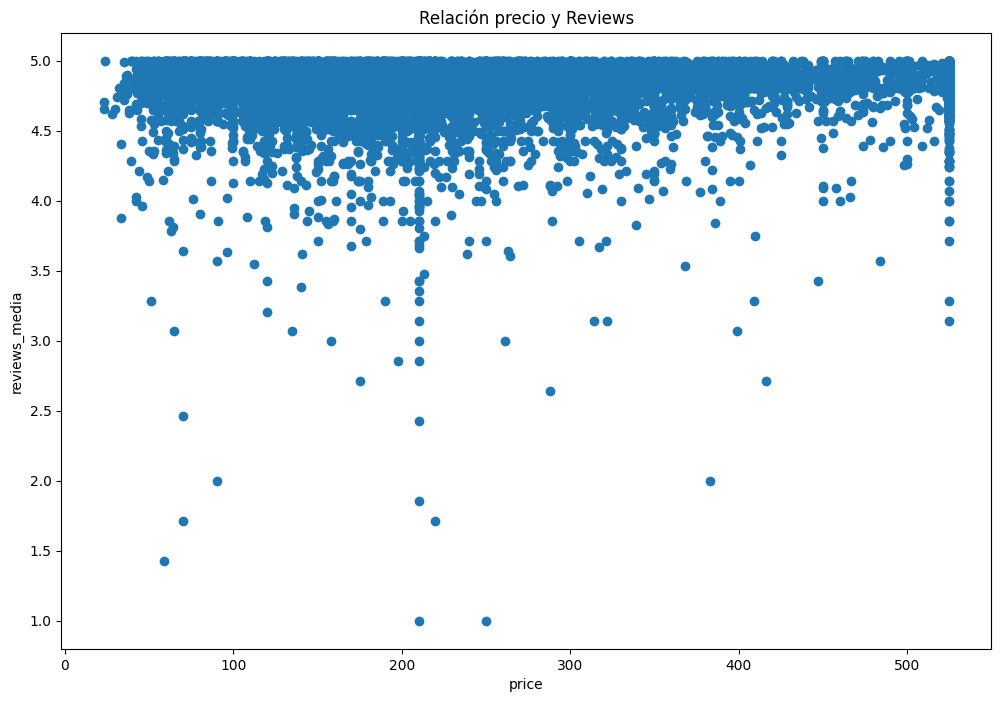

In [84]:
plt.figure(figsize=(12,8))
plt.scatter(df_Airbnb_listings['price_sinout'], df_Airbnb_listings['reviews_media'])
plt.title('Relación precio y Reviews')
plt.xlabel('price')
plt.ylabel('reviews_media')
plt.show()

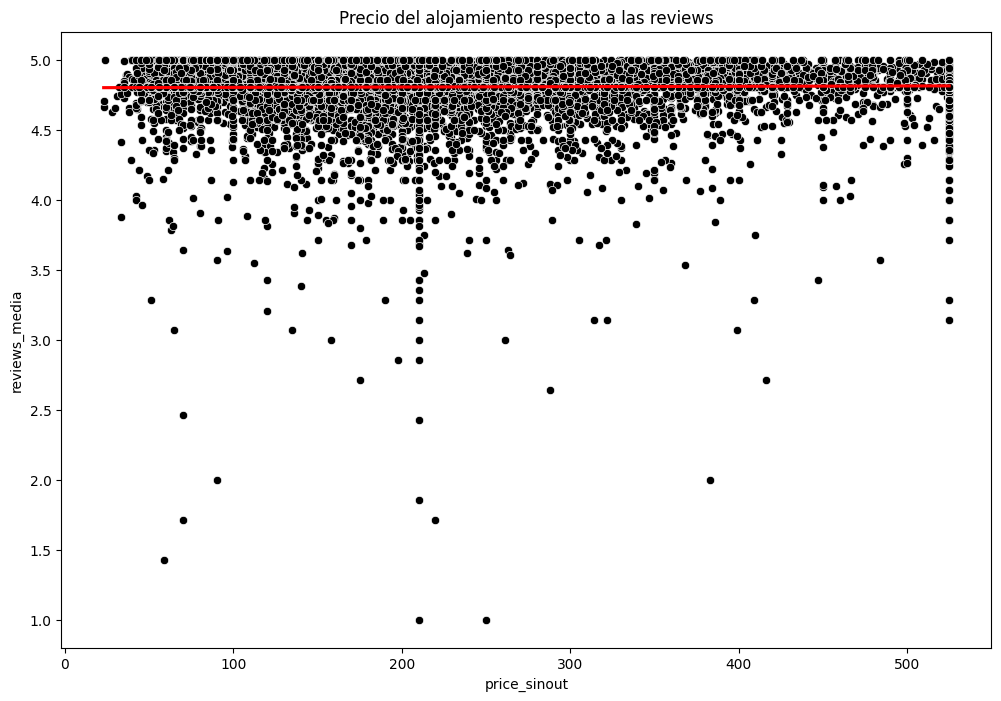

In [85]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price_sinout', y='reviews_media', data=df_Airbnb_listings, color = 'black')
sns.regplot(x='price_sinout', y='reviews_media', data=df_Airbnb_listings, scatter = False, color='red')
plt.title('Precio del alojamiento respecto a las reviews')
plt.show()

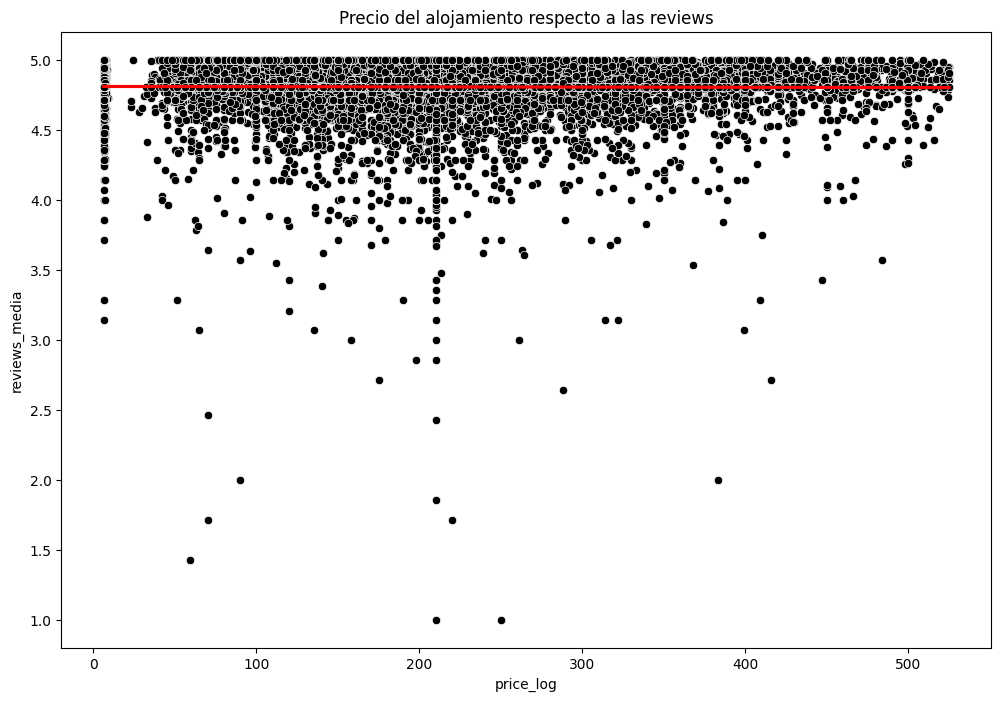

In [86]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price_log', y='reviews_media', data=df_Airbnb_listings, color = 'black')
sns.regplot(x='price_log', y='reviews_media', data=df_Airbnb_listings, scatter = False, color='red')
plt.title('Precio del alojamiento respecto a las reviews')
plt.show()

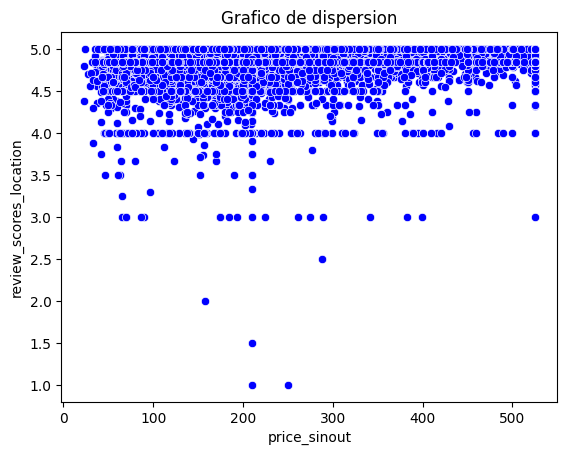

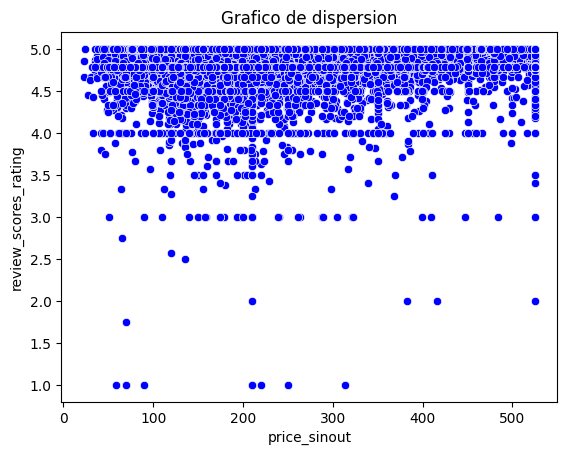

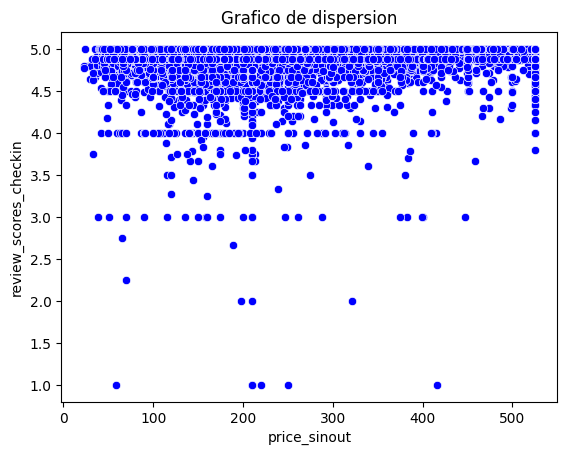

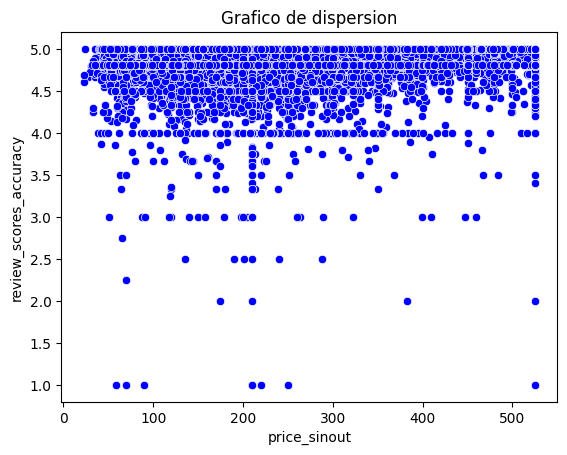

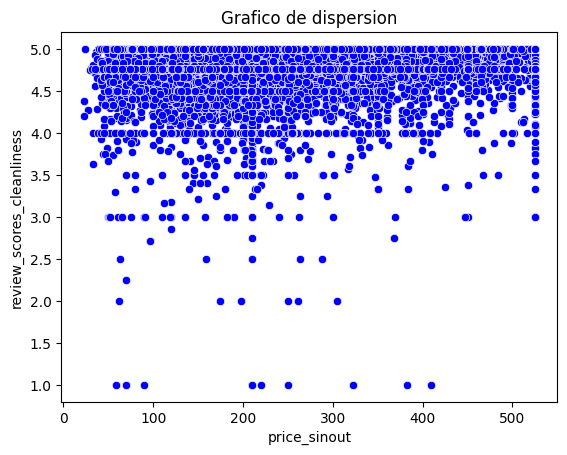

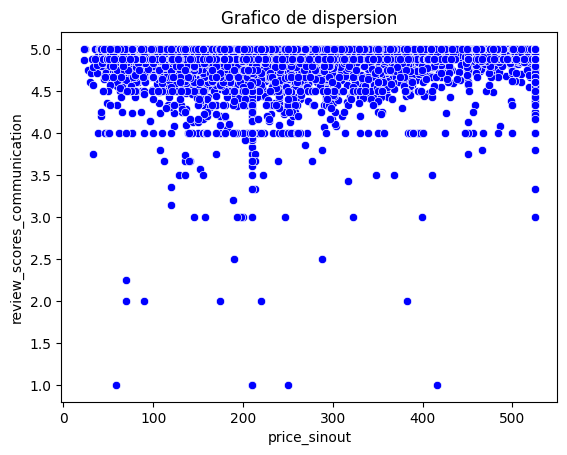

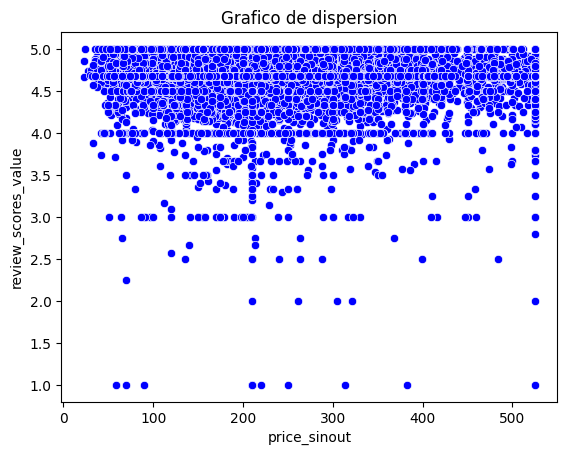

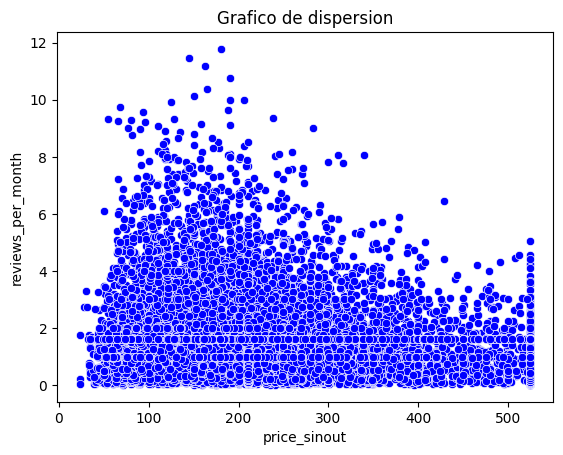

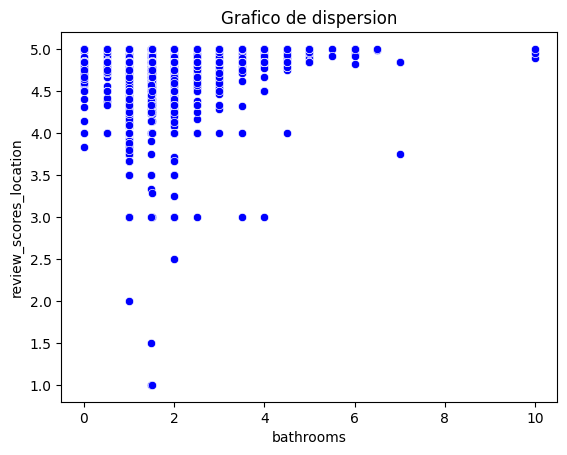

In [87]:
sns.scatterplot(x='price_sinout', y='review_scores_location', data=df_Airbnb_listings, color = 'blue')
plt.title('Grafico de dispersion')
plt.show()
sns.scatterplot(x='price_sinout', y='review_scores_rating', data=df_Airbnb_listings, color = 'blue')
plt.title('Grafico de dispersion')
plt.show()
sns.scatterplot(x='price_sinout', y='review_scores_checkin', data=df_Airbnb_listings, color = 'blue')
plt.title('Grafico de dispersion')
plt.show()
sns.scatterplot(x='price_sinout', y='review_scores_accuracy', data=df_Airbnb_listings, color = 'blue')
plt.title('Grafico de dispersion')
plt.show()
sns.scatterplot(x='price_sinout', y='review_scores_cleanliness', data=df_Airbnb_listings, color = 'blue')
plt.title('Grafico de dispersion')
plt.show()
sns.scatterplot(x='price_sinout', y='review_scores_communication', data=df_Airbnb_listings, color = 'blue')
plt.title('Grafico de dispersion')
plt.show()
sns.scatterplot(x='price_sinout', y='review_scores_value', data=df_Airbnb_listings, color = 'blue')
plt.title('Grafico de dispersion')
plt.show()
sns.scatterplot(x='price_sinout', y='reviews_per_month', data=df_Airbnb_listings, color = 'blue')
plt.title('Grafico de dispersion')
plt.show()
sns.scatterplot(x='bathrooms', y='review_scores_location', data=df_Airbnb_listings, color = 'blue')
plt.title('Grafico de dispersion')
plt.show()

#### Numérica - categórica

In [88]:
#Repensar para futuro, investigación host_name
'''
plt.figure(figsize=(12,8))
sns.boxplot(x='host_name', y='price_sinout', data = df_Airbnb_listings)
plt.title('Precio en relacion al nombre')
plt.show()
'''


"\nplt.figure(figsize=(12,8))\nsns.boxplot(x='host_name', y='price_sinout', data = df_Airbnb_listings)\nplt.title('Precio en relacion al nombre')\nplt.show()\n"

In [89]:
#Repensar para futuro, investigación host_name
'''
plt.figure(figsize=(12,8))
sns.boxplot(x='name', y='price_sinout', data = df_Airbnb_listings)
plt.title('Precio en relacion al nombre')
plt.show()
'''

"\nplt.figure(figsize=(12,8))\nsns.boxplot(x='name', y='price_sinout', data = df_Airbnb_listings)\nplt.title('Precio en relacion al nombre')\nplt.show()\n"

In [90]:
#Repensar para futuro, investigación host_name
'''
plt.figure(figsize=(12,8))
sns.boxplot(x='host_name', y='beds', data = df_Airbnb_listings)
plt.title('Camas en relacion al nombre')
plt.show()
'''      

"\nplt.figure(figsize=(12,8))\nsns.boxplot(x='host_name', y='beds', data = df_Airbnb_listings)\nplt.title('Camas en relacion al nombre')\nplt.show()\n"

In [91]:
#Repensar para futuro, investigación host_name

'''
plt.figure(figsize=(12,8))
sns.boxplot(x='name', y='beds', data = df_Airbnb_listings)
plt.title('Camas en relacion al nombre')
plt.show()
'''

"\nplt.figure(figsize=(12,8))\nsns.boxplot(x='name', y='beds', data = df_Airbnb_listings)\nplt.title('Camas en relacion al nombre')\nplt.show()\n"

In [92]:
#Repensar para futuro, investigación host_name
'''    
plt.figure(figsize=(12,8))
sns.boxplot(x='host_name', y='bedrooms', data = df_Airbnb_listings)
plt.title('Habitaciones en relacion al nombre del host')
plt.show()
'''

"    \nplt.figure(figsize=(12,8))\nsns.boxplot(x='host_name', y='bedrooms', data = df_Airbnb_listings)\nplt.title('Habitaciones en relacion al nombre del host')\nplt.show()\n"

In [93]:
#Repensar para futuro, investigación name

'''
plt.figure(figsize=(12,8))
sns.boxplot(x='name', y='bedrooms', data = df_Airbnb_listings)
plt.title('Habitaciones en relacion al nombre')
plt.show()
'''

"\nplt.figure(figsize=(12,8))\nsns.boxplot(x='name', y='bedrooms', data = df_Airbnb_listings)\nplt.title('Habitaciones en relacion al nombre')\nplt.show()\n"

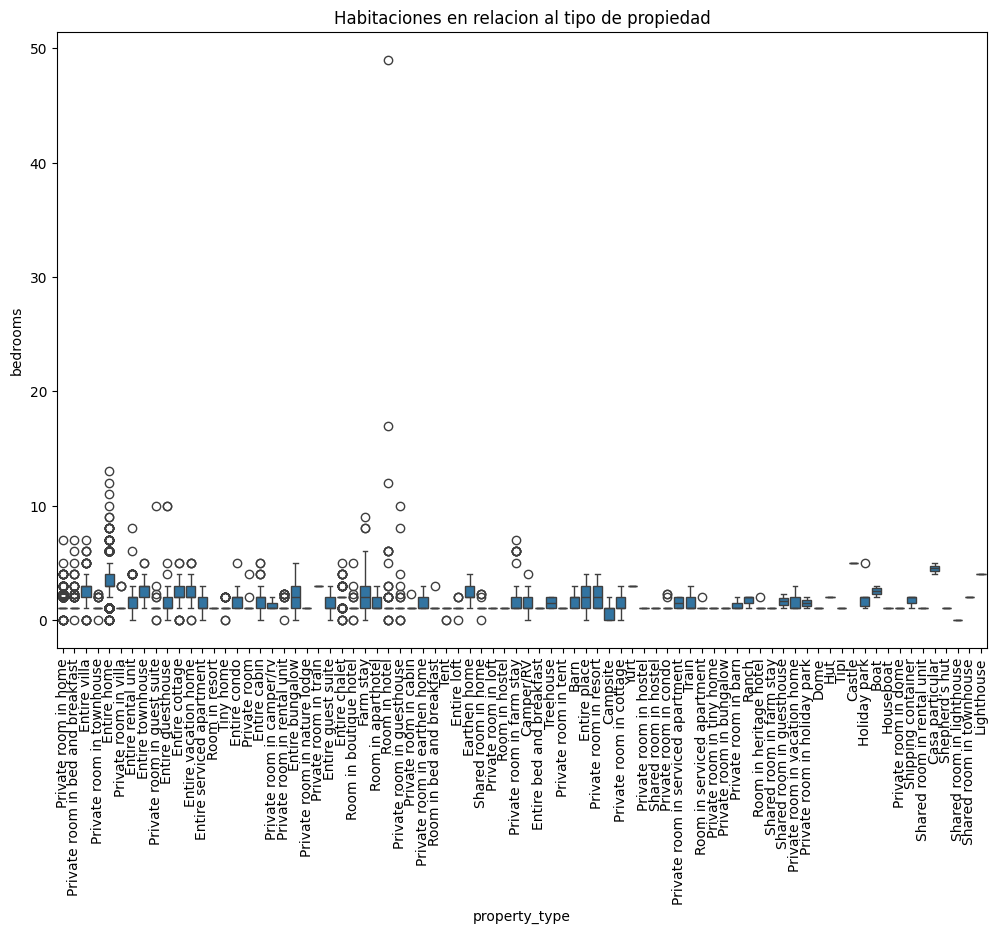

In [94]:
plt.figure(figsize=(12,8))
sns.boxplot(x='property_type', y='bedrooms', data = df_Airbnb_listings)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Habitaciones en relacion al tipo de propiedad')
plt.show()

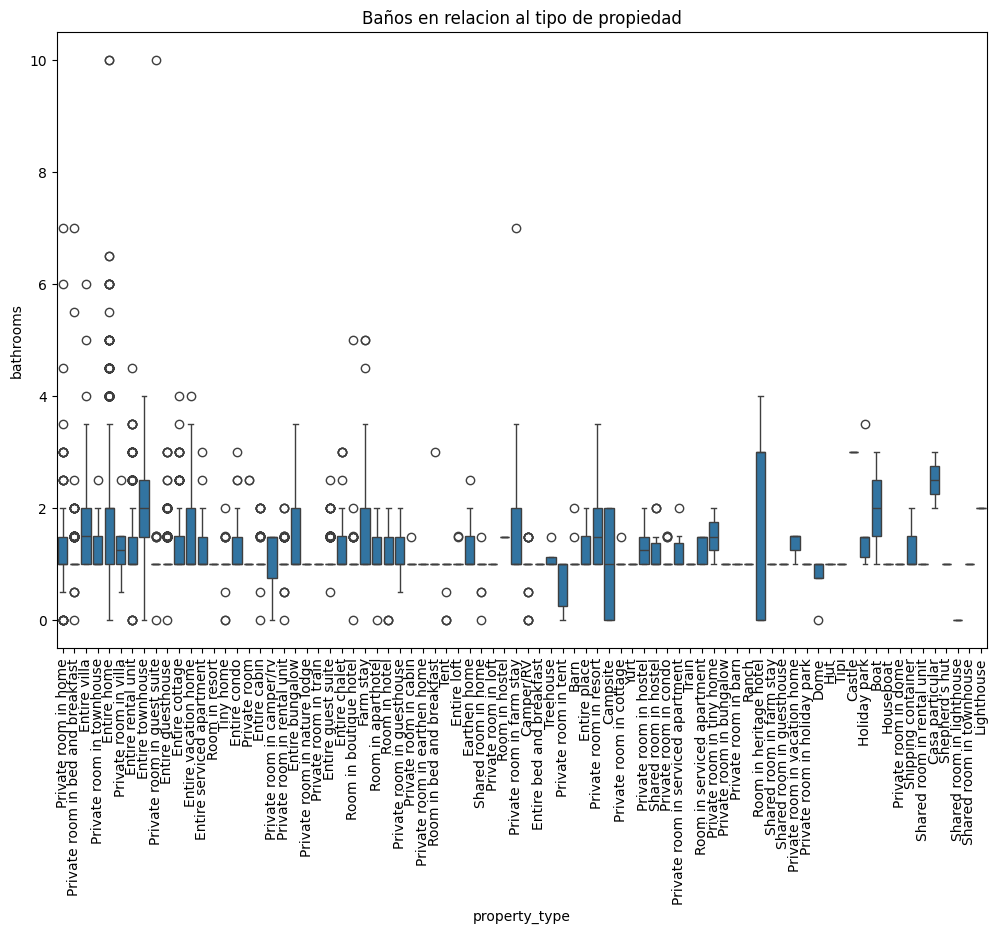

In [95]:
plt.figure(figsize=(12,8))
sns.boxplot(x='property_type', y='bathrooms', data = df_Airbnb_listings)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Baños en relacion al tipo de propiedad')
plt.show()

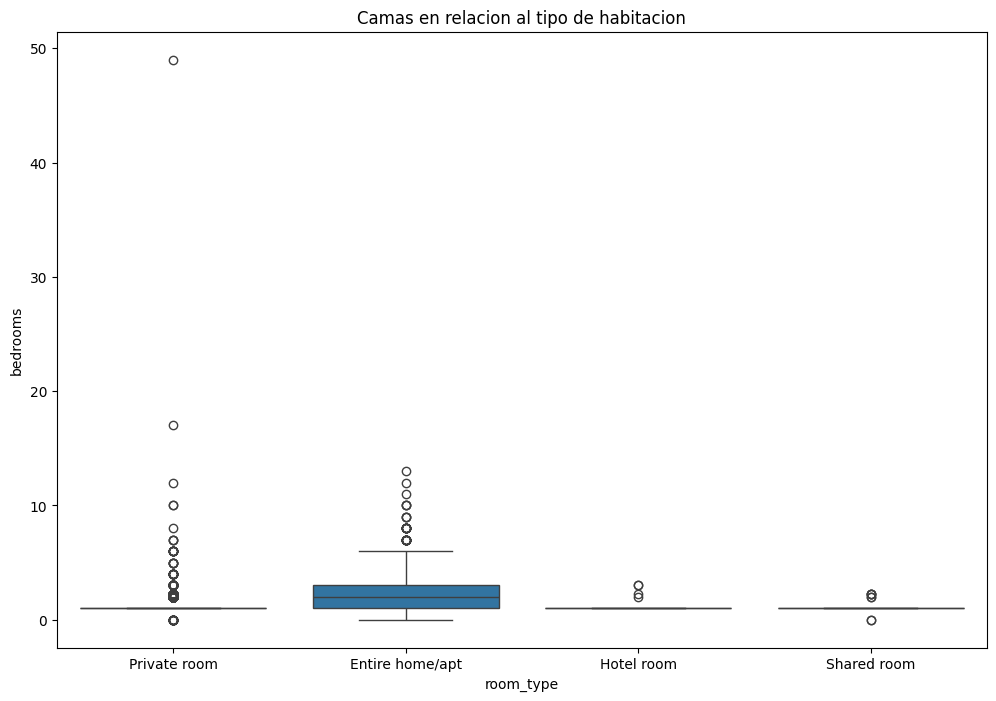

In [96]:
plt.figure(figsize=(12,8))
sns.boxplot(x='room_type', y='bedrooms', data = df_Airbnb_listings)
plt.title('Camas en relacion al tipo de habitacion')
plt.show()

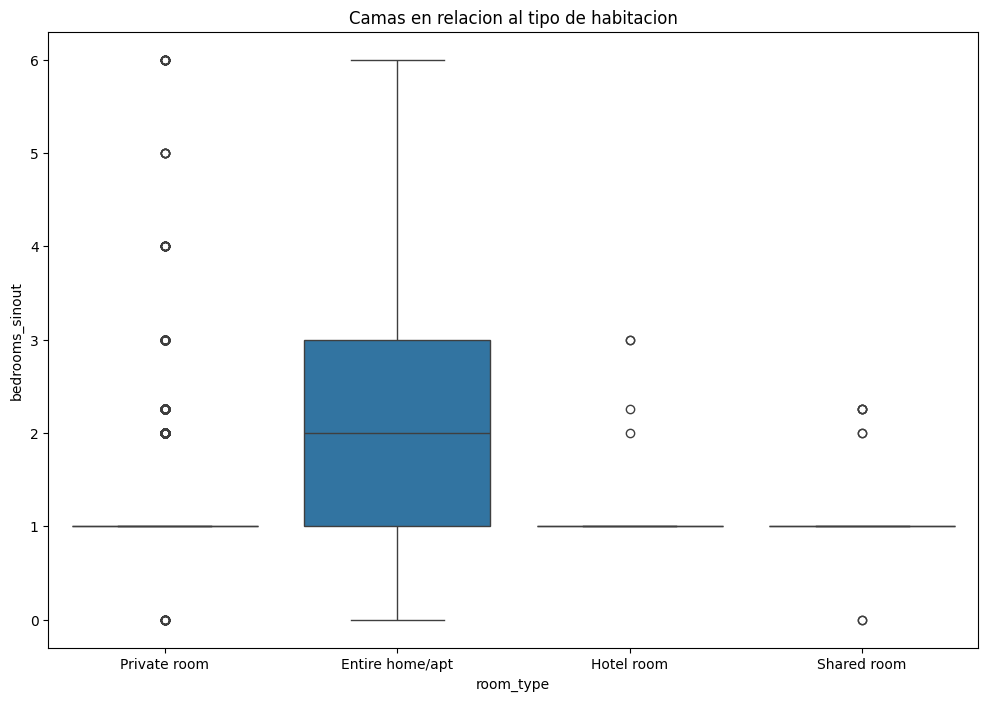

In [97]:
plt.figure(figsize=(12,8))
sns.boxplot(x='room_type', y='bedrooms_sinout', data = df_Airbnb_listings)
plt.title('Camas en relacion al tipo de habitacion')
plt.show()

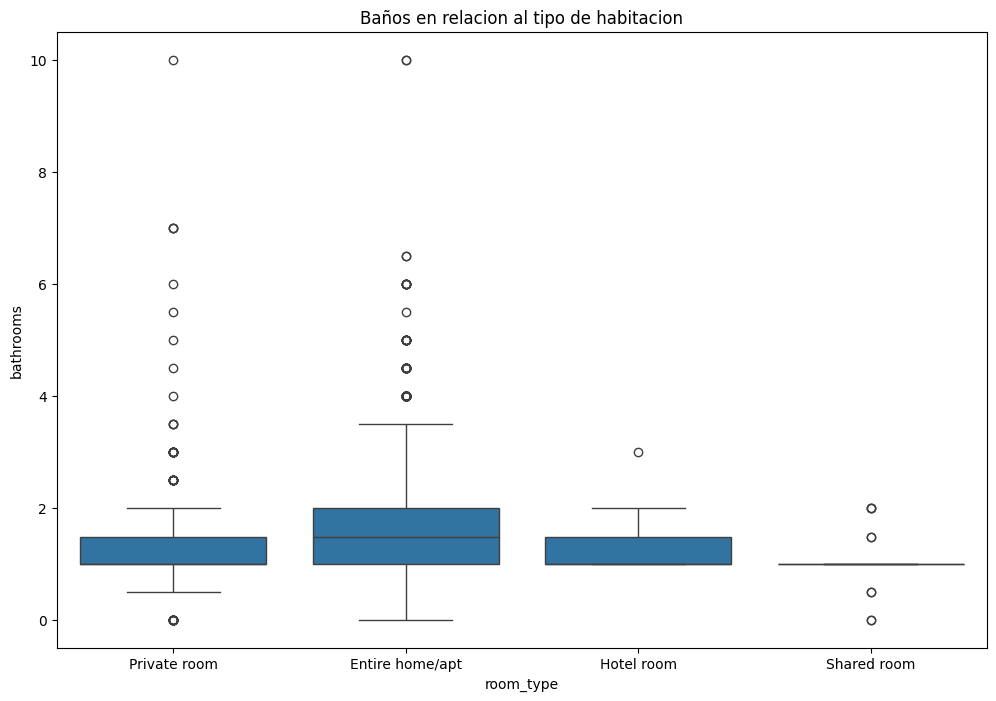

In [98]:
plt.figure(figsize=(12,8))
sns.boxplot(x='room_type', y='bathrooms', data = df_Airbnb_listings)
plt.title('Baños en relacion al tipo de habitacion')
plt.show()

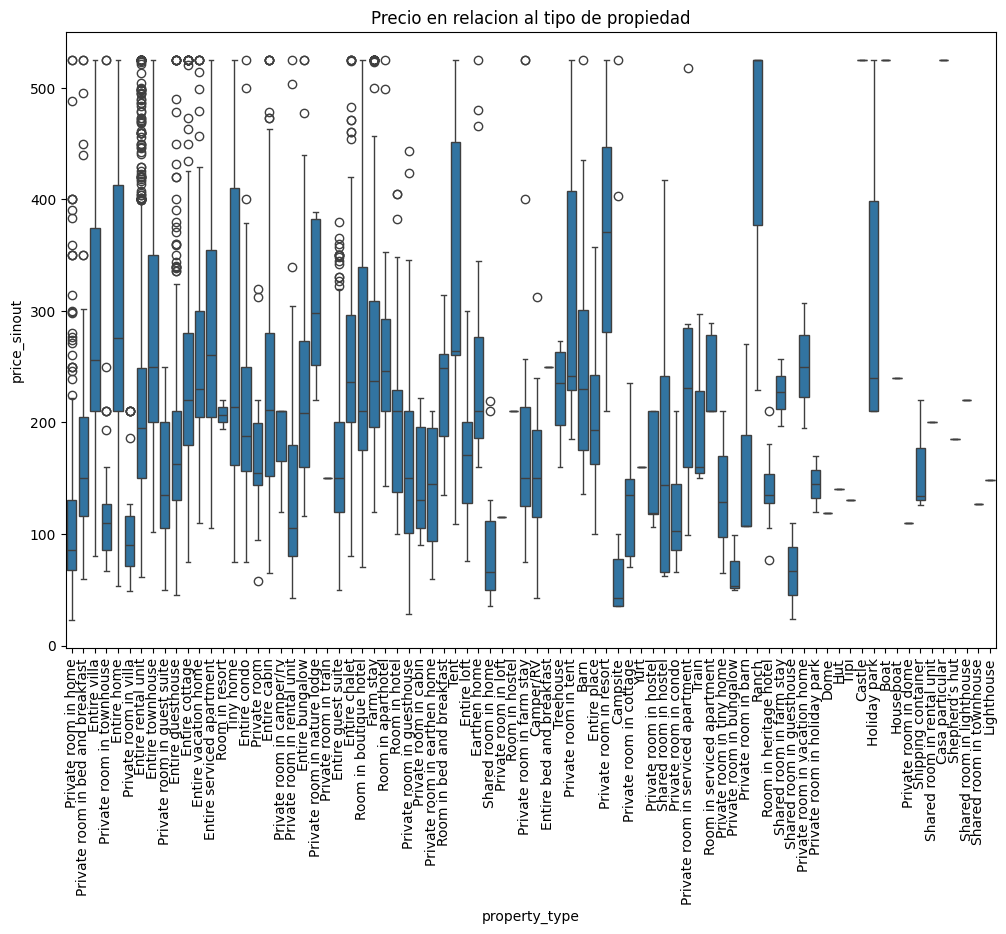

In [99]:
#Grafico boxplot entre variable numerica y categorica (precio sin outliers y tipo de propiedad)
#Tamaño del gráfico
plt.figure(figsize=(12,8))

#Variables a mostrar
sns.boxplot(x='property_type', y='price_sinout', data = df_Airbnb_listings)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Precio en relacion al tipo de propiedad')
plt.show()

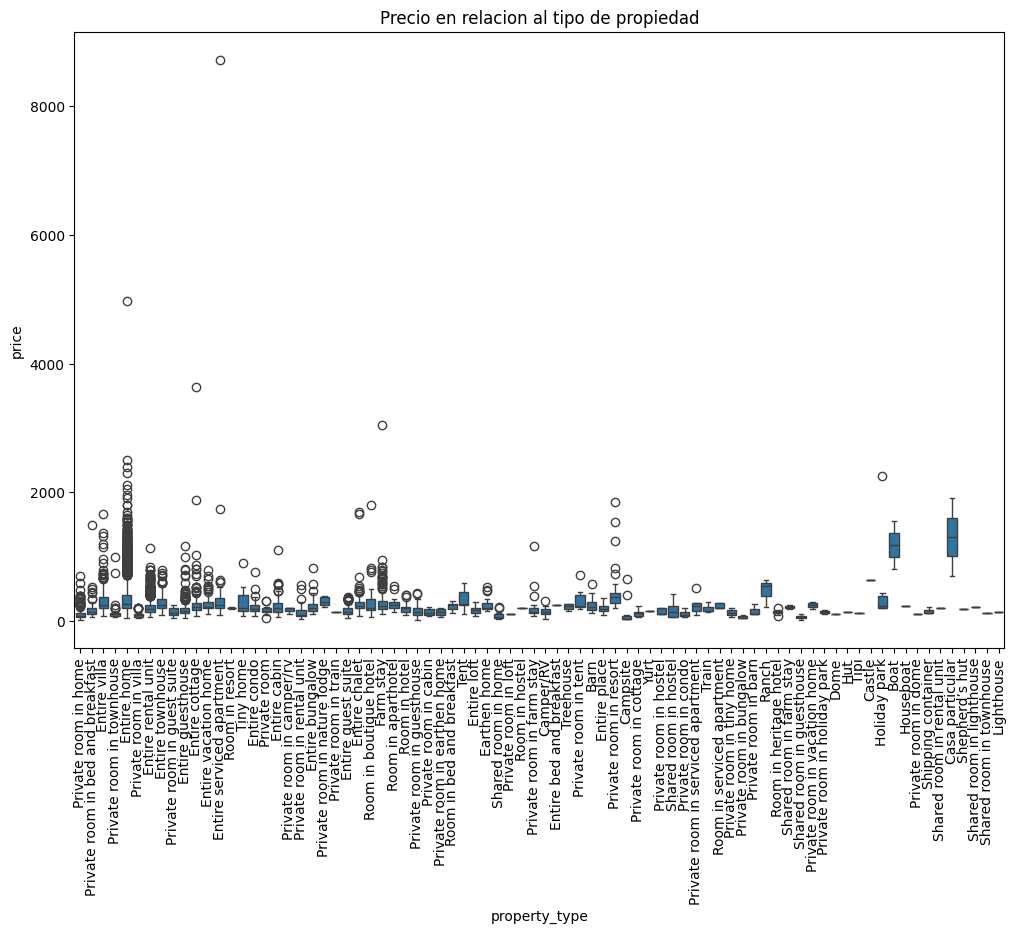

In [100]:
#Grafico boxplot entre variable numerica y categorica (precio y tipo de propiedad)
#Tamaño del gráfico
plt.figure(figsize=(12,8))

#Variables a mostrar
sns.boxplot(x='property_type', y='price', data = df_Airbnb_listings)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Precio en relacion al tipo de propiedad')
plt.show()

### Gráficos de barrras

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1111173699.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'neighbourhood_cleansed_OHE', y = 'price', data = df_Airbnb_listings, ci = None)


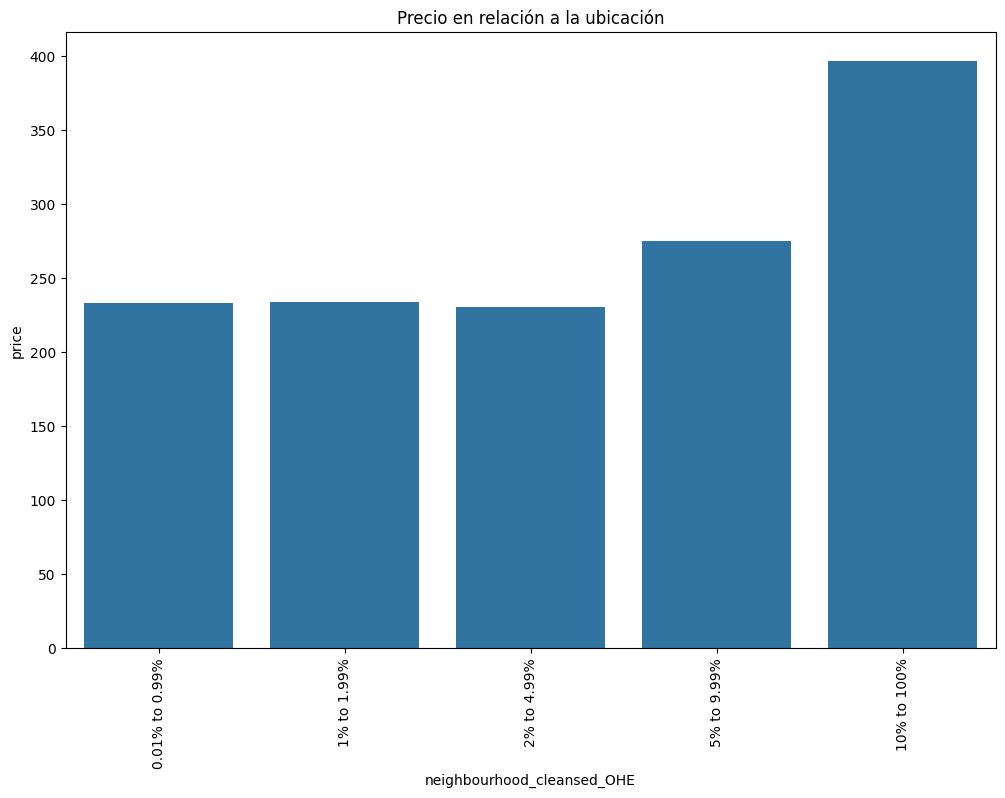

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1111173699.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'neighbourhood_cleansed_OHE', y = 'price_sinout', data = df_Airbnb_listings, ci = None)


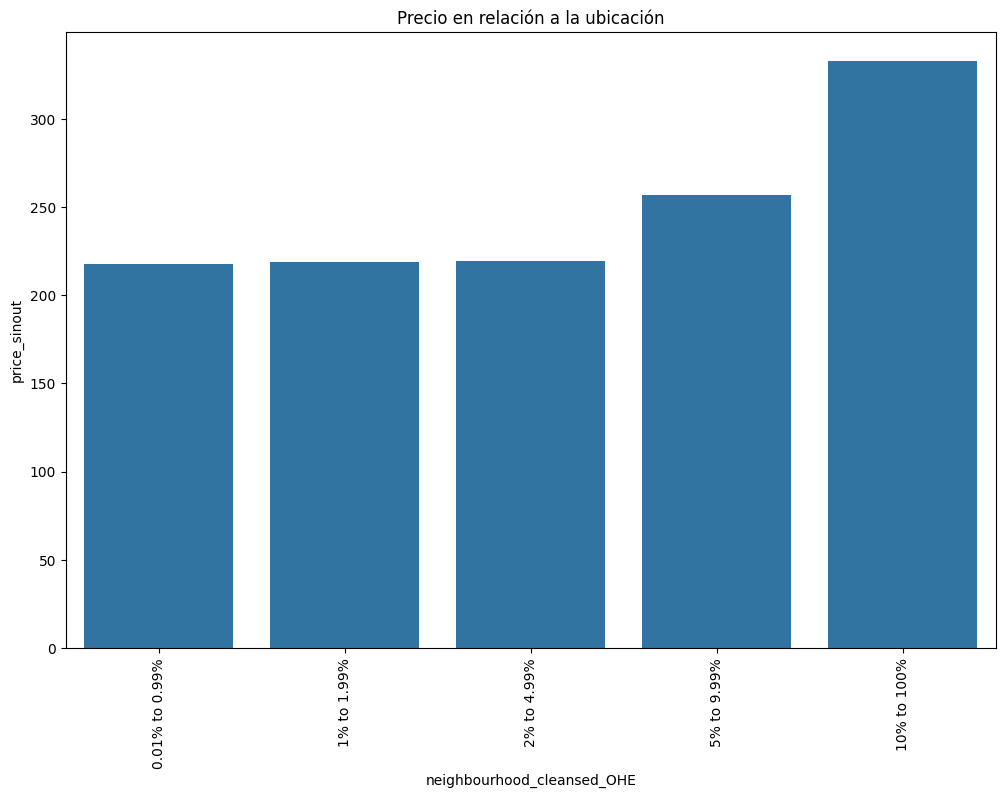

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1111173699.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'neighbourhood_cleansed_OHE', y = 'beds', data = df_Airbnb_listings, ci = None)


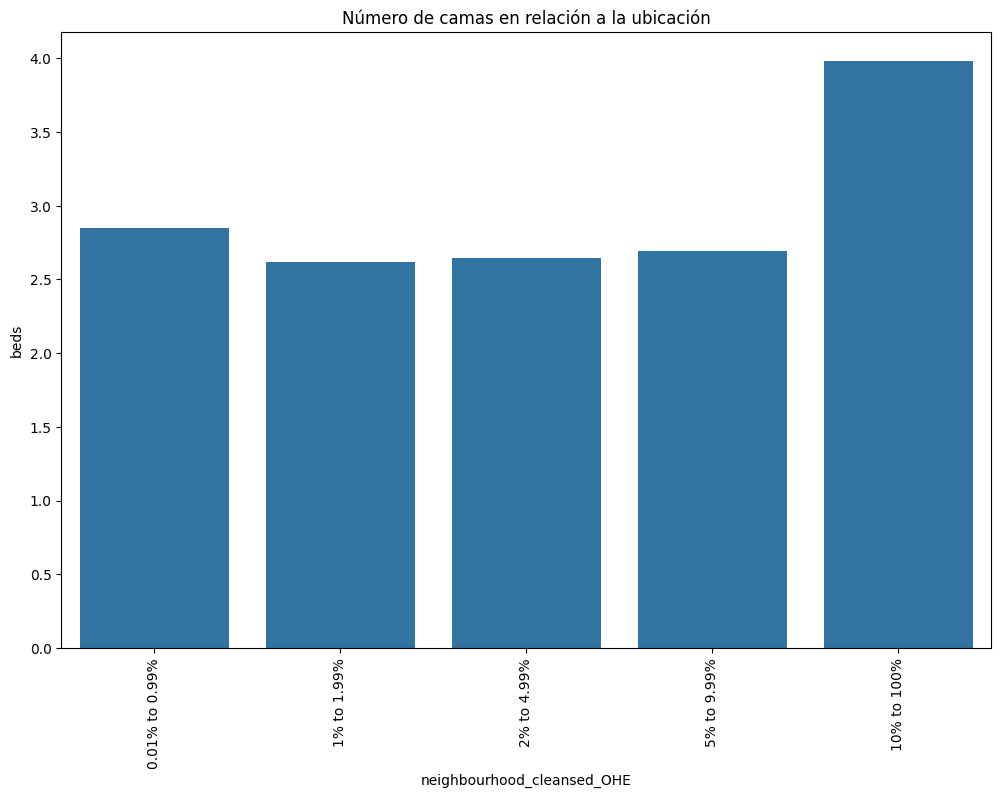

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1111173699.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'neighbourhood_cleansed_OHE', y = 'bedrooms_sinout', data = df_Airbnb_listings, ci = None)


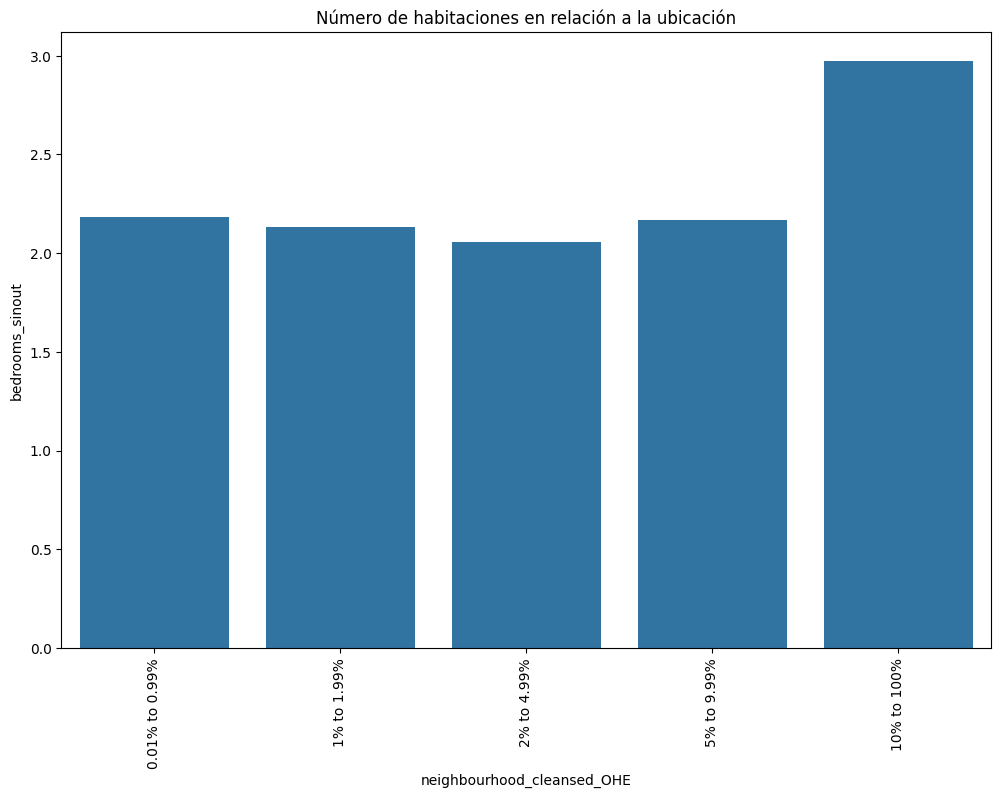

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1111173699.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'neighbourhood_cleansed_OHE', y = 'review_scores_location', data = df_Airbnb_listings, ci = None)


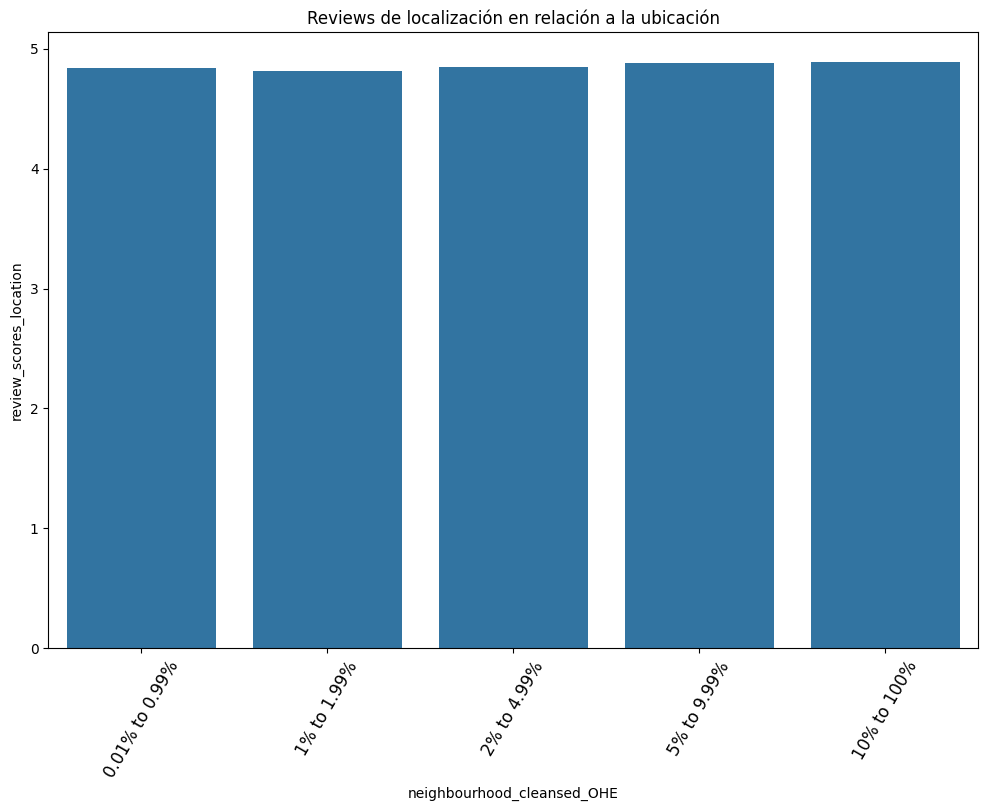

In [101]:
# Gráfico de barras entre neighbourhood_cleansed_OHE y price, price_sinout, beds, bedrooms_sinout, review_scores_location
#Tamaño del gráfico

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'neighbourhood_cleansed_OHE', y = 'price', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Precio en relación a la ubicación')
plt.show()

#Tamaño del gráfico

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'neighbourhood_cleansed_OHE', y = 'price_sinout', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Precio en relación a la ubicación')
plt.show()

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'neighbourhood_cleansed_OHE', y = 'beds', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Número de camas en relación a la ubicación')
plt.show()

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'neighbourhood_cleansed_OHE', y = 'bedrooms_sinout', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Número de habitaciones en relación a la ubicación')
plt.show()

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'neighbourhood_cleansed_OHE', y = 'review_scores_location', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 60, fontsize=12)
plt.yticks(fontsize=10)
plt.title('Reviews de localización en relación a la ubicación')
plt.show()


C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1579316770.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df_Airbnb_listings, x = 'property_type', y = 'price_sinout', hue = 'Tipos de viviendas', ci = None,


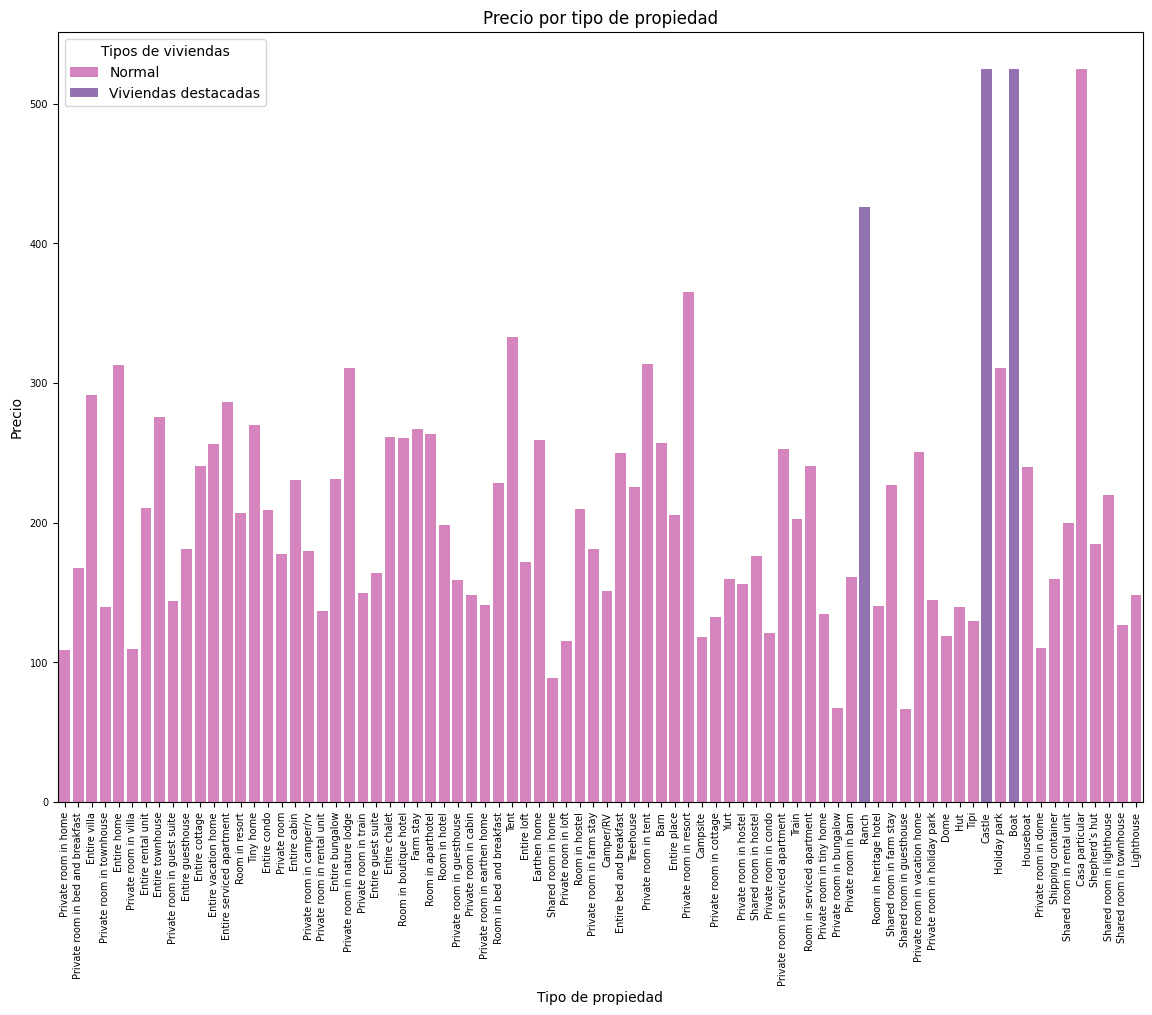

In [102]:
barras_destacadas = ['Ranch', 'Castle', 'Boat', 'Casa']

df_Airbnb_listings['Tipos de viviendas'] = df_Airbnb_listings['property_type'].apply(lambda x: 'Viviendas destacadas' if x in barras_destacadas else 'Normal')

plt.figure(figsize = (14, 10))
sns.barplot(data = df_Airbnb_listings, x = 'property_type', y = 'price_sinout', hue = 'Tipos de viviendas', ci = None,
            palette = {'Viviendas destacadas': '#9467bd', 'Normal': '#e377c2'})

plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio')
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Precio por tipo de propiedad')

plt.show()

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\784882438.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y = 'price_sinout', x = 'property_type', data = df_Airbnb_listings, ci = None)


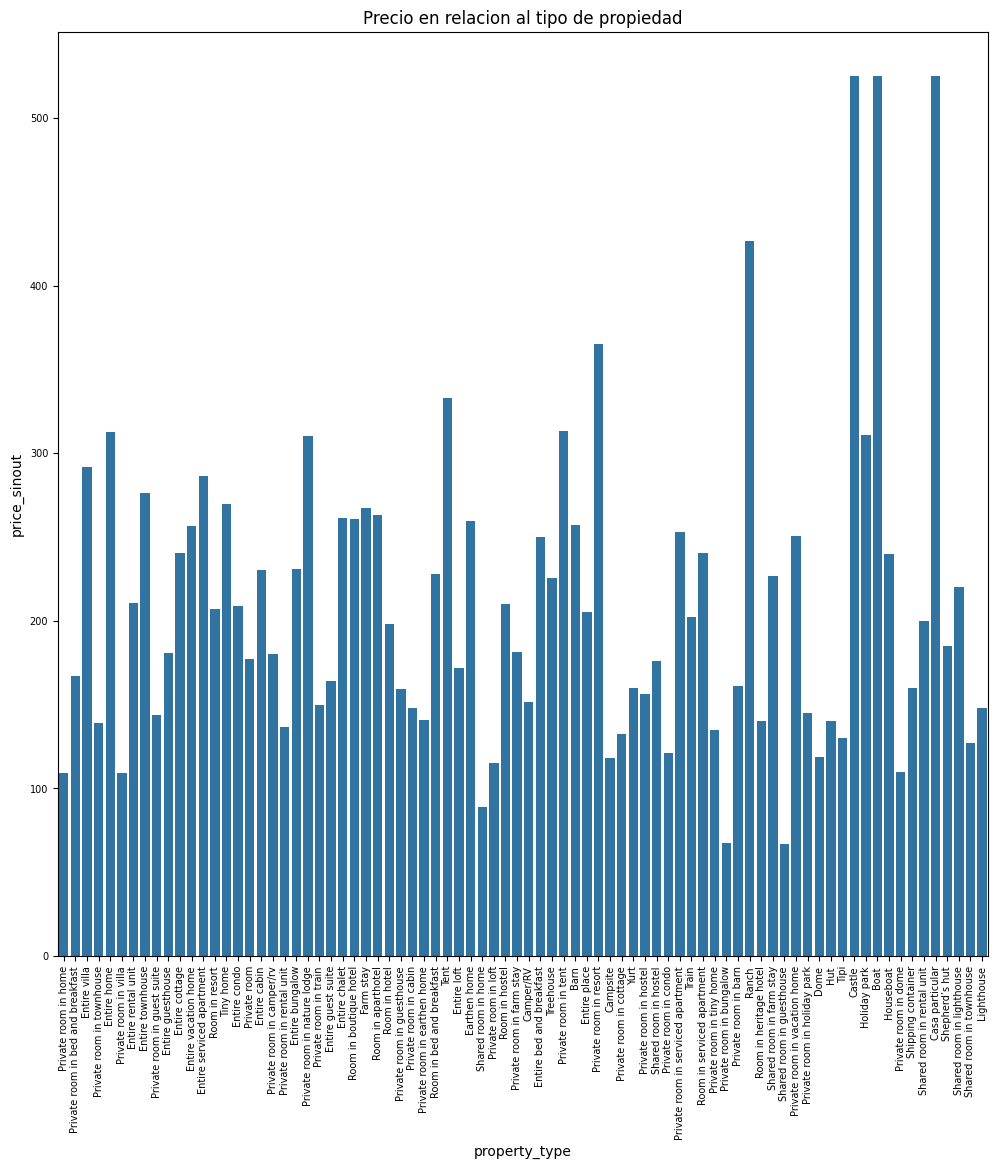

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\784882438.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y = 'property_type', x = 'price', data = df_Airbnb_listings, ci = None)


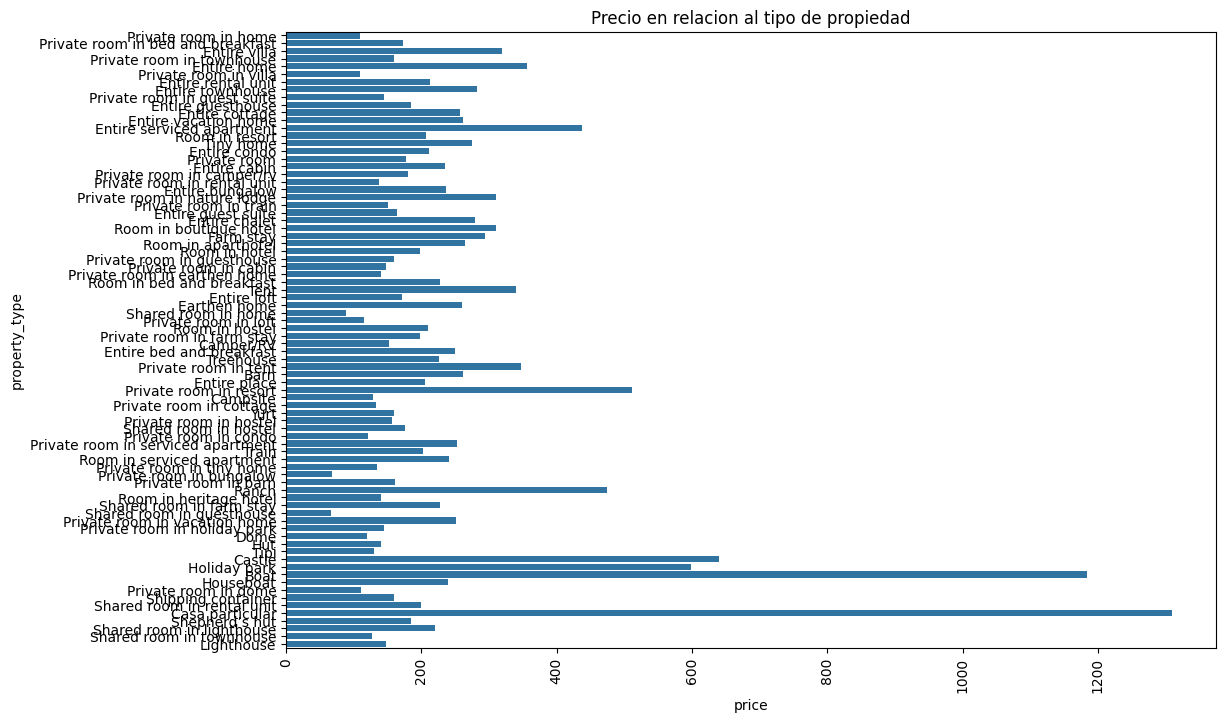

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\784882438.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y = 'property_type', x = 'price_log', data = df_Airbnb_listings, ci = None)


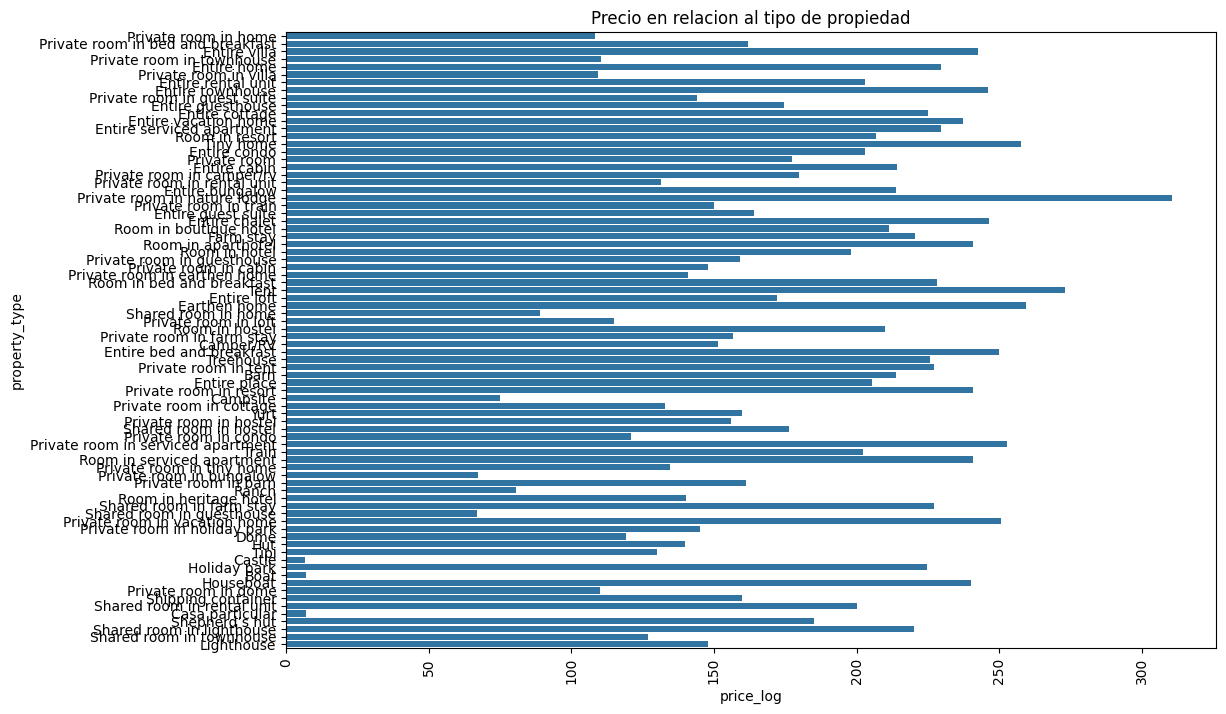

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\784882438.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'property_type', y = 'review_scores_rating', data = df_Airbnb_listings, ci = None)


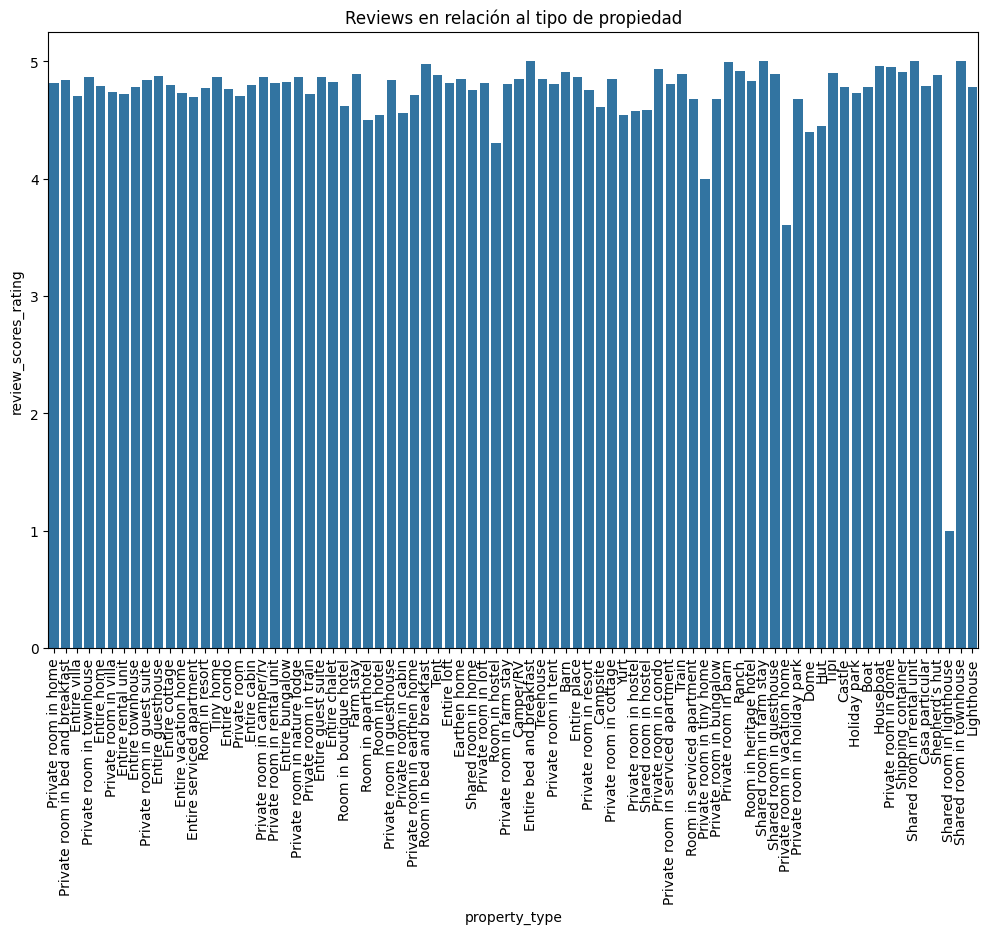

In [103]:
# Gráfico de barras entre property_type y price_sinout, price, price_log y reviews_score_rating
#Tamaño del gráfico

plt.figure(figsize=(12,12))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(y = 'price_sinout', x = 'property_type', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Precio en relacion al tipo de propiedad')
plt.show()

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(y = 'property_type', x = 'price', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Precio en relacion al tipo de propiedad')
plt.show()

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(y = 'property_type', x = 'price_log', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Precio en relacion al tipo de propiedad')
plt.show()

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'property_type', y = 'review_scores_rating', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Reviews en relación al tipo de propiedad')
plt.show()

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\3586210053.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'neighbourhood_cleansed', y = 'review_scores_location', data = df_Airbnb_listings, ci = None)


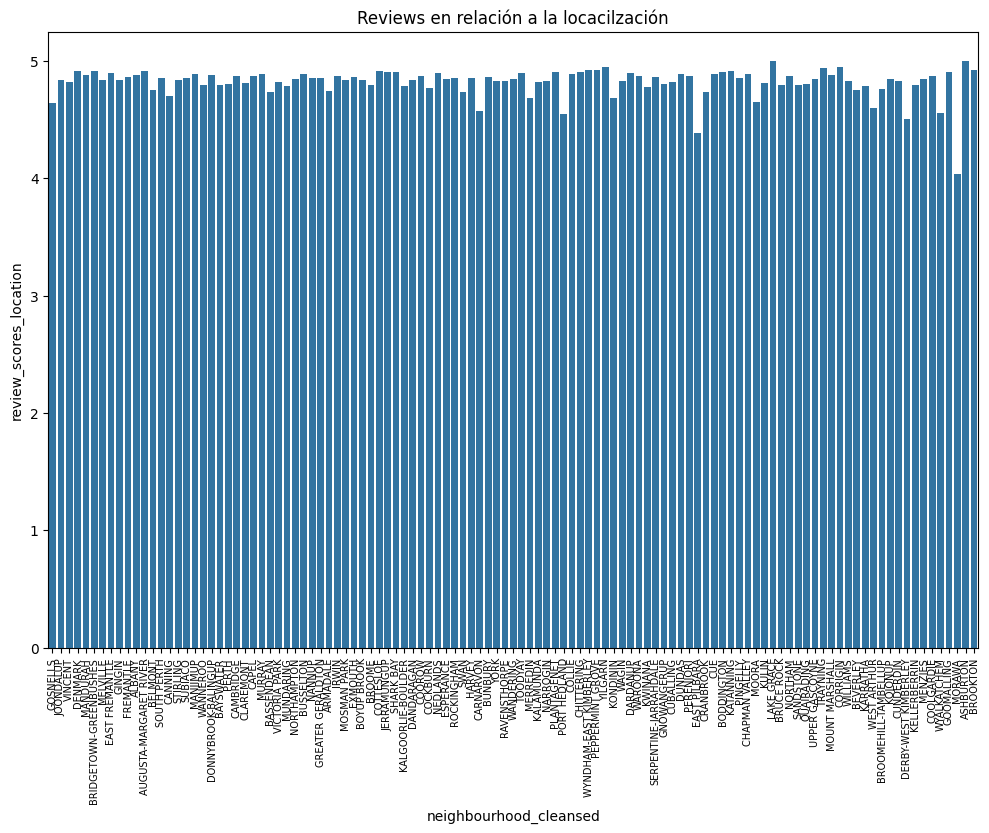

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\3586210053.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'neighbourhood_cleansed', y = 'reviews_media', data = df_Airbnb_listings, ci = None)


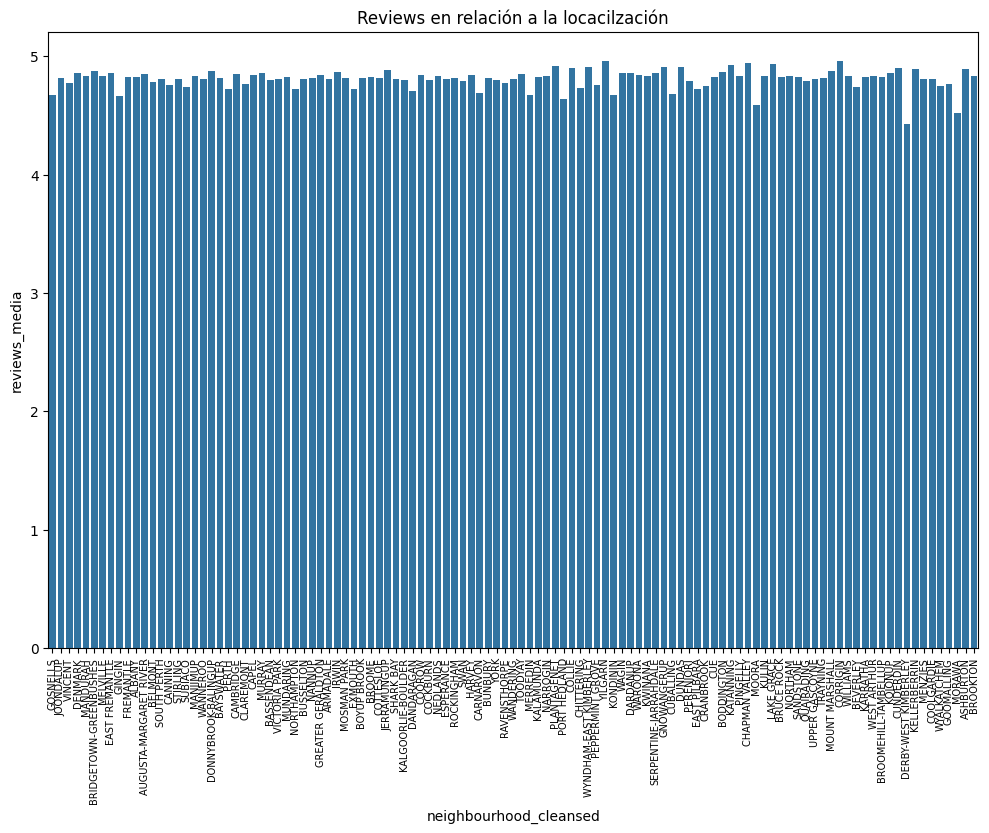

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\3586210053.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y = 'neighbourhood_cleansed', x = 'price', data = df_Airbnb_listings, ci = None)


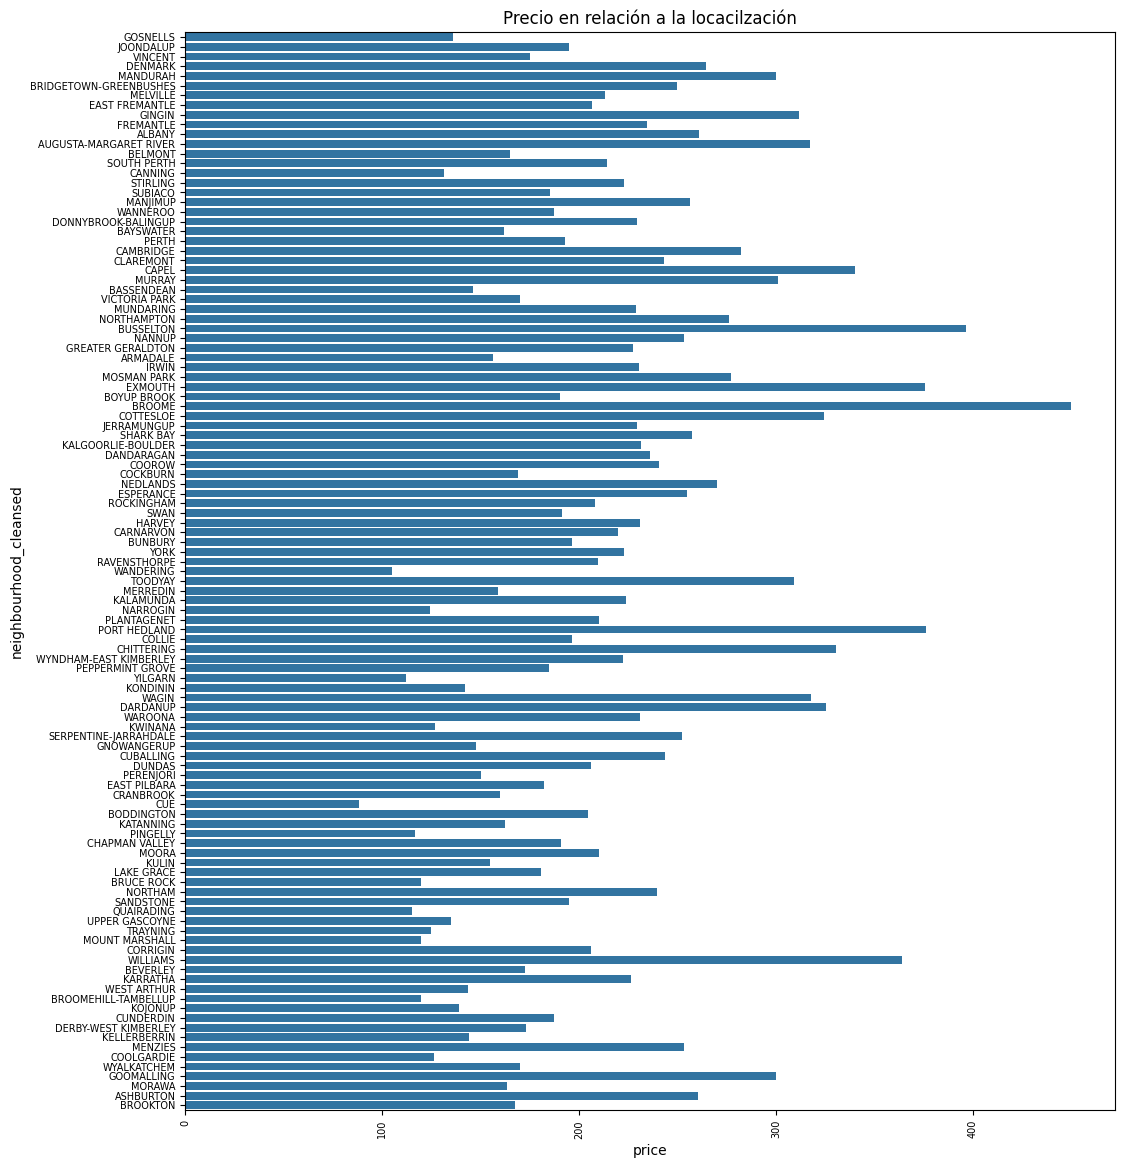

In [104]:
# Gráfico de barras entre neighbourhood_cleansed y review_scores_location, reviews_media, price
#Tamaño del gráfico

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'neighbourhood_cleansed', y = 'review_scores_location', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=10)
plt.title('Reviews en relación a la locacilzación')
plt.show()

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'neighbourhood_cleansed', y = 'reviews_media', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=10)
plt.title('Reviews en relación a la locacilzación')
plt.show()

plt.figure(figsize=(12,14))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(y = 'neighbourhood_cleansed', x = 'price', data = df_Airbnb_listings, ci = None)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Precio en relación a la locacilzación')
plt.show()

In [105]:
#Repensar para futuro, investigación host_name

# Gráfico de barras entre host_name y bedrooms_sinout, review_scores_rating, reviews_media
#Tamaño del gráfico
'''
plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_name', y = 'bedrooms_sinout', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Habitaciones en relación al host')
plt.show()

plt.figure(figsize=(12,8))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_name', y = 'review_scores_rating', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Reviews en relación al host')
plt.show()

plt.figure(figsize=(12,8))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_name', y = 'reviews_media', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Media de reviews en relación al host')
plt.show()
'''

"\nplt.figure(figsize=(12,8))\n\n#Variables a mostrar, el 'ci' elimina el intervalo de confianza\nsns.barplot(x = 'host_name', y = 'bedrooms_sinout', data = df_Airbnb_listings, ci = None)\n#Rotacion de etiquetas\nplt.xticks(rotation = 90, fontsize=7)\nplt.yticks(fontsize=7)\nplt.title('Habitaciones en relación al host')\nplt.show()\n\nplt.figure(figsize=(12,8))\n#Variables a mostrar, el 'ci' elimina el intervalo de confianza\nsns.barplot(x = 'host_name', y = 'review_scores_rating', data = df_Airbnb_listings, ci = None)\n#Rotacion de etiquetas\nplt.xticks(rotation = 90, fontsize=7)\nplt.yticks(fontsize=7)\nplt.title('Reviews en relación al host')\nplt.show()\n\nplt.figure(figsize=(12,8))\n#Variables a mostrar, el 'ci' elimina el intervalo de confianza\nsns.barplot(x = 'host_name', y = 'reviews_media', data = df_Airbnb_listings, ci = None)\n#Rotacion de etiquetas\nplt.xticks(rotation = 90, fontsize=7)\nplt.yticks(fontsize=7)\nplt.title('Media de reviews en relación al host')\nplt.show()\

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1532869206.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'host_acceptance_rate_CAT', y = 'reviews_media', data = df_Airbnb_listings, ci = None)


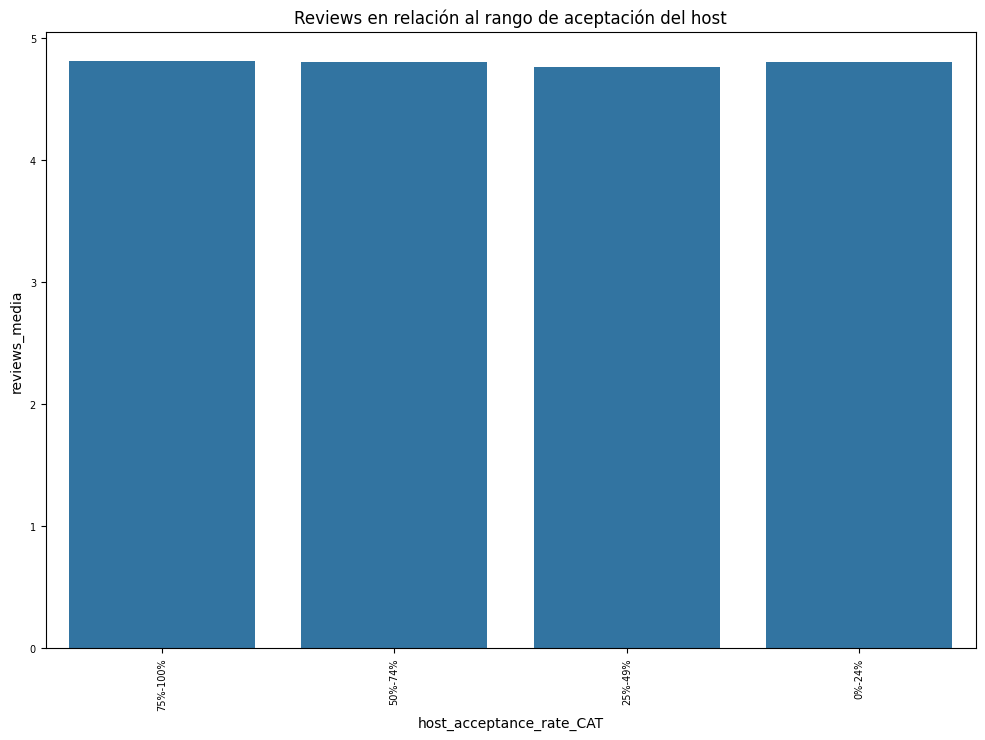

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1532869206.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'host_acceptance_rate_CAT', y = 'review_scores_rating', data = df_Airbnb_listings, ci = None)


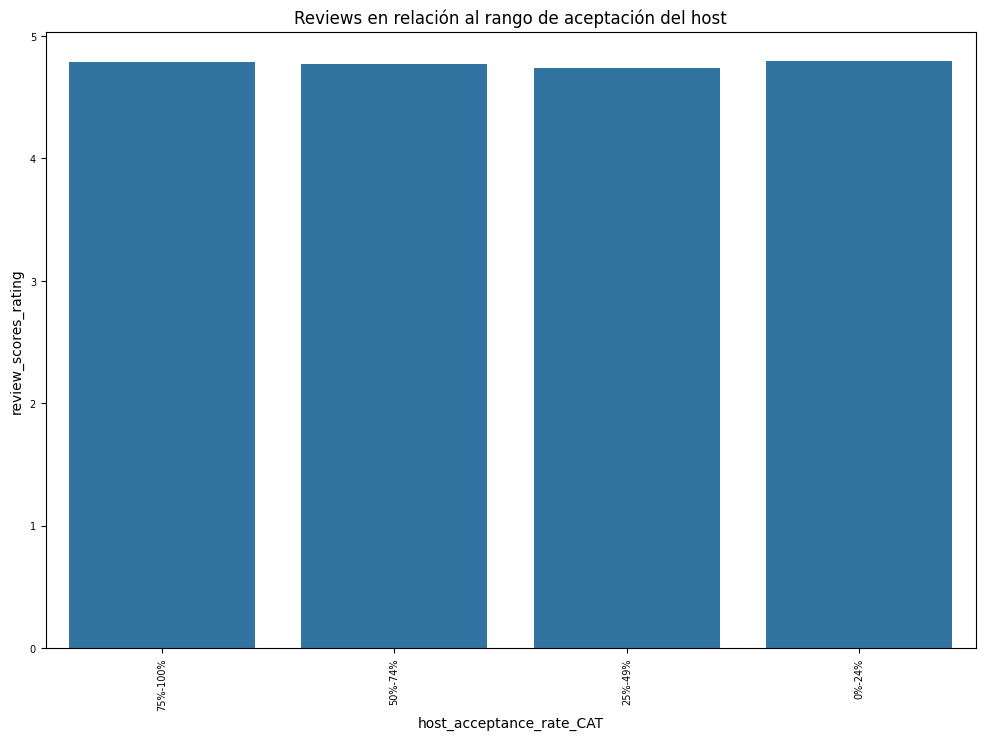

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1532869206.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'host_acceptance_rate_CAT', y = 'review_scores_value', data = df_Airbnb_listings, ci = None)


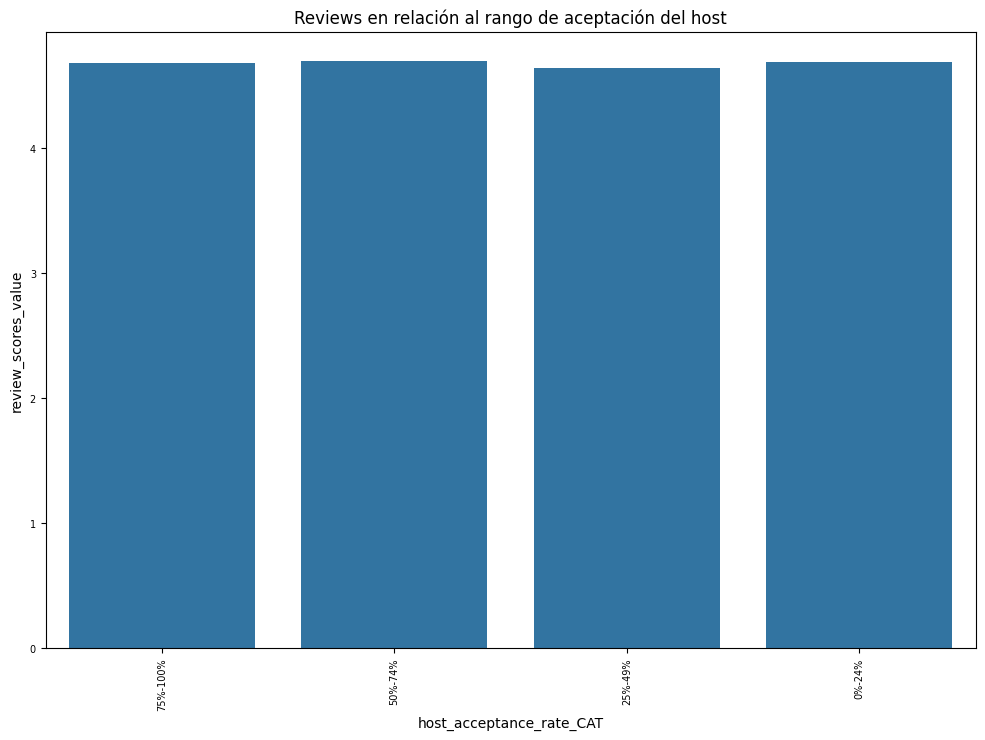

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1532869206.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'host_acceptance_rate_CAT', y = 'bedrooms_sinout', data = df_Airbnb_listings, ci = None)


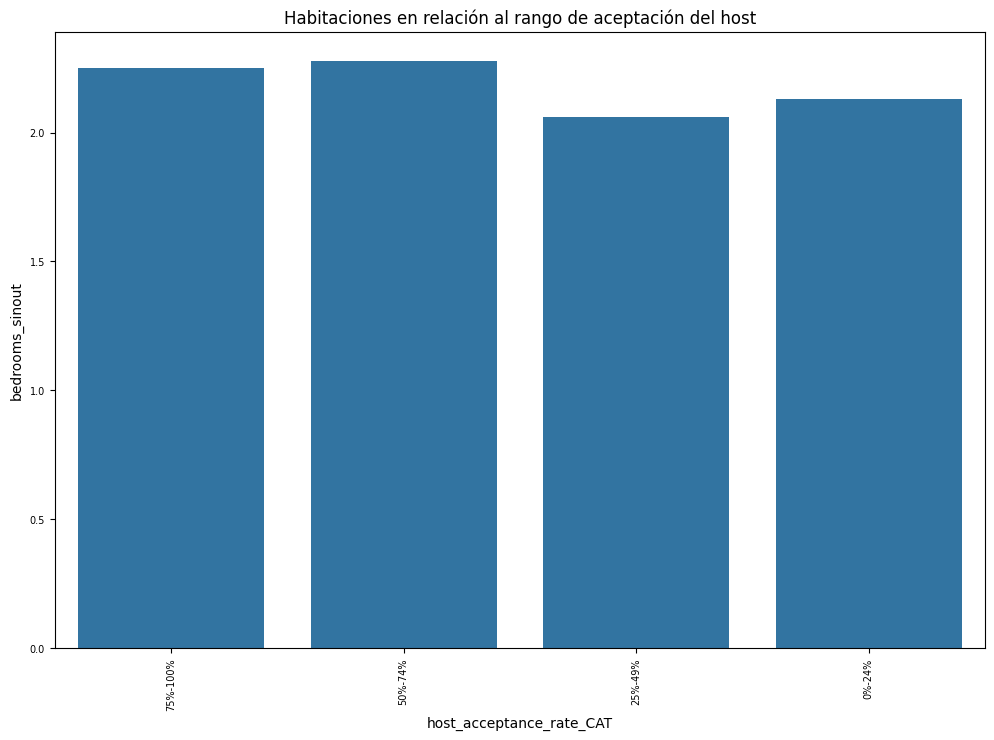

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\1532869206.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'host_acceptance_rate_CAT', y = 'price_sinout', data = df_Airbnb_listings, ci = None)


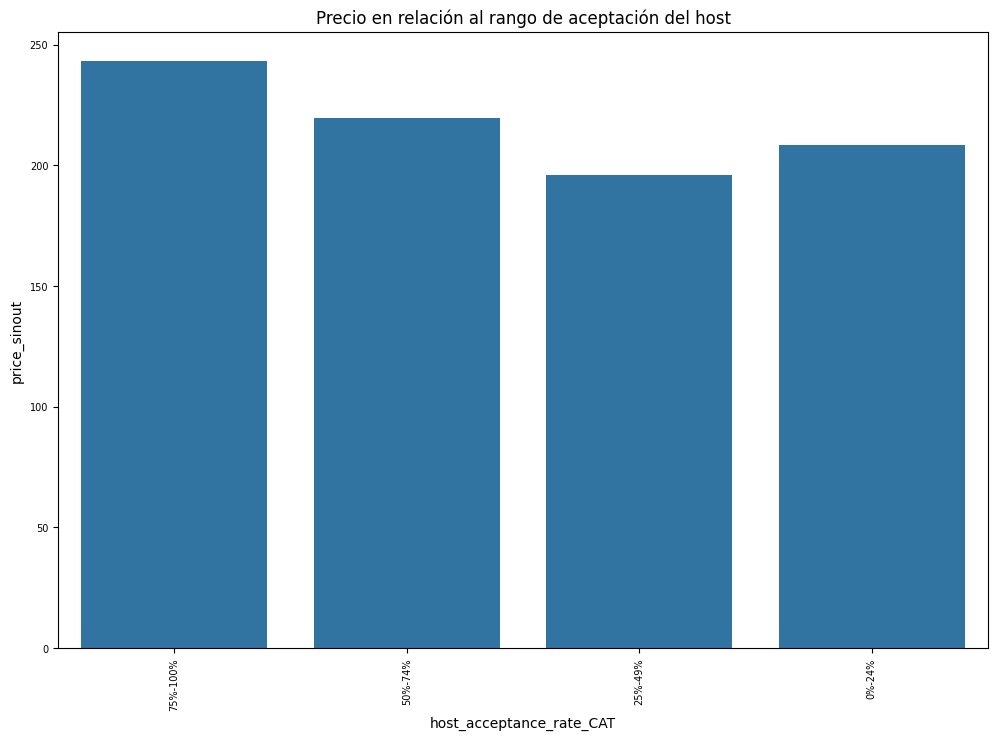

In [106]:
# Gráfico de barras entre host_acceptance_rate_CAT y review_scores_rating, reviews_media, review_scores_value, price_sinout, bedrooms_sinout
#Tamaño del gráfico

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_acceptance_rate_CAT', y = 'reviews_media', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Reviews en relación al rango de aceptación del host')
plt.show()

plt.figure(figsize=(12,8))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_acceptance_rate_CAT', y = 'review_scores_rating', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Reviews en relación al rango de aceptación del host')
plt.show()

plt.figure(figsize=(12,8))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_acceptance_rate_CAT', y = 'review_scores_value', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Reviews en relación al rango de aceptación del host')
plt.show()


plt.figure(figsize=(12,8))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_acceptance_rate_CAT', y = 'bedrooms_sinout', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Habitaciones en relación al rango de aceptación del host')
plt.show()

plt.figure(figsize=(12,8))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_acceptance_rate_CAT', y = 'price_sinout', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Precio en relación al rango de aceptación del host')
plt.show()

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\2691207724.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'host_is_superhost', y = 'review_scores_rating', data = df_Airbnb_listings, ci = None)


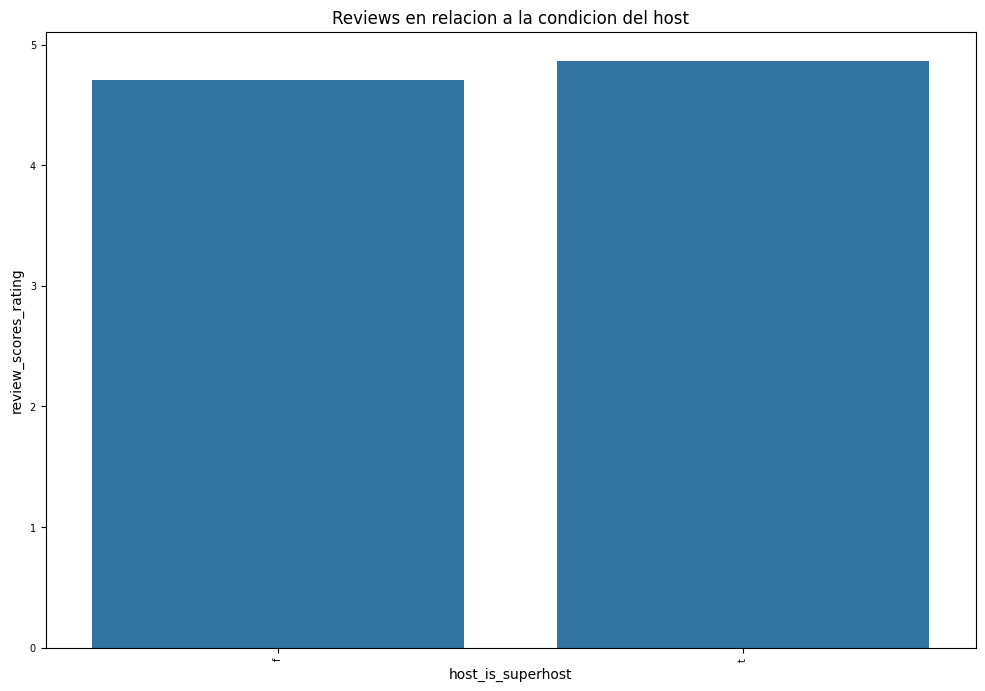

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\2691207724.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'host_is_superhost', y = 'bedrooms_sinout', data = df_Airbnb_listings, ci = None)


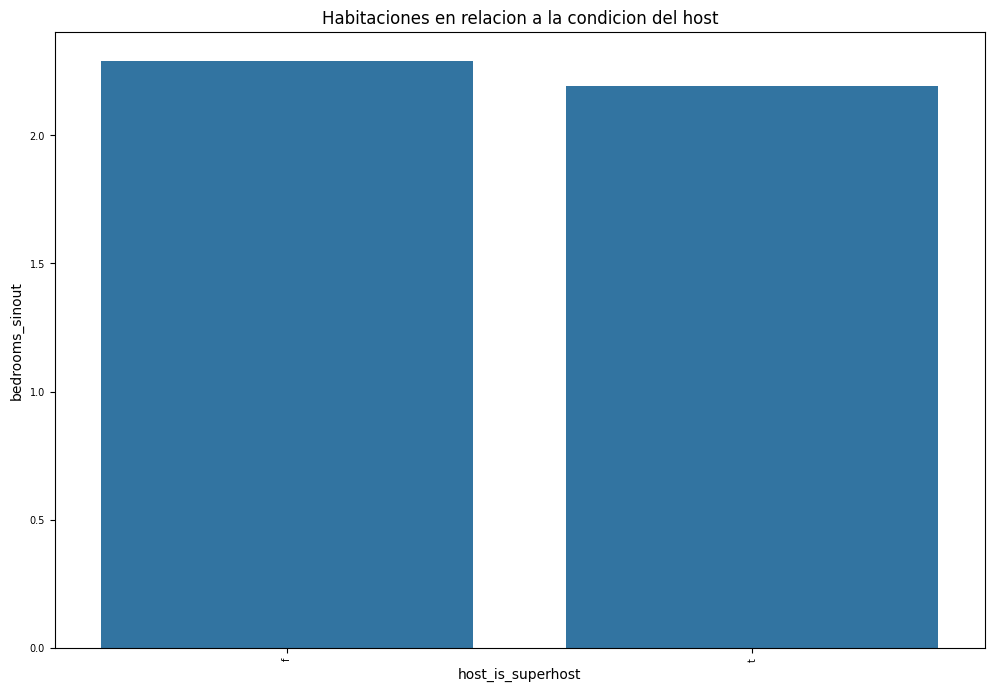

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\2691207724.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'host_is_superhost', y = 'price', data = df_Airbnb_listings, ci = None)


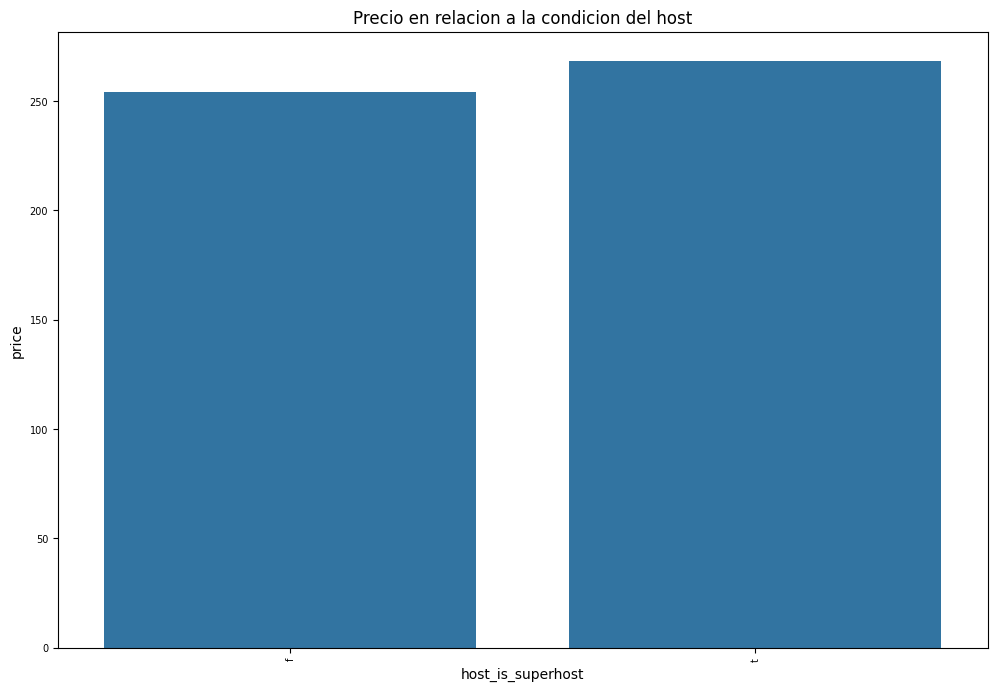

In [107]:
# Gráfico de barras entre host_is_superhost y review_scores_rating, price, bedrooms_sinout
#Tamaño del gráfico

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_is_superhost', y = 'review_scores_rating', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Reviews en relacion a la condicion del host')
plt.show()


plt.figure(figsize=(12,8))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_is_superhost', y = 'bedrooms_sinout', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Habitaciones en relacion a la condicion del host')
plt.show()

plt.figure(figsize=(12,8))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'host_is_superhost', y = 'price', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Precio en relacion a la condicion del host')
plt.show()

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\512724399.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'room_type', y = 'review_scores_rating', data = df_Airbnb_listings, ci = None)


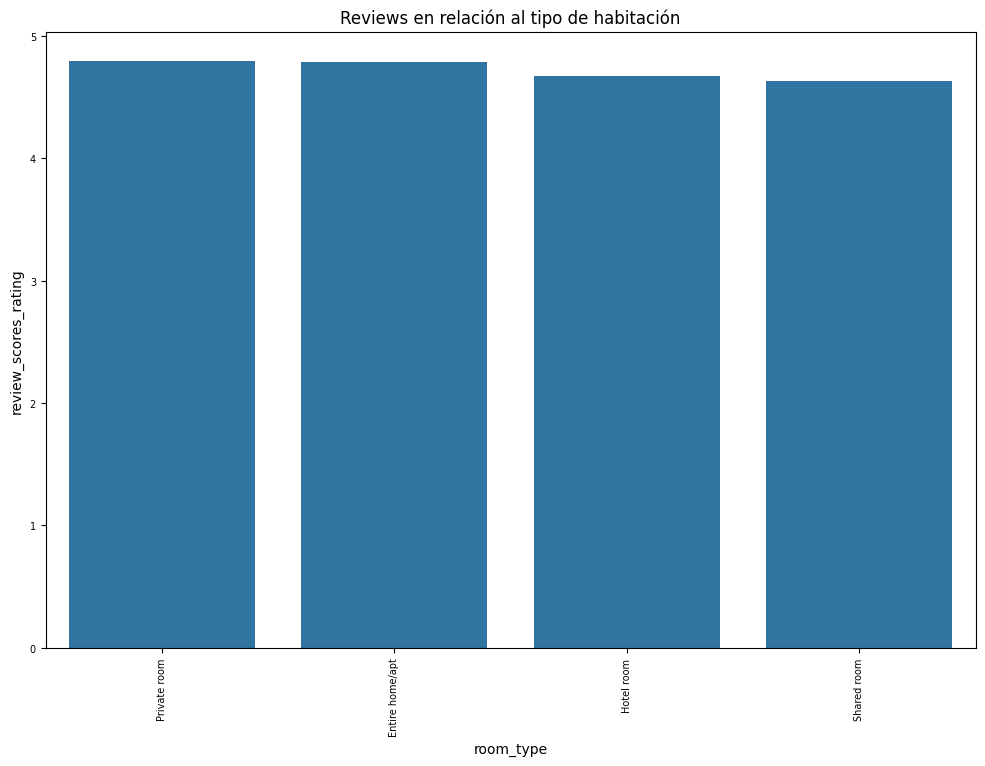

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\512724399.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'room_type', y = 'price_sinout', data = df_Airbnb_listings, ci = None)


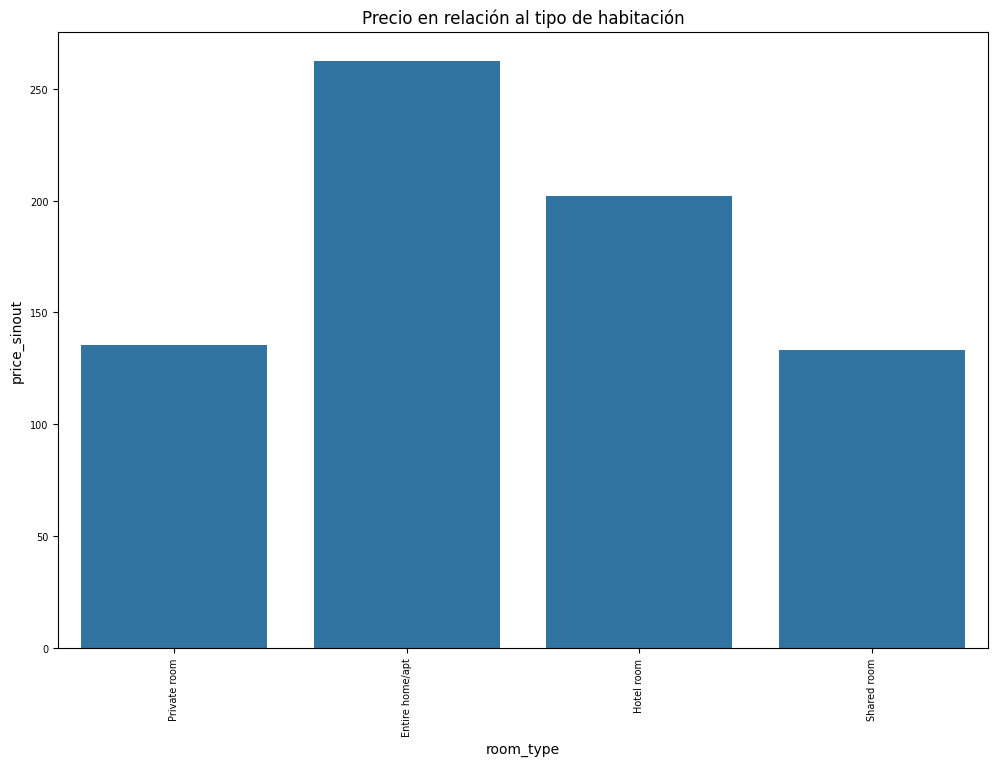

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\512724399.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'room_type', y = 'price', data = df_Airbnb_listings, ci = None)


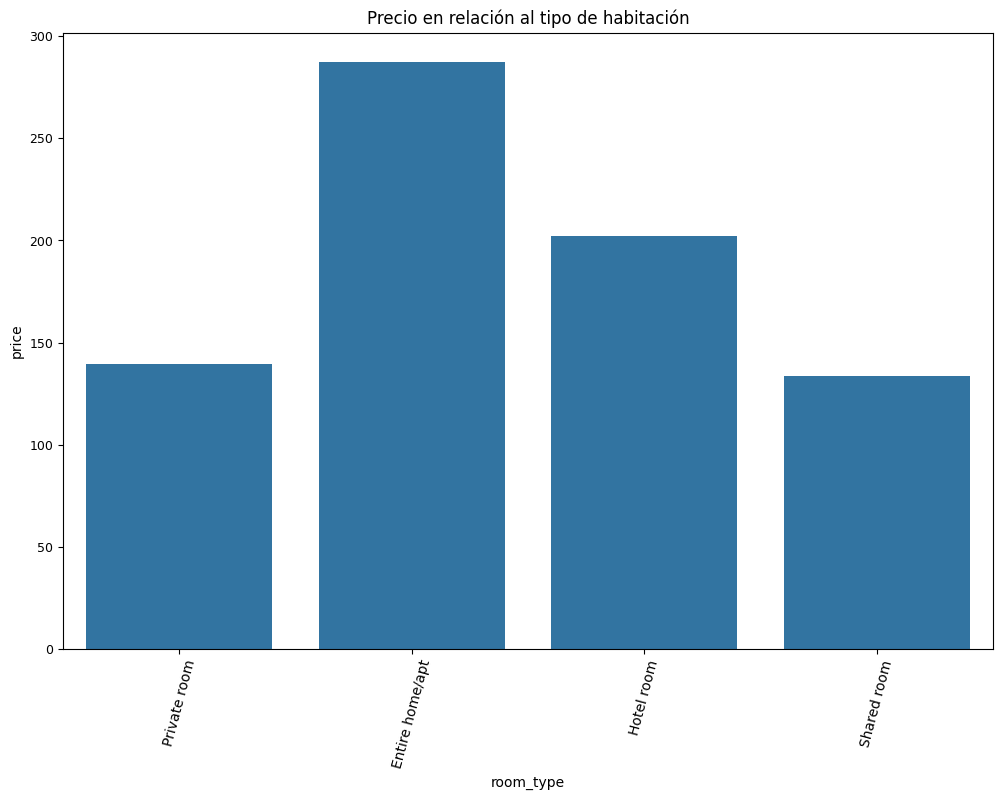

In [108]:
# Gráfico de barras entre room_type y review_scores_rating, price, price_sinout
#Tamaño del gráfico

plt.figure(figsize=(12,8))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'room_type', y = 'review_scores_rating', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Reviews en relación al tipo de habitación')
plt.show()


plt.figure(figsize=(12,8))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'room_type', y = 'price_sinout', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Precio en relación al tipo de habitación')
plt.show()

plt.figure(figsize=(12,8))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'room_type', y = 'price', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 75, fontsize=10)
plt.yticks(fontsize=9)
plt.title('Precio en relación al tipo de habitación')
plt.show()

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\2716331197.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'instant_bookable', y = 'review_scores_communication', data = df_Airbnb_listings, ci = None)


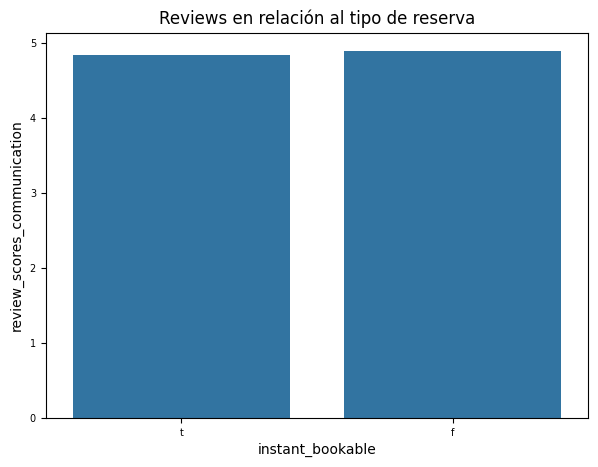

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\2716331197.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'instant_bookable', y = 'beds', data = df_Airbnb_listings, ci = None)


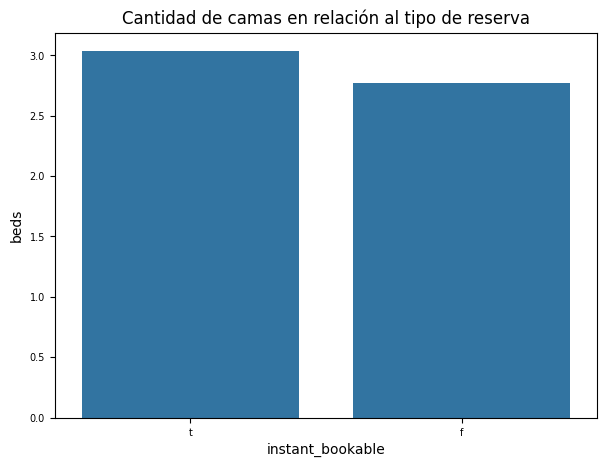

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\2716331197.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'instant_bookable', y = 'bedrooms_sinout', data = df_Airbnb_listings, ci = None)


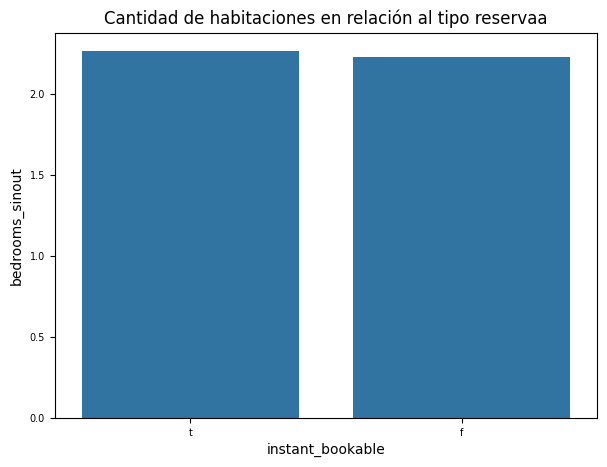

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\2716331197.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'instant_bookable', y = 'price_sinout', data = df_Airbnb_listings, ci = None)


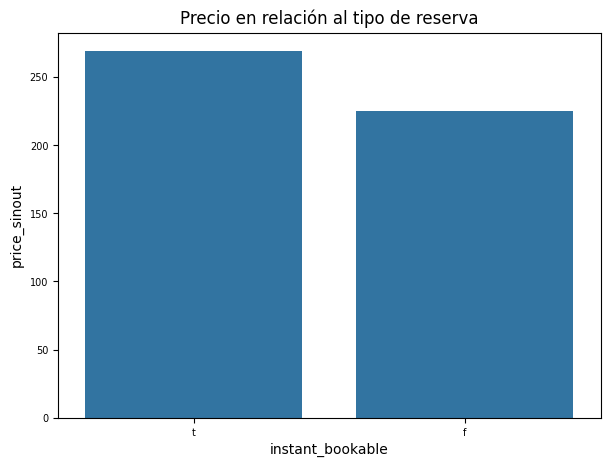

C:\Users\usuari\AppData\Local\Temp\ipykernel_8092\2716331197.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'instant_bookable', y = 'price', data = df_Airbnb_listings, ci = None)


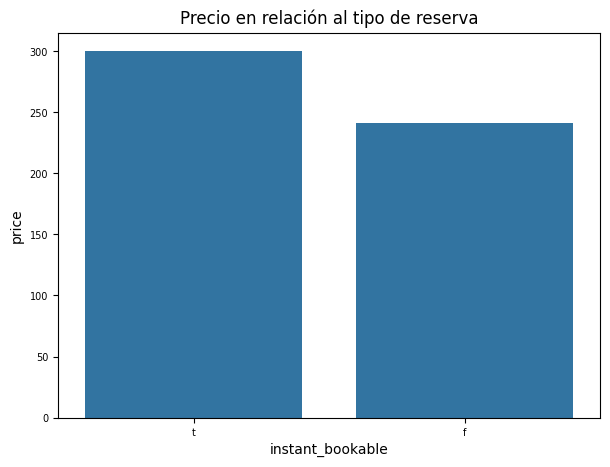

In [109]:
# Gráfico de barras entre instant_bookable y review_scores_comunication, beds, bedrooms_sinout, price, price_sinout
#Tamaño del gráfico

plt.figure(figsize=(7,5))

#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'instant_bookable', y = 'review_scores_communication', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 0, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Reviews en relación al tipo de reserva')
plt.show()


plt.figure(figsize=(7,5))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'instant_bookable', y = 'beds', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 0, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Cantidad de camas en relación al tipo de reserva')
plt.show()

plt.figure(figsize=(7,5))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'instant_bookable', y = 'bedrooms_sinout', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 0, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Cantidad de habitaciones en relación al tipo reservaa')
plt.show()

plt.figure(figsize=(7,5))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'instant_bookable', y = 'price_sinout', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 0, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Precio en relación al tipo de reserva')
plt.show()

plt.figure(figsize=(7,5))
#Variables a mostrar, el 'ci' elimina el intervalo de confianza
sns.barplot(x = 'instant_bookable', y = 'price', data = df_Airbnb_listings, ci = None)
#Rotacion de etiquetas
plt.xticks(rotation = 0, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Precio en relación al tipo de reserva')
plt.show()

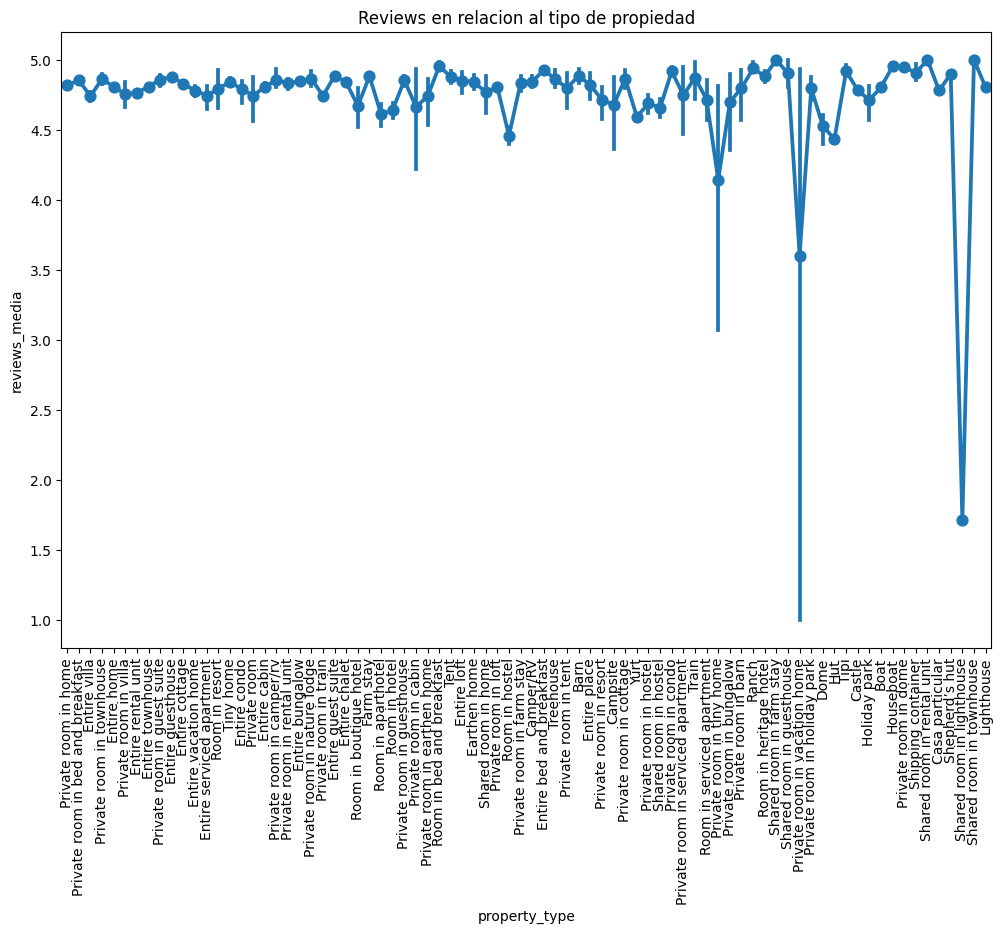

In [110]:
#Gráfico de puntos
#Tamaño del gráfico
plt.figure(figsize=(12,8))

#Variables a mostrar,
sns.pointplot(x='property_type', y='reviews_media', data=df_Airbnb_listings)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Reviews en relacion al tipo de propiedad')
plt.show()

In [111]:
#Repensar para futuro, investigación host_name
#Gráfico de puntos
#Tamaño del gráfico
'''
plt.figure(figsize=(12,8))

#Variables a mostrar,
sns.pointplot(x='host_name', y='reviews_media', data=df_Airbnb_listings)

#Rotacion de etiquetas
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.title('Reviews en relacion al host')
plt.show()
'''       

"\nplt.figure(figsize=(12,8))\n\n#Variables a mostrar,\nsns.pointplot(x='host_name', y='reviews_media', data=df_Airbnb_listings)\n\n#Rotacion de etiquetas\nplt.xticks(rotation = 90, fontsize=10)\nplt.yticks(fontsize=10)\nplt.title('Reviews en relacion al host')\nplt.show()\n"

#### 'Categórica' vs 'Categórica'

##### Tabla de contingencia y Heatmap para variable host_is_superhost con room_type, instant_bookable, accommodates y host_acceptance_rate_CAT

In [112]:
#Heatmap para las variables host_accpetance_rate_CAT y host_is_superhost
#Creacion de la tabla de contigencia para las variables indicadas
tabla_contingencia_hostsh_room = pd.crosstab(df_Airbnb_listings['host_is_superhost'], df_Airbnb_listings['room_type'])
print(tabla_contingencia_hostsh_room)

room_type          Entire home/apt  Hotel room  Private room  Shared room
host_is_superhost                                                        
f                             4916          38          1117           36
t                             4691          11           913            3


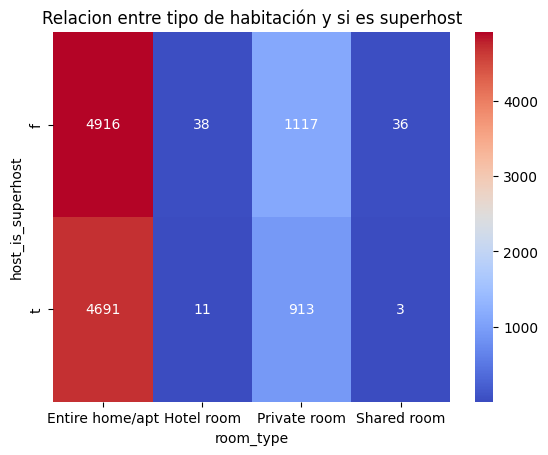

In [113]:
#Creacion del heatmap para las variables de la tabla de contingencia
sns.heatmap(tabla_contingencia_hostsh_room, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relacion entre tipo de habitación y si es superhost')
plt.show()

In [114]:
#Heatmap para las variables host_accpetance_rate_CAT y host_is_superhost
#Creacion de la tabla de contigencia para las variables indicadas
tabla_contingencia_hostsh_insbook = pd.crosstab(df_Airbnb_listings['host_is_superhost'], df_Airbnb_listings['instant_bookable'])
print(tabla_contingencia_hostsh_insbook)

instant_bookable      f     t
host_is_superhost            
f                  3979  2128
t                  3823  1795


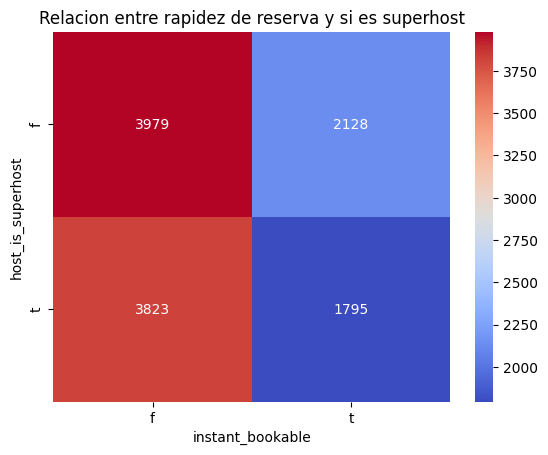

In [115]:
#Creacion del heatmap para las variables de la tabla de contingencia
sns.heatmap(tabla_contingencia_hostsh_insbook, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relacion entre rapidez de reserva y si es superhost')
plt.show()

In [116]:
#Heatmap para las variables host_accpetance_rate_CAT y host_is_superhost
#Creacion de la tabla de contigencia para las variables indicadas
tabla_contingencia_hostsh_accomm = pd.crosstab(df_Airbnb_listings['host_is_superhost'], df_Airbnb_listings['accommodates'])
print(tabla_contingencia_hostsh_accomm)

accommodates        1     2    3     4    5     6    7    8   9    10  11  12  \
host_is_superhost                                                               
f                  309  1682  207  1157  381  1049  165  635  99  232  31  92   
t                  206  1750  163  1112  235  1046  137  567  62  210  15  79   

accommodates       13  14  15  16  
host_is_superhost                  
f                  16  19   6  27  
t                   5  12   1  18  


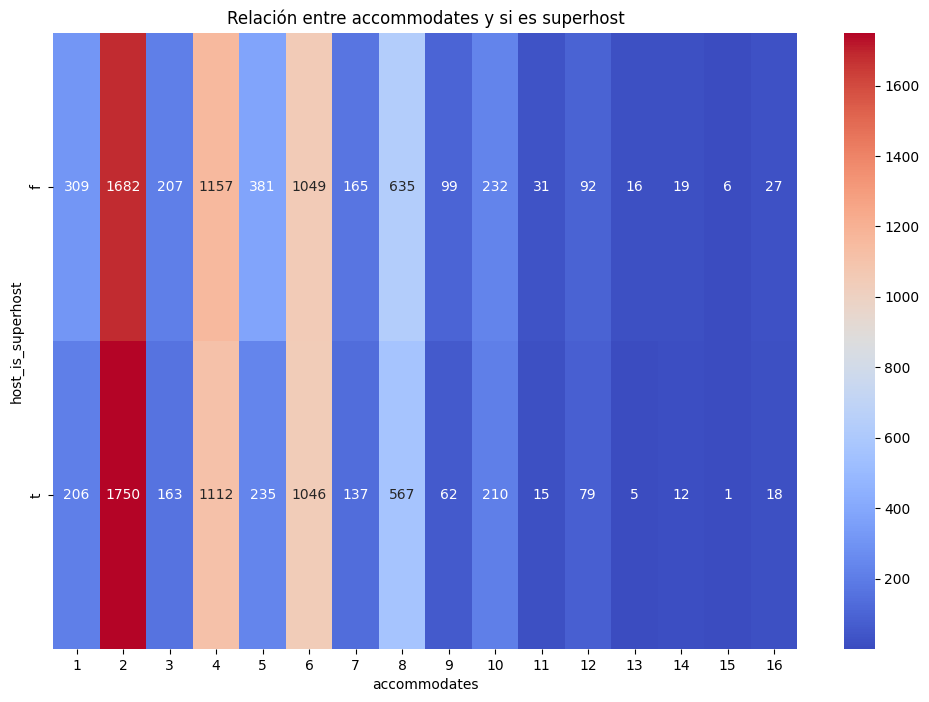

In [117]:
#Creacion del heatmap para las variables de la tabla de contingencia
plt.figure(figsize=(12,8))
sns.heatmap(tabla_contingencia_hostsh_accomm, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relación entre accommodates y si es superhost')
plt.show()

In [118]:
#Heatmap para las variables host_accpetance_rate_CAT y host_is_superhost
#Creacion de la tabla de contigencia para las variables indicadas
tabla_contingencia_host = pd.crosstab(df_Airbnb_listings['host_is_superhost'], df_Airbnb_listings['host_acceptance_rate_CAT'])
print(tabla_contingencia_host)

host_acceptance_rate_CAT  0%-24%  25%-49%  50%-74%  75%-100%
host_is_superhost                                           
f                            301      221      505      5080
t                              6       27      206      5379


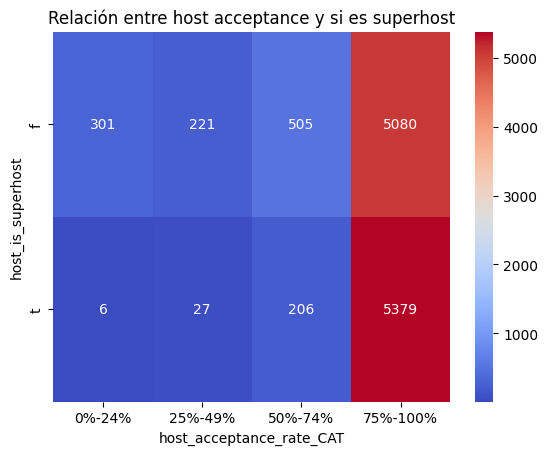

In [119]:
#Creacion del heatmap para las variables de la tabla de contingencia
sns.heatmap(tabla_contingencia_host, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relación entre host acceptance y si es superhost')
plt.show()

##### Tabla de contingencia y Heatmap para property_type con neighbourhood_cleansed_OHE y room_type

In [120]:
#Heatmap para las variables property_type y neighbourhood_cleansed_OHE
#Creacion de la tabla de contigencia para las variables indicadas
tabla_contingencia_property_neig = pd.crosstab(df_Airbnb_listings['property_type'], df_Airbnb_listings['neighbourhood_cleansed_OHE'])
print(tabla_contingencia_property_neig)

neighbourhood_cleansed_OHE  0.01% to 0.99%  1% to 1.99%  2% to 4.99%  \
property_type                                                          
Barn                                     6            2            1   
Boat                                     0            1            1   
Camper/RV                               12           17            4   
Campsite                                11            1            0   
Casa particular                          1            1            0   
...                                    ...          ...          ...   
Tiny home                               40           19           10   
Tipi                                     0            3            0   
Train                                    2            0            1   
Treehouse                                2            1            1   
Yurt                                     0            1            0   

neighbourhood_cleansed_OHE  5% to 9.99%  10% to 100%  
property

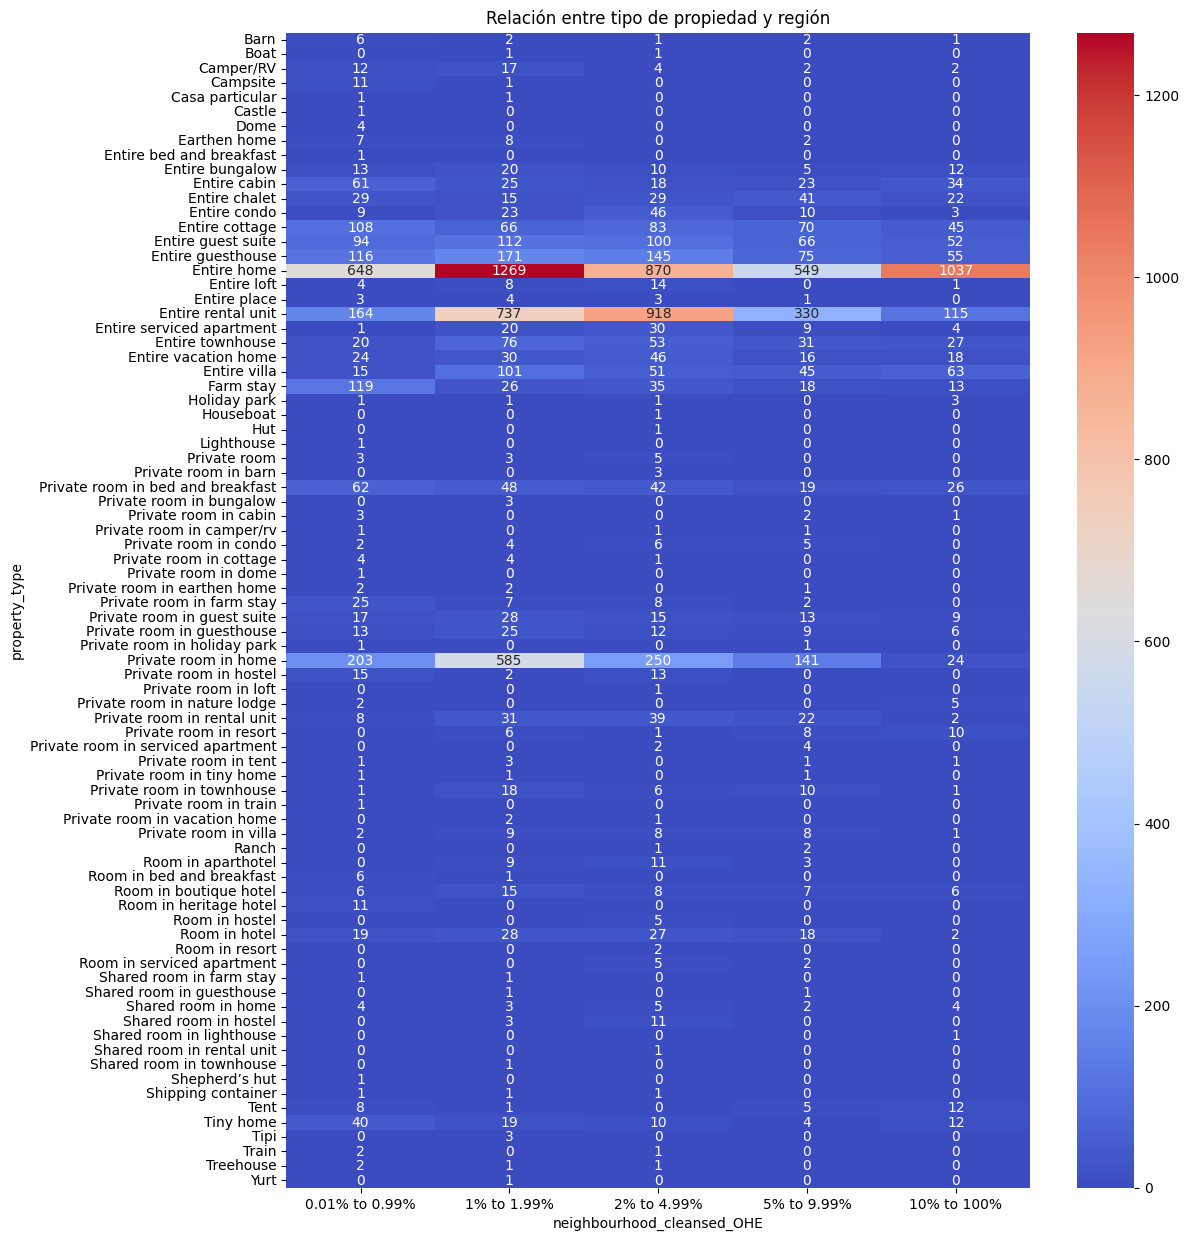

In [121]:
#Creacion del heatmap para las variables de la tabla de contingencia
plt.figure(figsize=(12,15))
sns.heatmap(tabla_contingencia_property_neig, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relación entre tipo de propiedad y región')
plt.show()

In [122]:
#Heatmap para las variables property_type y room_type
#Creacion de la tabla de contigencia para las variables indicadas
tabla_contingencia_property_room = pd.crosstab(df_Airbnb_listings['property_type'], df_Airbnb_listings['room_type'])
print(tabla_contingencia_property_room)

room_type        Entire home/apt  Hotel room  Private room  Shared room
property_type                                                          
Barn                          12           0             0            0
Boat                           2           0             0            0
Camper/RV                     37           0             0            0
Campsite                      12           0             0            0
Casa particular                2           0             0            0
...                          ...         ...           ...          ...
Tiny home                     85           0             0            0
Tipi                           3           0             0            0
Train                          3           0             0            0
Treehouse                      4           0             0            0
Yurt                           1           0             0            0

[80 rows x 4 columns]


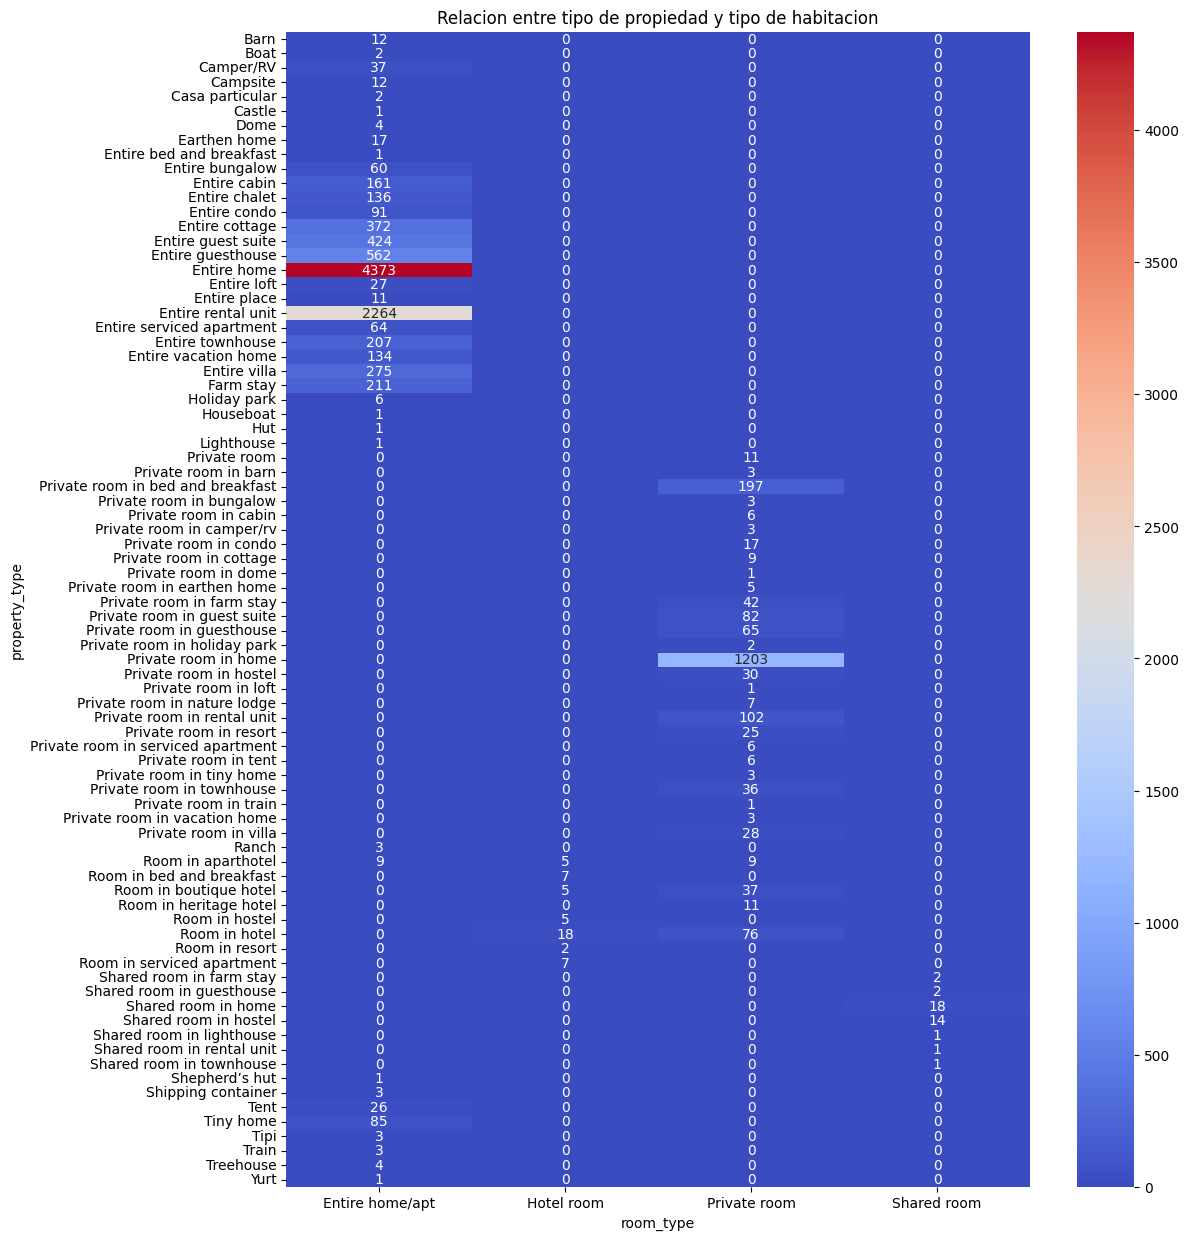

In [123]:
#Creacion del heatmap para las variables de la tabla de contingencia
plt.figure(figsize=(12,15))
sns.heatmap(tabla_contingencia_property_room, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relacion entre tipo de propiedad y tipo de habitacion')
plt.show()

##### Tabla de contingencia y Heatmap para variable neighbourhood_cleansed_OHE con room_type, accommodates y host_is_superhost

In [124]:
#Heatmap para las variables neighbourhood_cleansed_OHE con room_type, accommodates y host_is_superhost
#Creacion de la tabla de contigencia para las variables indicadas
tabla_contingencia_neig_room = pd.crosstab(df_Airbnb_listings['neighbourhood_cleansed_OHE'], df_Airbnb_listings['room_type'])
print(tabla_contingencia_neig_room)

tabla_contingencia_neig_acco = pd.crosstab(df_Airbnb_listings['neighbourhood_cleansed_OHE'], df_Airbnb_listings['accommodates'])
print(tabla_contingencia_neig_acco)

tabla_contingencia_neig_hostsup = pd.crosstab(df_Airbnb_listings['neighbourhood_cleansed_OHE'], df_Airbnb_listings['host_is_superhost'])
print(tabla_contingencia_neig_hostsup)

room_type                   Entire home/apt  Hotel room  Private room  \
neighbourhood_cleansed_OHE                                              
0.01% to 0.99%                         1527           7           403   
1% to 1.99%                            2763          14           817   
2% to 4.99%                            2479          21           446   
5% to 9.99%                            1307           7           270   
10% to 100%                            1531           0            94   

room_type                   Shared room  
neighbourhood_cleansed_OHE               
0.01% to 0.99%                        5  
1% to 1.99%                           9  
2% to 4.99%                          17  
5% to 9.99%                           3  
10% to 100%                           5  
accommodates                 1     2    3    4    5    6   7    8   9    10  \
neighbourhood_cleansed_OHE                                                    
0.01% to 0.99%               65   60

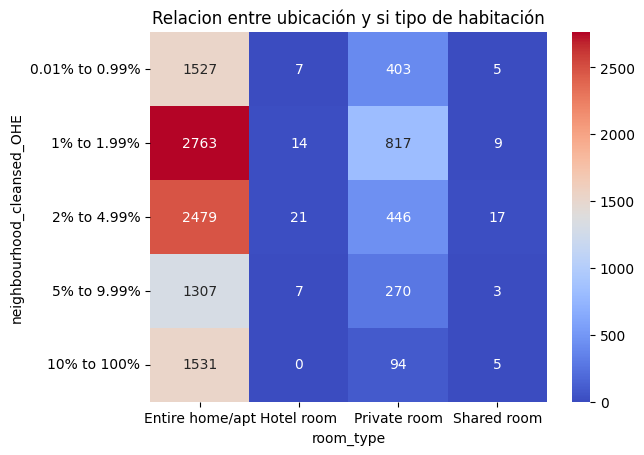

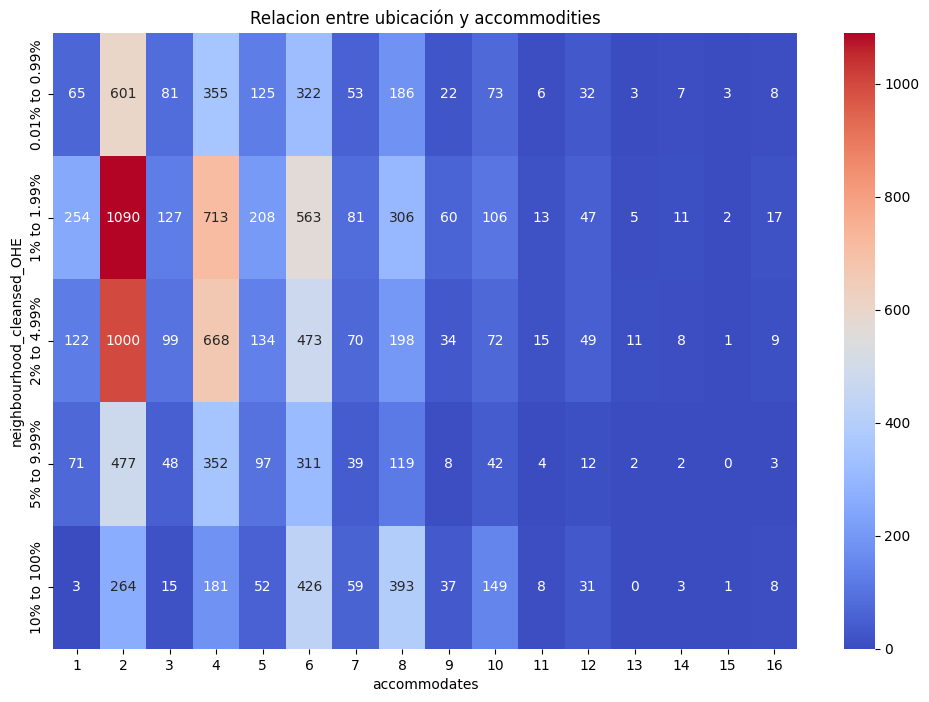

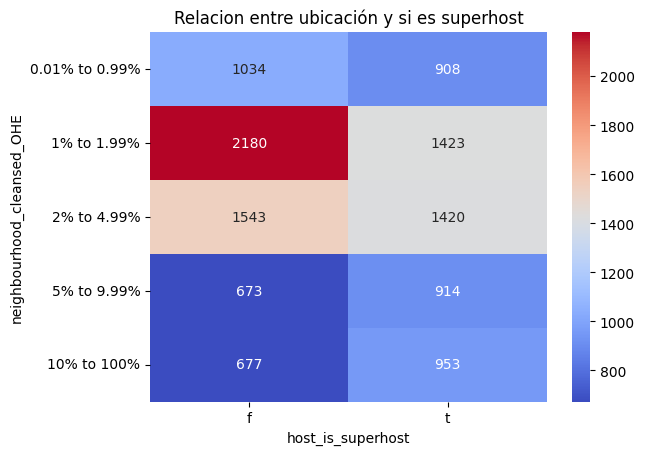

In [125]:
#Creacion del heatmap para las variables de la tabla de contingencia
sns.heatmap(tabla_contingencia_neig_room, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relacion entre ubicación y si tipo de habitación')
plt.show()

plt.figure(figsize=(12,8))

sns.heatmap(tabla_contingencia_neig_acco, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relacion entre ubicación y accommodities')
plt.show()

sns.heatmap(tabla_contingencia_neig_hostsup, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relacion entre ubicación y si es superhost')
plt.show()

##### Tabla de contingencia y Heatmap para variable instant_bookable con room_type, neighbourhood_cleansed_OHE y host_acceptance_rate_CAT

In [126]:
#Creacion de la tabla de contigencia para las variables indicadas
tabla_contingencia_instbook_room = pd.crosstab(df_Airbnb_listings['instant_bookable'], df_Airbnb_listings['room_type'])
print(tabla_contingencia_instbook_room)

tabla_contingencia_instbook_neig = pd.crosstab(df_Airbnb_listings['instant_bookable'], df_Airbnb_listings['neighbourhood_cleansed_OHE'])
print(tabla_contingencia_instbook_neig)

tabla_contingencia_instbook_hostacc = pd.crosstab(df_Airbnb_listings['instant_bookable'], df_Airbnb_listings['host_acceptance_rate_CAT'])
print(tabla_contingencia_instbook_hostacc)



room_type         Entire home/apt  Hotel room  Private room  Shared room
instant_bookable                                                        
f                            6268          25          1485           24
t                            3339          24           545           15
neighbourhood_cleansed_OHE  0.01% to 0.99%  1% to 1.99%  2% to 4.99%  \
instant_bookable                                                       
f                                     1335         2450         2041   
t                                      607         1153          922   

neighbourhood_cleansed_OHE  5% to 9.99%  10% to 100%  
instant_bookable                                      
f                                  1003          973  
t                                   584          657  
host_acceptance_rate_CAT  0%-24%  25%-49%  50%-74%  75%-100%
instant_bookable                                            
f                            301      246      692      6563
t               

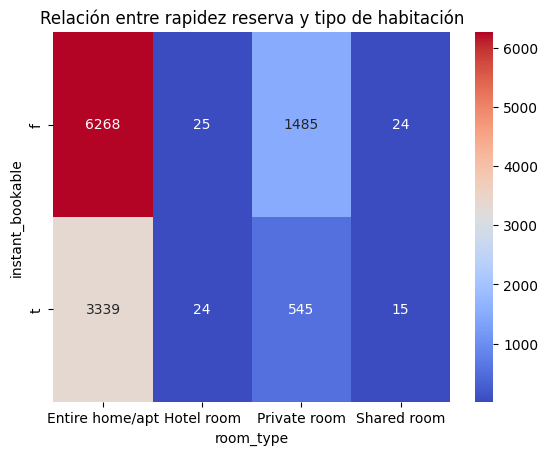

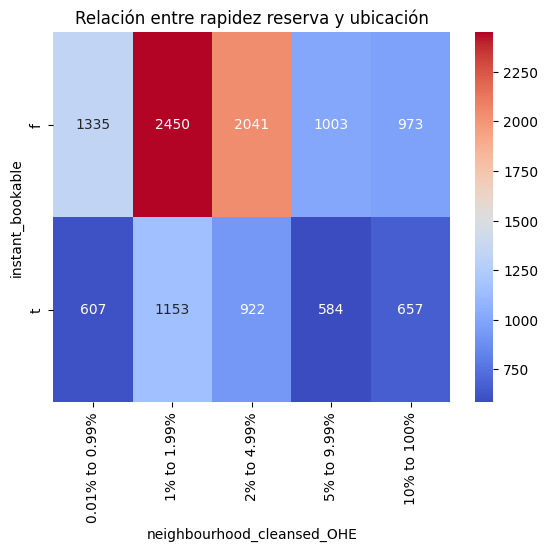

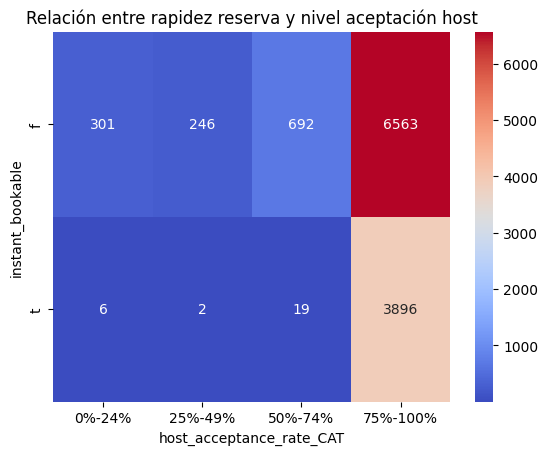

In [127]:
#Creacion del heatmap para las variables de la tabla de contingencia
sns.heatmap(tabla_contingencia_instbook_room, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relación entre rapidez reserva y tipo de habitación')
plt.show()

sns.heatmap(tabla_contingencia_instbook_neig, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relación entre rapidez reserva y ubicación')
plt.show()

sns.heatmap(tabla_contingencia_instbook_hostacc, annot = True, cmap = 'coolwarm', fmt = 'd') #annot muestra los valores numéricos, fmt: define el formato de los numeros
plt.title('Relación entre rapidez reserva y nivel aceptación host')
plt.show()

##### Quiero conservar la siguiente tabla ya que me parece interesante pero no la entiendo

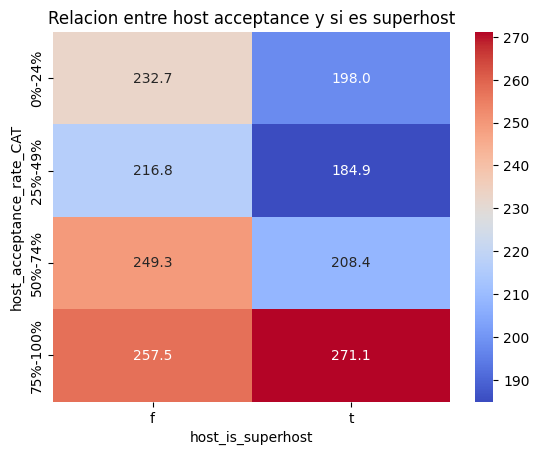

In [128]:
tabla_promedio = df_Airbnb_listings.pivot_table(index = 'host_acceptance_rate_CAT', columns = 'host_is_superhost', values = 'price', aggfunc = 'mean')
sns.heatmap(tabla_promedio, annot = True, cmap = 'coolwarm', fmt = '.1f')
plt.title('Relacion entre host acceptance y si es superhost')
plt.show()

##### Countplots

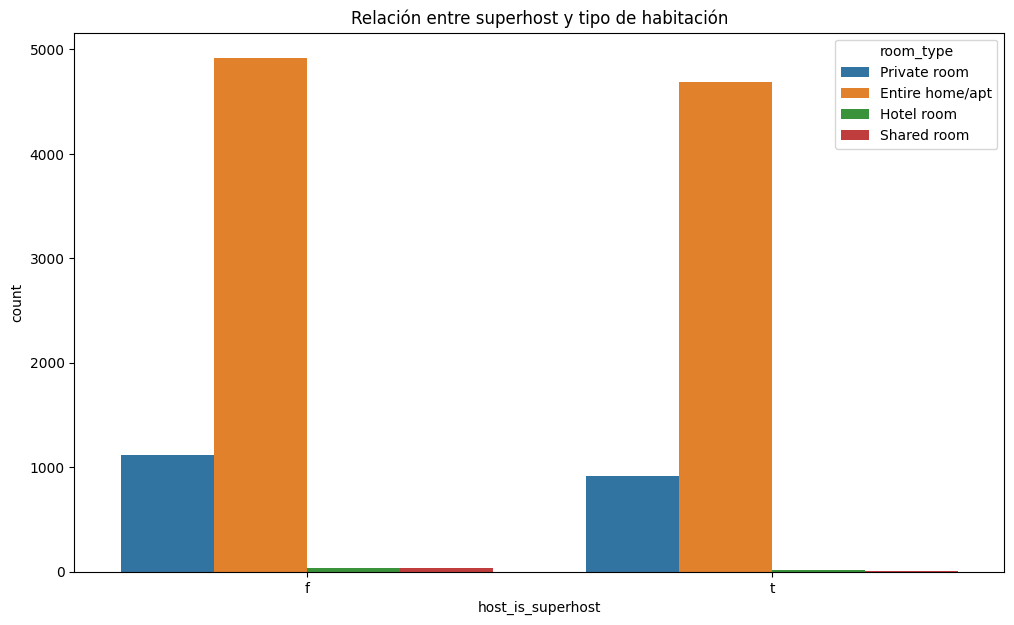

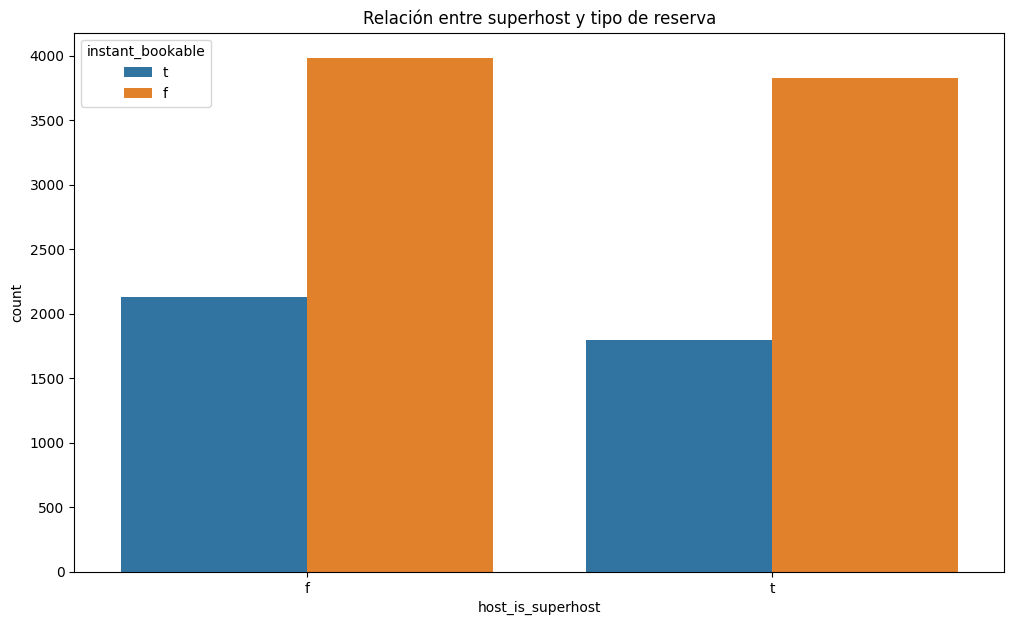

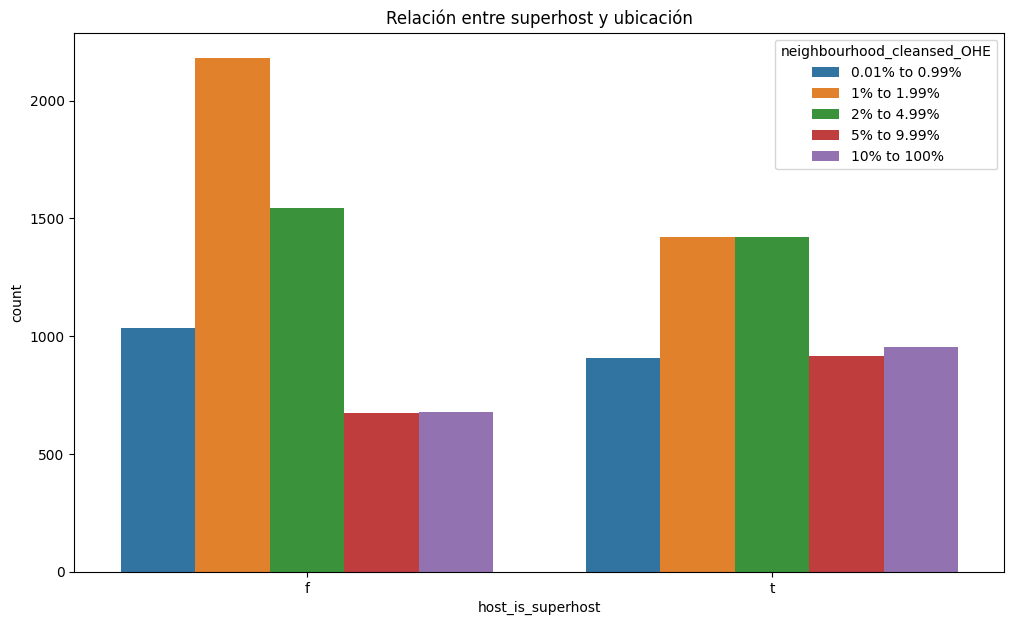

In [129]:
#Gráfico para host_is_superhost con 'room_type', 'instant_bookable', neighbourhood_cleansed_OHE

plt.figure(figsize=(12,7))
sns.countplot(x='host_is_superhost', hue = 'room_type', data = df_Airbnb_listings)
plt.title('Relación entre superhost y tipo de habitación')
plt.show()

plt.figure(figsize=(12,7))
sns.countplot(x='host_is_superhost', hue = 'instant_bookable', data = df_Airbnb_listings)
plt.title('Relación entre superhost y tipo de reserva')
plt.show()

plt.figure(figsize=(12,7))
sns.countplot(x='host_is_superhost', hue = 'neighbourhood_cleansed_OHE', data = df_Airbnb_listings)
plt.title('Relación entre superhost y ubicación')
plt.show()



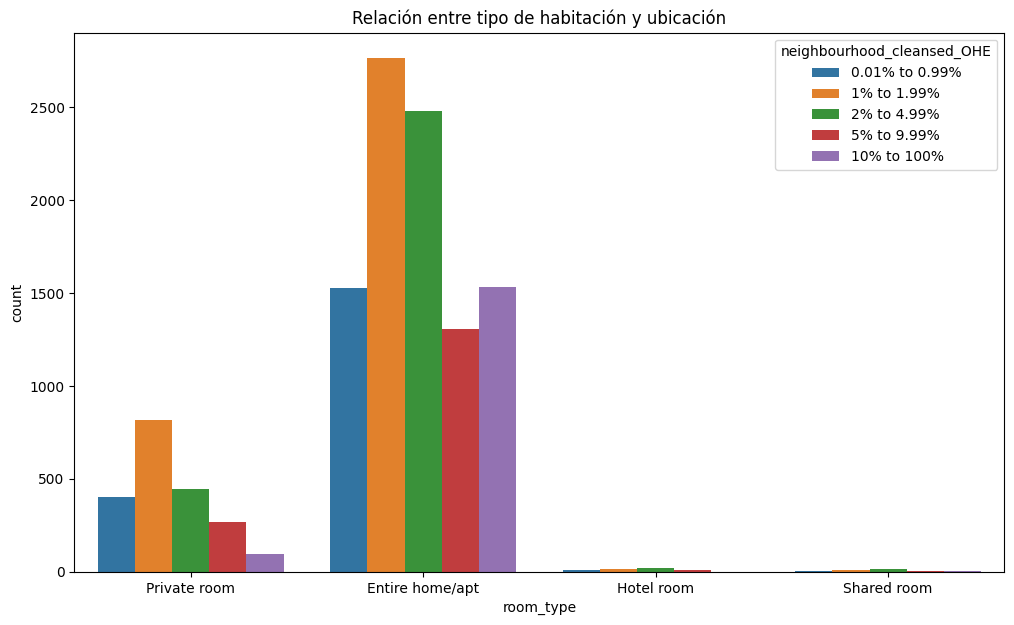

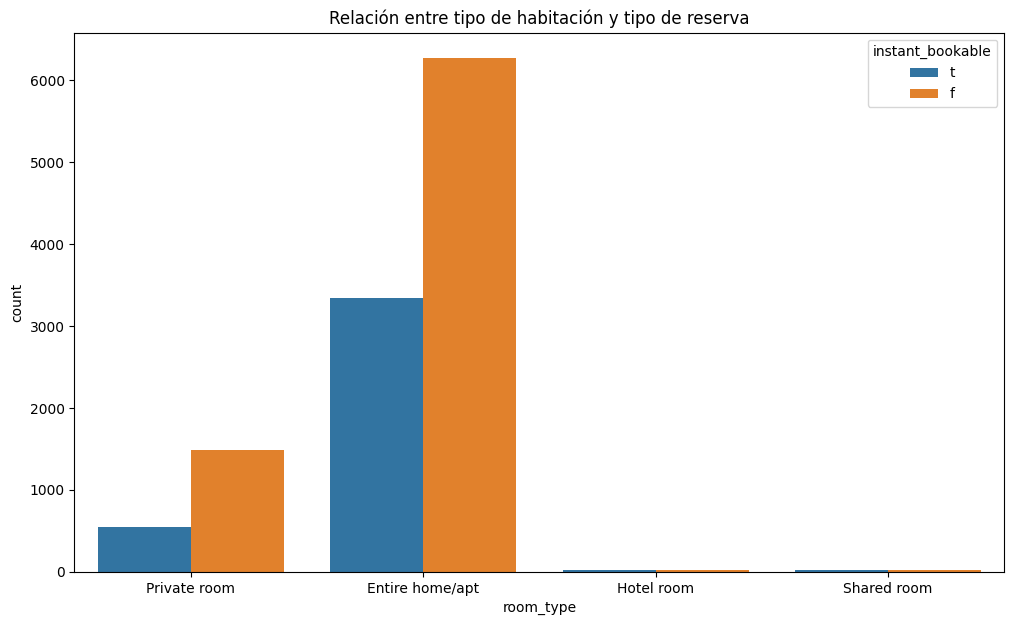

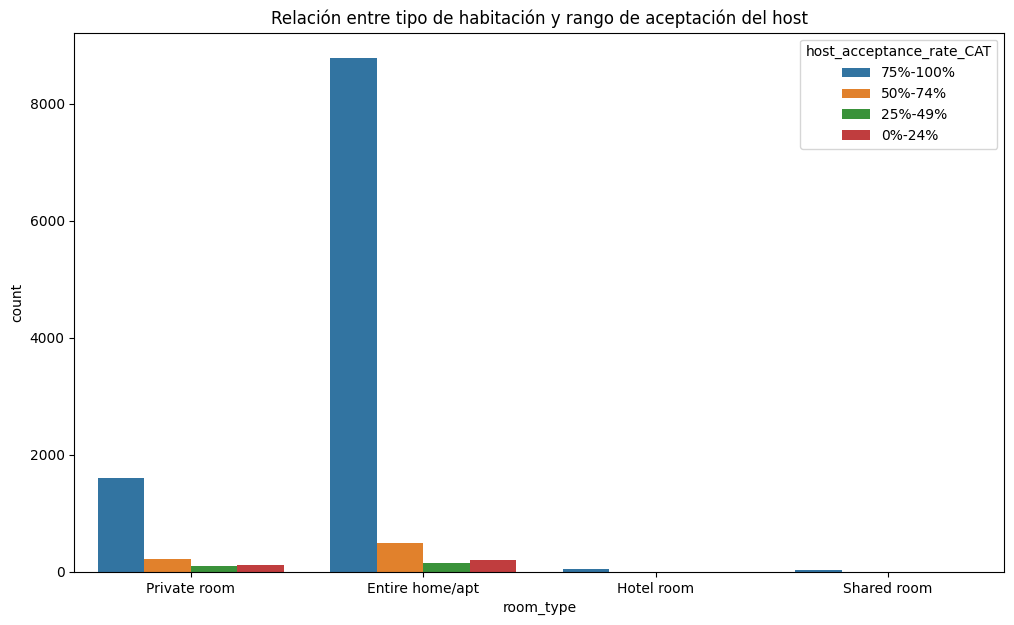

In [130]:
#Gráfico para room_type con 'instant_bookable', neighbourhood_cleansed_OHE

plt.figure(figsize=(12,7))
sns.countplot(x='room_type', hue = 'neighbourhood_cleansed_OHE', data = df_Airbnb_listings)
plt.title('Relación entre tipo de habitación y ubicación')
plt.show()

plt.figure(figsize=(12,7))
sns.countplot(x='room_type', hue = 'instant_bookable', data = df_Airbnb_listings)
plt.title('Relación entre tipo de habitación y tipo de reserva')
plt.show()

plt.figure(figsize=(12,7))
sns.countplot(x='room_type', hue = 'host_acceptance_rate_CAT', data = df_Airbnb_listings)
plt.title('Relación entre tipo de habitación y rango de aceptación del host')
plt.show()


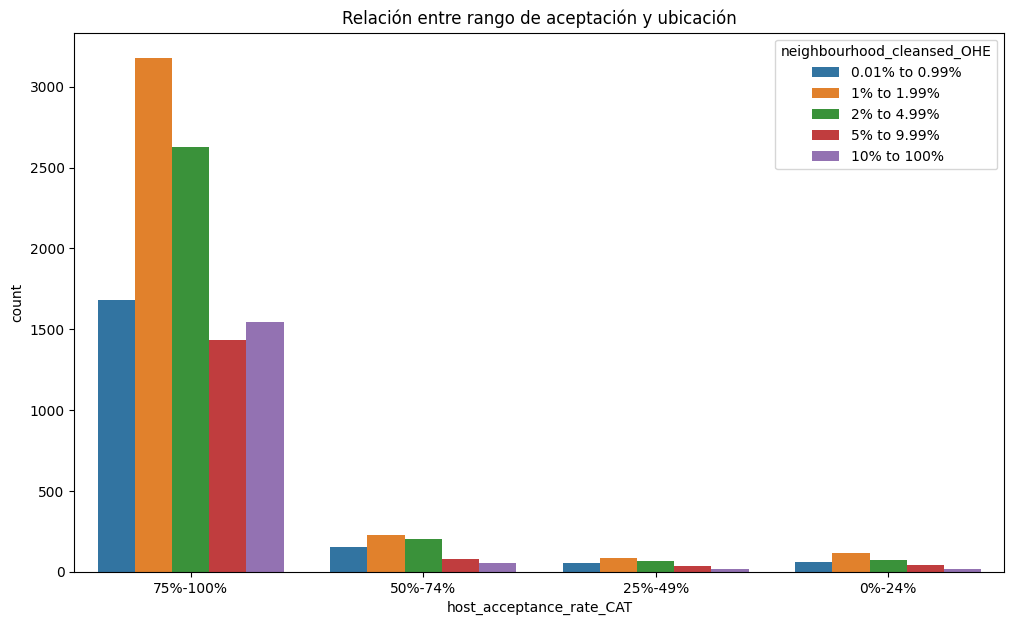

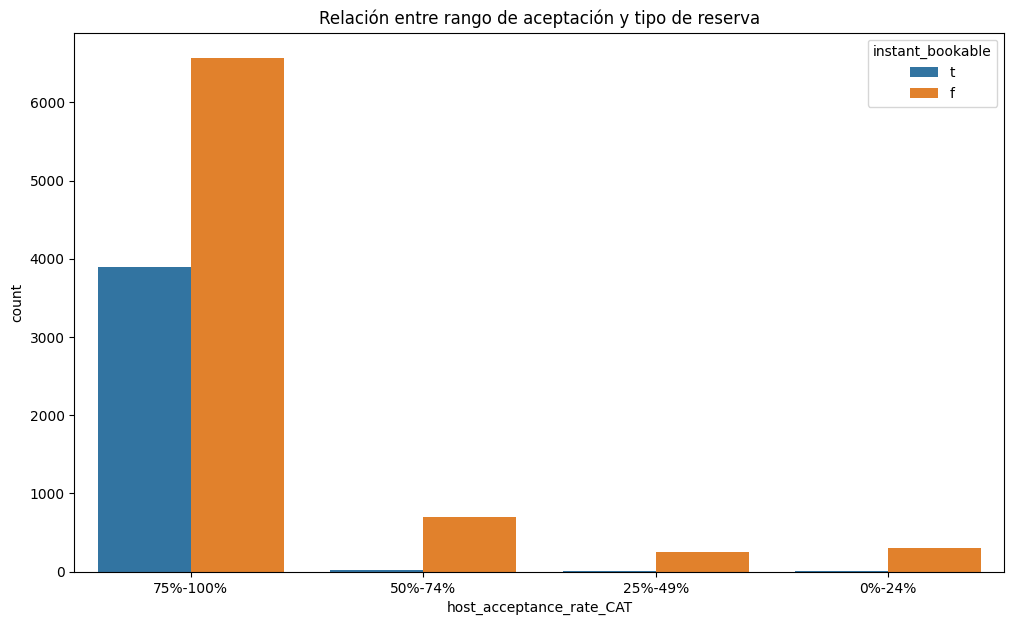

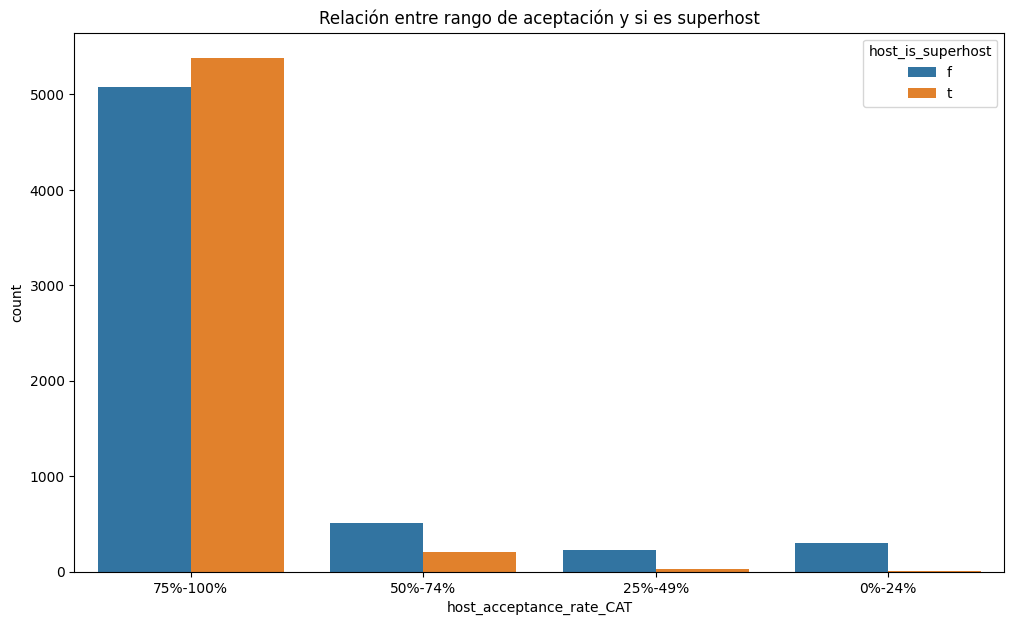

In [131]:
#Gráfico para host_acceptance_rate_CAT con 'host_is_superhost', 'instant_bookable' y 'neighbourhood_cleansed_OHE'

plt.figure(figsize=(12,7))
sns.countplot(x='host_acceptance_rate_CAT', hue = 'neighbourhood_cleansed_OHE', data = df_Airbnb_listings)
plt.title('Relación entre rango de aceptación y ubicación')
plt.show()

plt.figure(figsize=(12,7))
sns.countplot(x='host_acceptance_rate_CAT', hue = 'instant_bookable', data = df_Airbnb_listings)
plt.title('Relación entre rango de aceptación y tipo de reserva')
plt.show()


plt.figure(figsize=(12,7))
sns.countplot(x='host_acceptance_rate_CAT', hue = 'host_is_superhost', data = df_Airbnb_listings)
plt.title('Relación entre rango de aceptación y si es superhost')
plt.show()

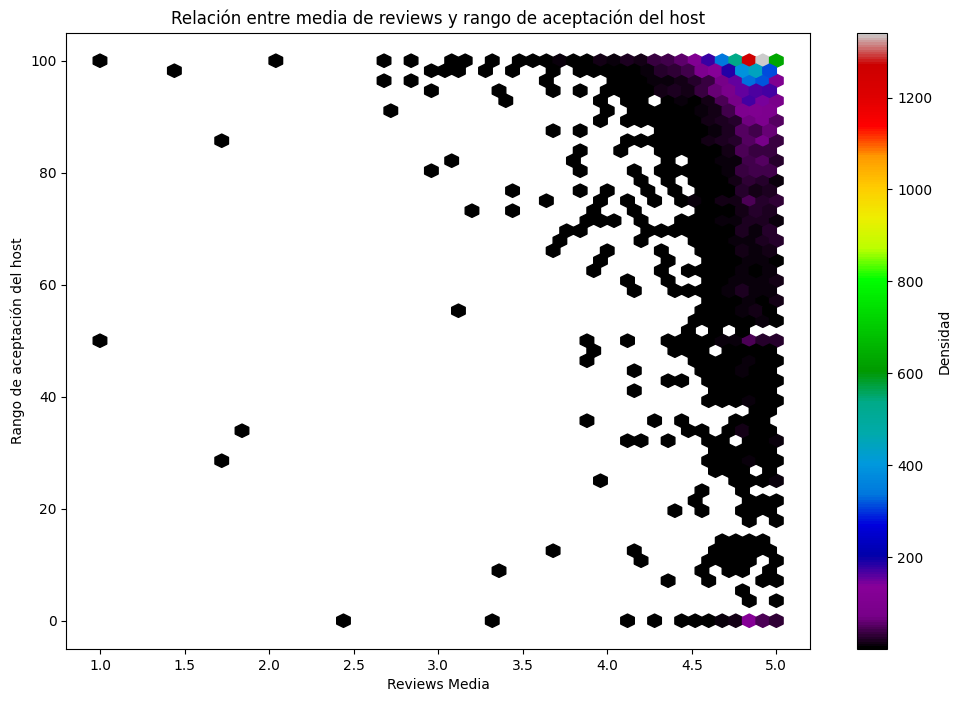

In [132]:
#reviews_media, host_acceptance_rate
#Creacion del gráfico hexbin

plt.figure(figsize=(12,8))
hb = plt.hexbin(df_Airbnb_listings['reviews_media'], 
                df_Airbnb_listings['host_acceptance_rate'], 
                gridsize = 50, cmap = 'nipy_spectral', mincnt = 1)

#Barra de color
plt.colorbar(hb, label = 'Densidad')

#Etiquetas
plt.xlabel('Reviews Media')
plt.ylabel('Rango de aceptación del host')
plt.title('Relación entre media de reviews y rango de aceptación del host')

#Mostrar el gráfico
plt.show()


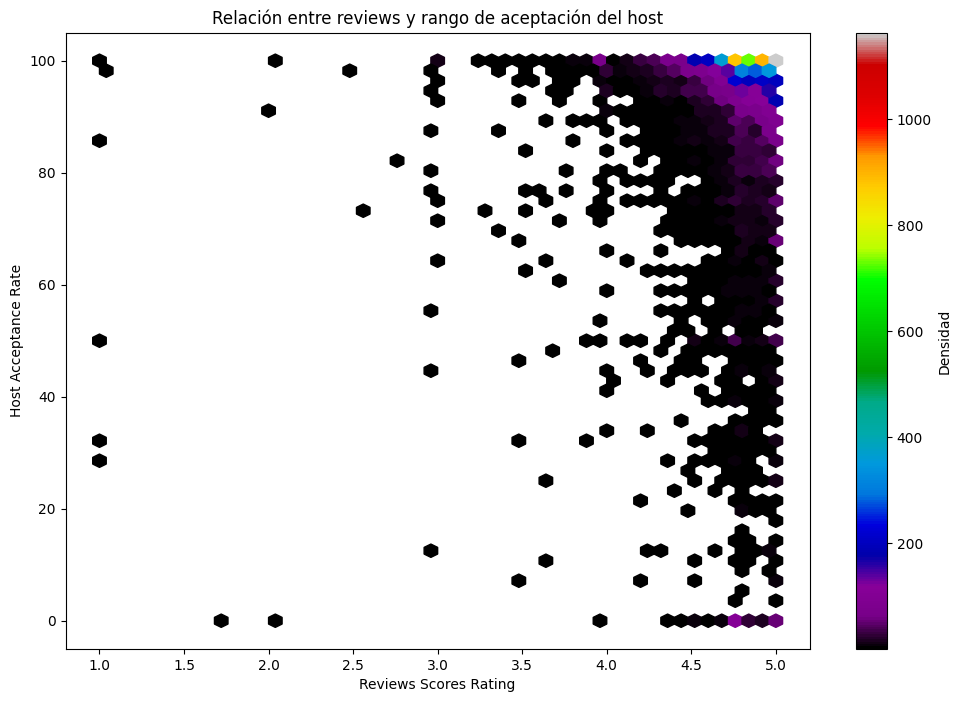

In [ ]:
#review_scores_rating, host_acceptance_rate
#Creacion del gráfico hexbin
'''
plt.figure(figsize=(12,8))
hb = plt.hexbin(df_Airbnb_listings['review_scores_rating'], 
                df_Airbnb_listings['host_acceptance_rate'], 
                gridsize = 50, cmap = 'nipy_spectral', mincnt = 1)

#Barra de color
plt.colorbar(hb, label = 'Densidad')

#Etiquetas
plt.xlabel('Reviews Scores Rating')
plt.ylabel('Host Acceptance Rate')
plt.title('Relación entre reviews y rango de aceptación del host')

#Mostrar el gráfico
plt.show()
''' 

In [133]:
#review_scores_location, neighbourhood_cleansed_OHE
#Creacion del gráfico hexbin
'''
plt.figure(figsize=(12,8))
hb = plt.hexbin(df_Airbnb_listings['review_scores_value'], 
                df_Airbnb_listings['price'], 
                gridsize = 50, cmap = 'nipy_spectral', mincnt = 1)

#Barra de color
plt.colorbar(hb, label = 'Densidad')

#Etiquetas
plt.xlabel('Reviews Scores Rating')
plt.ylabel('Host Acceptance Rate')
plt.title('Relación entre reviews y rango de aceptación del host')

#Mostrar el gráfico
plt.show()
'''

"\nplt.figure(figsize=(12,8))\nhb = plt.hexbin(df_Airbnb_listings['review_scores_value'], \n                df_Airbnb_listings['price'], \n                gridsize = 50, cmap = 'nipy_spectral', mincnt = 1)\n\n#Barra de color\nplt.colorbar(hb, label = 'Densidad')\n\n#Etiquetas\nplt.xlabel('Reviews Scores Rating')\nplt.ylabel('Host Acceptance Rate')\nplt.title('Relación entre reviews y rango de aceptación del host')\n\n#Mostrar el gráfico\nplt.show()\n"

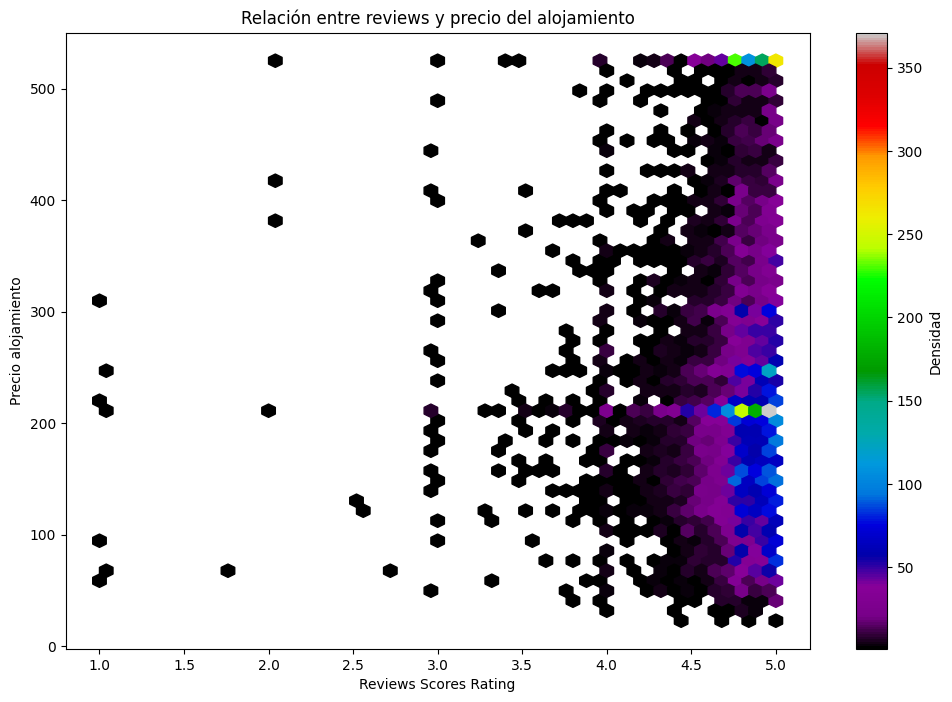

In [147]:
#review_scores_rating, price_sinout
#Creacion del gráfico hexbin

plt.figure(figsize=(12,8))
hb = plt.hexbin(df_Airbnb_listings['review_scores_rating'], 
                df_Airbnb_listings['price_sinout'], 
                gridsize = 50, cmap = 'nipy_spectral', mincnt = 1)

#Barra de color
plt.colorbar(hb, label = 'Densidad')

#Etiquetas
plt.xlabel('Reviews Scores Rating')
plt.ylabel('Precio alojamiento')
plt.title('Relación entre reviews y precio del alojamiento')

#Mostrar el gráfico
plt.show()


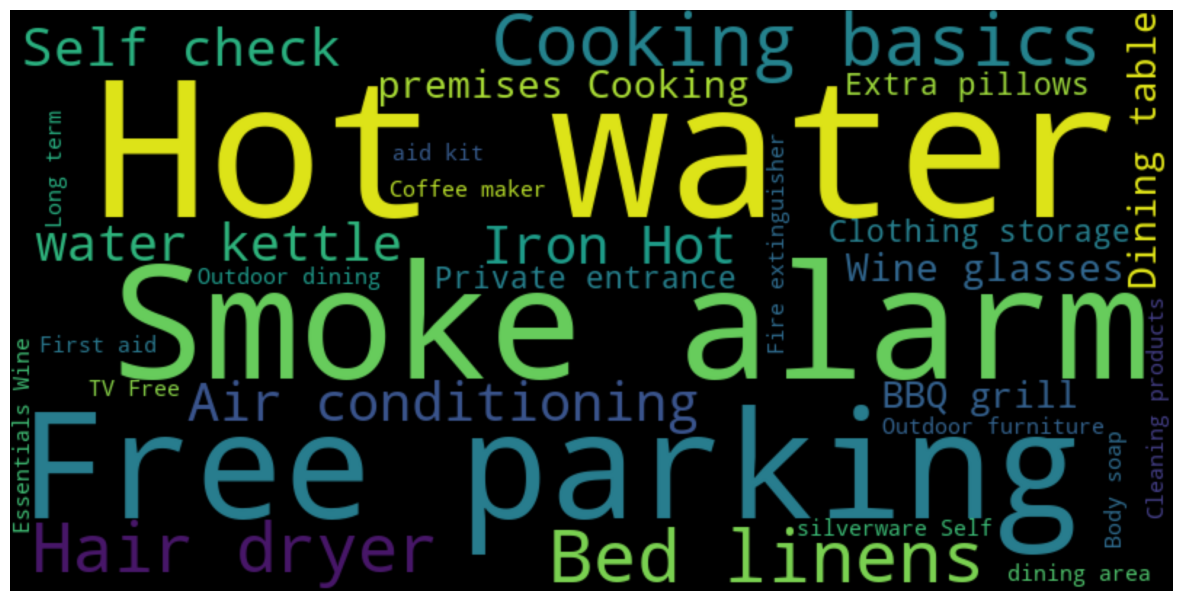

In [ ]:
'''
from wordcloud import WordCloud

#Combina todas las filas de la columna en un solo texto
texto = ''.join(df_Airbnb_listings['amenities'])

#Crea la nube de palabras
wordcloud = WordCloud(width = 800, height = 400, max_words=30).generate(texto)

#Muestra la nube de palabras
plt.figure(figsize =(15, 9))
plt.axis('off')
plt.imshow(wordcloud, interpolation= 'gaussian')

plt.show()
'''